# Análise de dados Enem 2019

---

Trabalhando com Dados da Educação do Brasil - Enem 2019  - Imersão Alura. \
Dataset: [Link](https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true) \
Realizado entre 19/10 e 25/10

---

Autor:  \
*Eduardo Kling Mesiano*

**Observações** \
* Foram utilizados muitos gráficos e correlações simples, que por si só, apresentam informações básicas. Mas que se analizados como um conjunto, conseguem expor muitas outras informações interessantes. \
* Existem alguns comentários de conclusões ao longo do código que resumem um pouco o que estava sendo analisado em cada caso. \
* A intenção deste notebook é para analisar o dataset da maneira rápida, sem muitas firulas nos gráficos (até porque esta parte é bem trabalhosa), sendo o mais simples possível e claro, tentando manter organizado. \
* Esta análise foi feita com uma amostra dos dados do Enem 2019, portanto as conclusões podem, sem querer, ter algum tipo de viés.

**tl;dr** \
No final do notebook tem um resumo das análises feitas.

**Premissas** \
Imagino que com este dataset, conseguirei ver alguns problemas, não só da educação brasileira, mas do brasil como um todo. \
Pretendo verificar a validade de alguns estereótipos que temos com relação a algumas classes sociais e outros tipos de discriminação. \
Também pretendo procurar por relações entre caracterísitcas dos inscritos na prova e suas respectivas notas.

# Início

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configurações globais
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
# Rotacionar label de gráficos
def rotateLabels():
  plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
  )

In [4]:
# Constantes
RESIDENCIA = 'SG_UF_RESIDENCIA';
IDADE = 'NU_IDADE';
SEXO = 'TP_SEXO';
ESTADO_CIVIL = 'TP_ESTADO_CIVIL';
RACA = 'TP_COR_RACA';
NACIONALIDADE = 'TP_NACIONALIDADE';
SITUACAO_ENSINO_MEDIO = 'TP_ST_CONCLUSAO';
ANO_CONCLUSAO_ENSINO_MEDIO = 'TP_ANO_CONCLUIU';
TIPO_ESCOLA = 'TP_ESCOLA';
TREINEIRO = 'IN_TREINEIRO';
LINGUA = 'TP_LINGUA';
STATUS_REDACAO = 'TP_STATUS_REDACAO';
NOTA_CN = 'NU_NOTA_CN';
NOTA_CH = 'NU_NOTA_CH';
NOTA_REDACAO = 'NU_NOTA_REDACAO';
NOTA_MT = 'NU_NOTA_MT';
NOTA_LC = 'NU_NOTA_LC';
COMPUTADOR = 'Q024';
CELULAR = 'Q022';
CARRO = 'Q010';
MOTO = 'Q011';
ESTADO_PROVA = 'SG_UF_PROVA';
CIDADE_PROVA = 'NO_MUNICIPIO_PROVA';
CIDADE_RESIDENCIA = 'NO_MUNICIPIO_RESIDENCIA';
PESSOAS_RESIDENCIA = 'Q005';
RENDA = 'Q006';
INTERNET = 'Q025';
GRAD_PAI = 'Q001';
GRAD_MAE = 'Q002';

# Criados no dataset
PRESENTE = 'PRESENTE';
TRANSPORTE = 'TRANSPORTE';
TEM_CARRO = 'TEM CARRO';
MUDOU_ESTADO = 'MUDOU ESTADO';
MUDOU_CIDADE = 'MUDOU CIDADE';
TEM_CELULAR = 'TEM CELULAR';
NOTA_FINAL = 'NOTA FINAL';
ESCOLARIDADE_PAIS = 'ESCOLARIDADE PAIS';

In [5]:
# Fonte de dados gerais:
fonteDados = "./MICRODADOS_ENEM_2019_SAMPLE_43278.csv"

# fonteDados = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
# Fonte de dados por estado:
# estado = "rj"
# uri = f"https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/{estado}.csv.zip?raw=true"
# fonteDados = f'{estado}.csv.zip'
# !wget -O $fonteDados $uri

In [6]:
dados = pd.read_csv(fonteDados)

# Análise Geral

In [7]:
dados.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q023  Q024 Q025
0  190001004661    2019                  1506138  ...    A     B    B
1  190001004674    2019                  1504208  ...    A     A    B
2  190001004722    2019                  1501402  ...    A     A    B
3  190001004735    2019                  1507300  ...    A     A    B
4  190001004776    2019                  1500800  ...    A     A    B

[5 rows x 136 columns]

In [8]:
dados.tail()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q023  Q024 Q025
127375  190006120035    2019                  3142700  ...    A     B    B
127376  190006120036    2019                  2902807  ...    A     B    B
127377  190006120037    2019                  2927408  ...    A     A    B
127378  190006120060    2019                  2930709  ...    A     A    A
127379  190006120170    2019                  3106200  ...    B     A    B

[5 rows x 136 columns]

In [9]:
dados.shape

(127380, 136)

In [10]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [11]:
dados.describe()

NU_INSCRICAO    NU_ANO  ...  NU_NOTA_REDACAO           Q005
count  1.273800e+05  127380.0  ...     98043.000000  127380.000000
mean   1.900035e+11    2019.0  ...       571.570025       3.864068
std    1.469535e+06       0.0  ...       188.076455       1.475714
min    1.900010e+11    2019.0  ...         0.000000       1.000000
25%    1.900023e+11    2019.0  ...       480.000000       3.000000
50%    1.900035e+11    2019.0  ...       580.000000       4.000000
75%    1.900048e+11    2019.0  ...       680.000000       5.000000
max    1.900061e+11    2019.0  ...      1000.000000      20.000000

[8 rows x 95 columns]

# Análise Colunas

## Residência

In [12]:
# Constantes
dadosResidencia = dados[RESIDENCIA];

In [13]:
# Lista coluna de estados
dadosResidencia

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [14]:
# Lista estados únicos da coluna
dadosResidencia.unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [15]:
# Lista estados únicos da coluna em ordem alfabética
estadosOrdemAlfabetica = dadosResidencia.sort_values(ascending=True).unique()

In [16]:
# Quantidade de estados únicos na coluna
len(dadosResidencia.unique())

27

In [17]:
# Lista quantidade de inscritos por estado
dadosResidencia.value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [18]:
# Proporção de inscritos por estado (%)
((dadosResidencia.value_counts() / dados.shape[0]) * 100).round(2).astype(str) + ' %'

SP    15.91 %
MG    10.64 %
BA     7.88 %
RJ     6.65 %
CE     5.79 %
PA     5.63 %
PE     5.45 %
MA     4.35 %
RS     4.29 %
PR     4.13 %
GO     3.35 %
PB      2.9 %
PI     2.38 %
RN     2.32 %
AM     2.21 %
SC      2.1 %
ES      2.0 %
DF     1.89 %
AL     1.78 %
MT     1.75 %
SE     1.42 %
MS      1.3 %
RO      1.1 %
TO     0.92 %
AP     0.82 %
AC     0.74 %
RR     0.29 %
Name: SG_UF_RESIDENCIA, dtype: object

In [19]:
# Lista estados em ordem de quantidade de inscritos
estadosOrdemQuantidade = dadosResidencia.value_counts().index

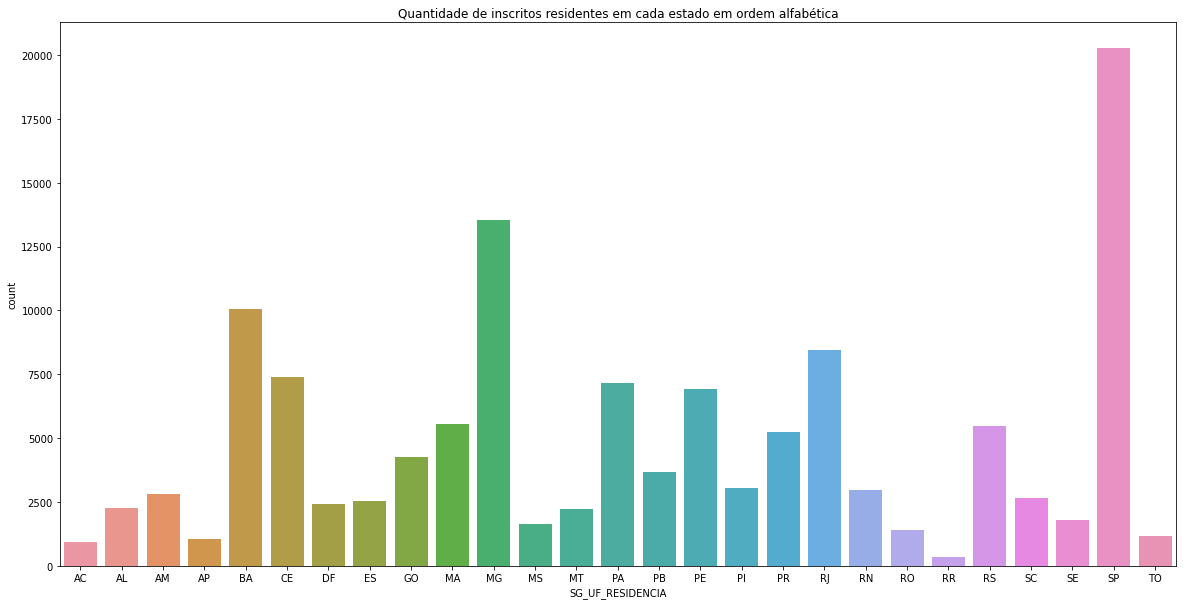

In [20]:
# Gráfico da quantidade de inscritos residentes em cada estado em ordem alfabética
sns.countplot(data = dados, x = RESIDENCIA, order = estadosOrdemAlfabetica).set_title('Quantidade de inscritos residentes em cada estado em ordem alfabética');

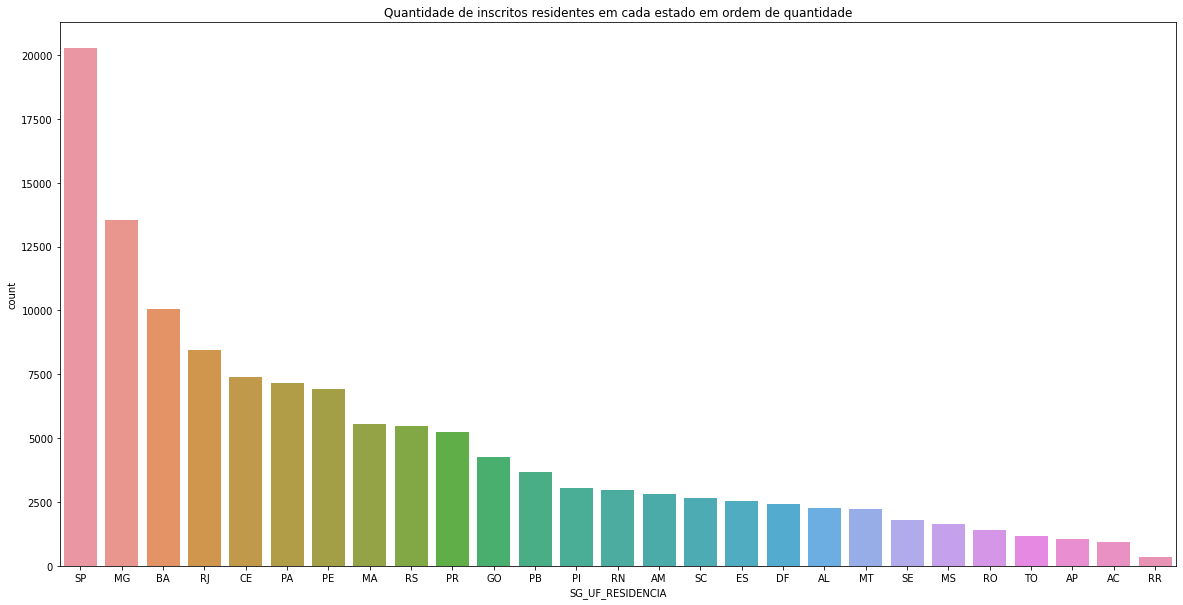

In [21]:
# Gráfico da quantidade de inscritos residentes em cada estado em ordem de quantidade
sns.countplot(data = dados, x = RESIDENCIA, order = estadosOrdemQuantidade).set_title('Quantidade de inscritos residentes em cada estado em ordem de quantidade');

### Conclusão
Pode-se perceber que há na amostra representação de todos os 26 estados e o Distrito Federal. \
Além disso, também pode-se verificar uma proporcionalidade de inscritos muito maior nos estados mais populosos.

## Idade

In [22]:
# Constantes
dadosIdade = dados[IDADE];

In [23]:
# Lista coluna de idades
dadosIdade

0         17
1         23
2         35
3         23
4         16
          ..
127375    17
127376    18
127377    22
127378    26
127379    19
Name: NU_IDADE, Length: 127380, dtype: int64

In [24]:
# Lista idades únicas da coluna
dadosIdade.unique()

array([17, 23, 35, 16, 18, 21, 19, 22, 28, 36, 15, 51, 32, 25, 26, 31, 42,
       48, 30, 20, 29, 24, 47, 33, 57, 40, 49, 39, 53, 55, 38, 44, 27, 37,
       41, 54, 14, 34, 65, 46, 43, 50, 52, 59, 62, 70, 45, 58, 60, 56, 68,
       61, 63, 64, 73, 69, 71, 66, 67, 13, 77, 82, 72, 76, 75])

In [25]:
# Lista idades únicas da coluna em ordem
idadesOrdemCrescente = dadosIdade.sort_values(ascending=True).unique()

In [26]:
# Quantidade de idades únicas na coluna
len(dadosIdade.unique())

65

In [27]:
# Lista quantidade de inscritos por idade
dadosIdade.value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [28]:
# Proporção de inscritos por idade (%)
((dadosIdade.value_counts() / dados.shape[0]) * 100).round(2).astype(str) + ' %'

18    16.84 %
17    16.69 %
19    11.32 %
20     8.17 %
16     6.15 %
       ...   
75      0.0 %
73      0.0 %
82      0.0 %
77      0.0 %
76      0.0 %
Name: NU_IDADE, Length: 65, dtype: object

In [29]:
# Lista idades em ordem de quantidade de inscritos
idadesOrdemQuantidade = dadosIdade.value_counts().index

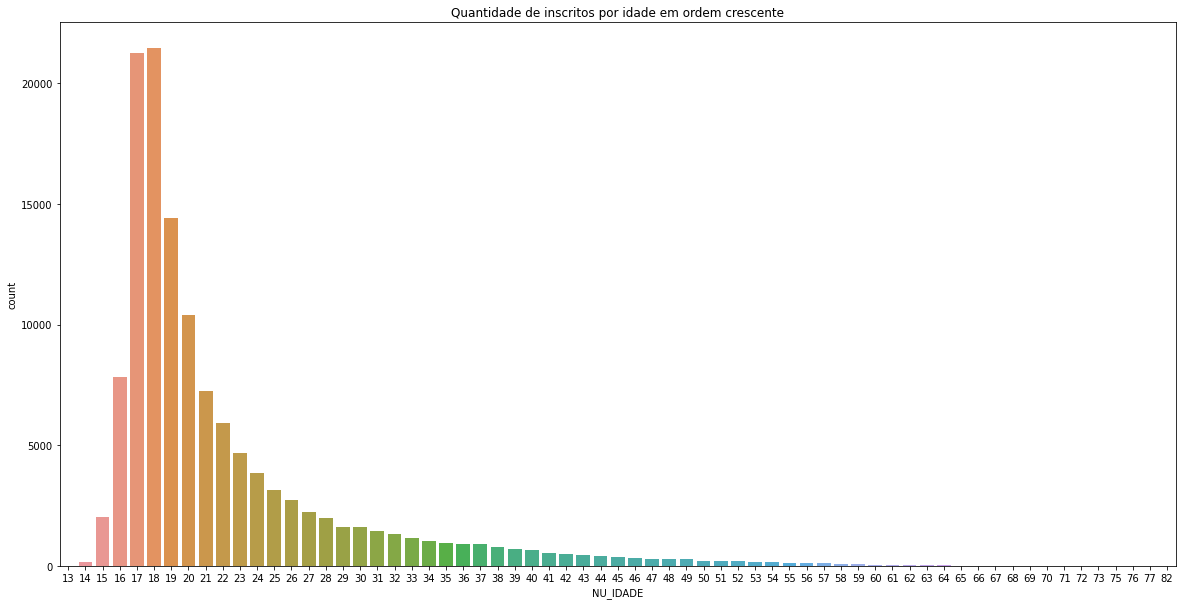

In [30]:
# Gráfico da quantidade de inscritos por idade em ordem crescente
sns.countplot(data = dados, x = IDADE, order = idadesOrdemCrescente).set_title('Quantidade de inscritos por idade em ordem crescente');

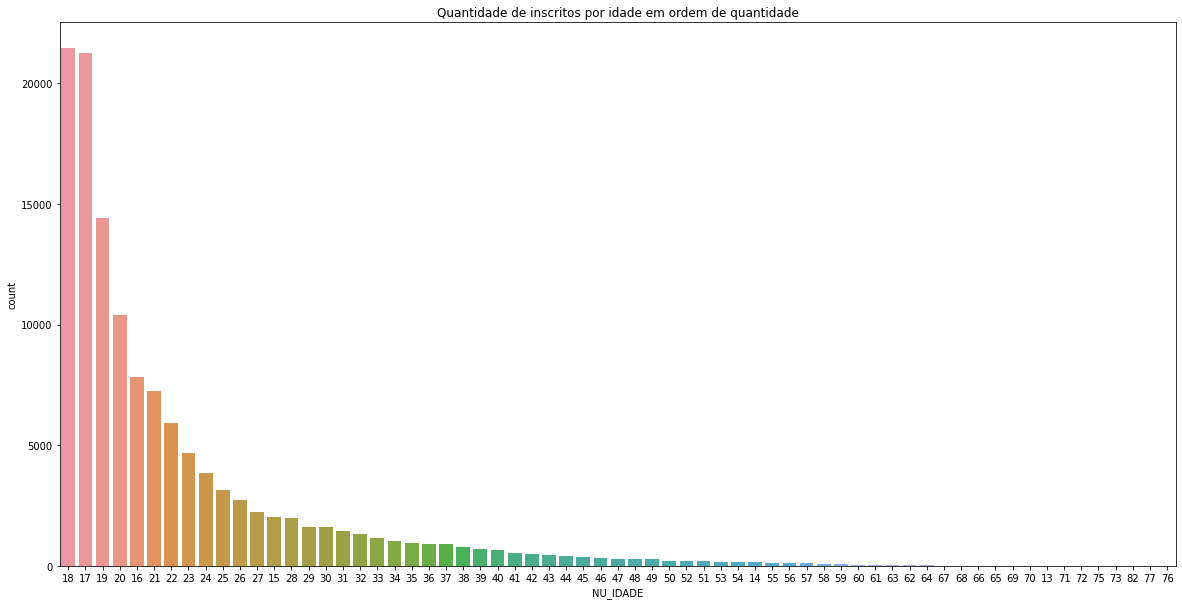

In [31]:
# Gráfico da quantidade de inscritos por idade em ordem de quantidade
sns.countplot(data = dados, x = IDADE, order = idadesOrdemQuantidade).set_title('Quantidade de inscritos por idade em ordem de quantidade');

### Conclusão
Pode-se perceber que há na amostra representação de várias idades. \
A faixa vai dos 13 até aos 82 anos. \
Claramente, pode-se perceber que a distribuição de idades se concentra na faixa de 17 aos 20 anos, que é justamente a faixa de idade dos concluintes do ensino médio.

## Sexo

In [32]:
# Constantes
dadosSexo = dados[SEXO];

In [33]:
# Lista coluna de sexo
dadosSexo

0         M
1         M
2         F
3         F
4         F
         ..
127375    F
127376    M
127377    F
127378    F
127379    M
Name: TP_SEXO, Length: 127380, dtype: object

In [34]:
# Lista sexos únicos da coluna
dadosSexo.unique()

array(['M', 'F'], dtype=object)

In [35]:
# Lista quantidade de inscritos por sexo
dadosSexo.value_counts()

F    75883
M    51497
Name: TP_SEXO, dtype: int64

In [36]:
# Proporção de inscritos por sexo (%)
((dadosSexo.value_counts() / dados.shape[0]) * 100).round(2).astype(str) + ' %'

F    59.57 %
M    40.43 %
Name: TP_SEXO, dtype: object

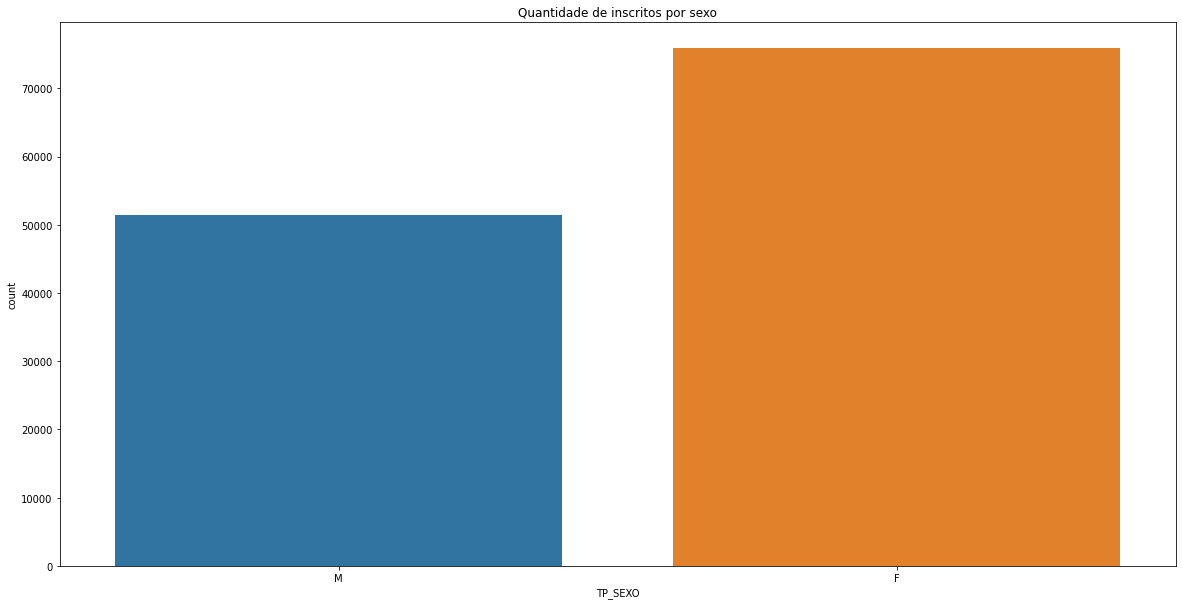

In [37]:
# Gráfico da quantidade de inscritos por sexo
sns.countplot(data = dados, x = SEXO).set_title('Quantidade de inscritos por sexo');

### Conclusão
Pode-se perceber que há na amostra uma boa representação de ambos os sexos. \
Pode-se verificar que há uma maior quantidade de inscritos do sexo feminino. \

Nos dados do senso de 2010, encontra-se:

*   Masculino: 48,97%
*   Feminino: 51,03%

Fonte: [IBGE](https://brasilemsintese.ibge.gov.br/populacao/distribuicao-da-populacao-por-sexo.html)

A diferença da amostra com relação ao censo é um pouco superior, mas ainda sim, coerente com o sexo feminino com uma proporção maior. \
Essa diferença pode ser da amostra e não representa relmente o total de inscritos.

## Estado Civil

In [38]:
# Constantes
dadosEstadoCivil = dados[ESTADO_CIVIL];

In [39]:
# Lista coluna de estado civil
dadosEstadoCivil

0         1
1         1
2         2
3         1
4         1
         ..
127375    1
127376    1
127377    1
127378    2
127379    1
Name: TP_ESTADO_CIVIL, Length: 127380, dtype: int64

In [40]:
# Lista estado civil únicos da coluna
dadosEstadoCivil.unique()

array([1, 2, 0, 3, 4])

Mapeamento Estado Civil:
* 0 - Não informado
* 1	- Solteiro(a)
* 2	- Casado(a)/Mora com companheiro(a)
* 3	- Divorciado(a)/Desquitado(a)/Separado(a)
* 4	- Viúvo(a)

In [41]:
mapeamentoEstadoCivil = {0: 'NAO INFORMADO', 1: 'SOLTEIRO', 2: 'CASADO', 3: 'DIVORCIADO', 4: 'VIUVO'};

In [42]:
# Lista quantidade de inscritos por estado civil
dadosEstadoCivil.value_counts().rename(index = mapeamentoEstadoCivil)

SOLTEIRO         109915
CASADO             9913
NAO INFORMADO      5126
DIVORCIADO         2277
VIUVO               149
Name: TP_ESTADO_CIVIL, dtype: int64

In [43]:
# Proporção de inscritos por estado civil (%)
((dadosEstadoCivil.value_counts().rename(index = mapeamentoEstadoCivil) / dados.shape[0]) * 100).round(2).astype(str) + ' %'

SOLTEIRO         86.29 %
CASADO            7.78 %
NAO INFORMADO     4.02 %
DIVORCIADO        1.79 %
VIUVO             0.12 %
Name: TP_ESTADO_CIVIL, dtype: object

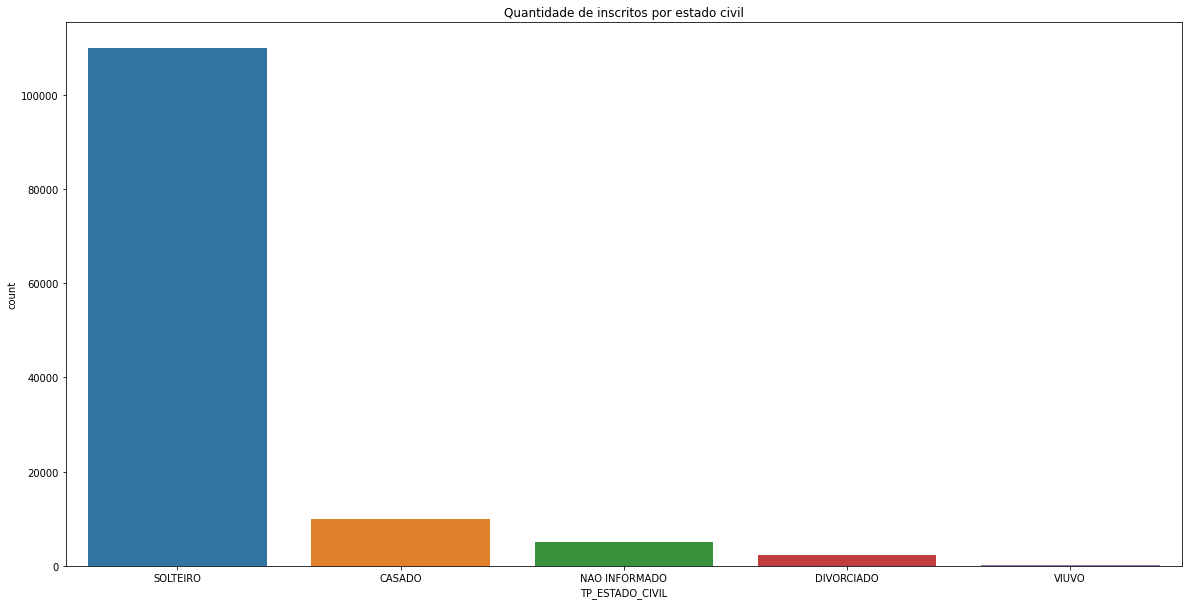

In [44]:
# Gráfico da quantidade de inscritos por estado civil
sns.countplot(data = dados.replace({ESTADO_CIVIL: mapeamentoEstadoCivil}), x = ESTADO_CIVIL).set_title('Quantidade de inscritos por estado civil');

### Conclusão
Pode-se perceber que há na amostra uma grande representação de solteiros inscritos se comparado às outras categorias. \
Este fato pode estar ocorrendo por causa da grande quantidade de inscritos jovens.

## Raça

In [45]:
# Constantes
dadosRaca = dados[RACA];

In [46]:
# Lista coluna de raça
dadosRaca

0         3
1         3
2         1
3         3
4         3
         ..
127375    1
127376    2
127377    3
127378    2
127379    2
Name: TP_COR_RACA, Length: 127380, dtype: int64

In [47]:
# Lista raça únicos da coluna
dadosRaca.unique()

array([3, 1, 4, 2, 0, 5])

Mapeamento Raça:
* 0 - Não declarado
* 1 - Branca
* 2 - Preta
* 3 - Parda
* 4 - Amarela
* 5 - Indígena

In [48]:
mapeamentoRaca = {0: 'NAO DECLARADO', 1: 'BRANCA', 2: 'PRETA', 3: 'PARDA', 4: 'AMARELA', 5: 'INDIGENA'};

In [49]:
# Lista quantidade de inscritos por raça
dadosRaca.value_counts().rename(index = mapeamentoRaca)

PARDA            59132
BRANCA           45616
PRETA            16300
AMARELA           2975
NAO DECLARADO     2565
INDIGENA           792
Name: TP_COR_RACA, dtype: int64

In [50]:
# Proporção de inscritos por raça (%)
((dadosRaca.value_counts().rename(index = mapeamentoRaca) / dados.shape[0]) * 100).round(2).astype(str) + ' %'

PARDA            46.42 %
BRANCA           35.81 %
PRETA             12.8 %
AMARELA           2.34 %
NAO DECLARADO     2.01 %
INDIGENA          0.62 %
Name: TP_COR_RACA, dtype: object

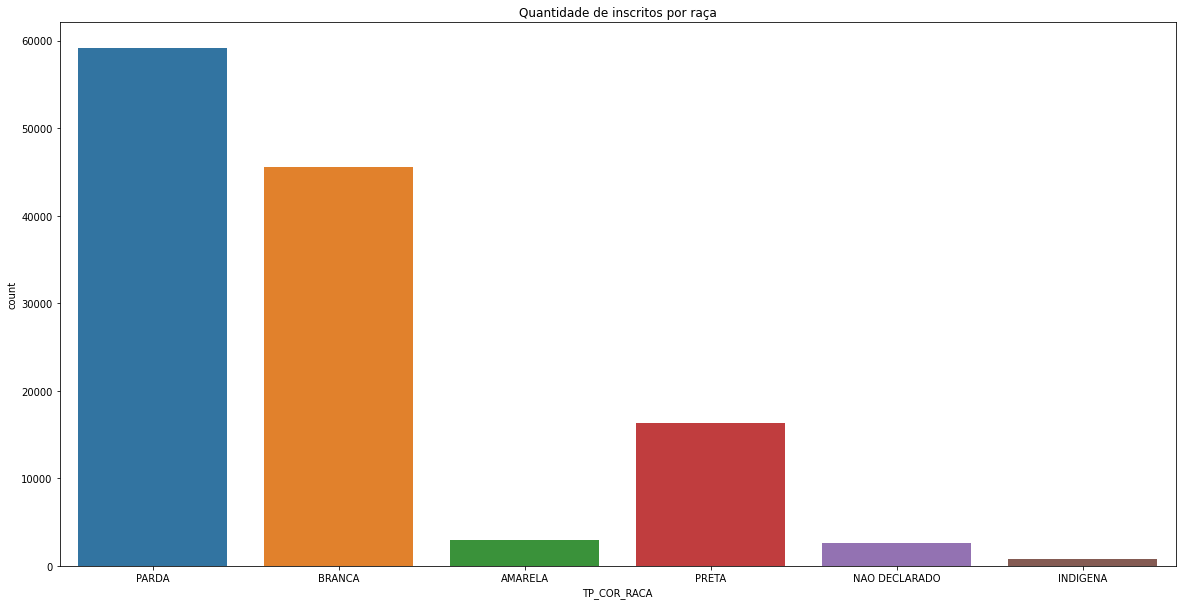

In [51]:
# Gráfico da quantidade de inscritos por raça
sns.countplot(data = dados.replace({RACA: mapeamentoRaca}), x = RACA).set_title('Quantidade de inscritos por raça');

### Conclusão
Pode-se perceber que há na amostra uma representação coerente de inscritos por raça. \
Há uma ligeira diminuição da proporção de 'BRANCA' na amostra e ligeiro aumento para 'PRETA', 'AMARELA' e 'INDÍGENA'.

Pelos dados da Pesquisa Nacional por Amostra de Domicílios:

* Branca: 42,7%
* Parda: 46,8%
* Preta: 9,4%
* Amarela ou Indígena: 1,1%

Fonte: [PNAD](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18319-cor-ou-raca.html)

## Nacionalidade

In [52]:
# Constantes
dadosNacionalidade = dados[NACIONALIDADE];

In [53]:
# Lista coluna de nacionalidade
dadosNacionalidade

0         1
1         1
2         1
3         1
4         1
         ..
127375    1
127376    1
127377    1
127378    1
127379    1
Name: TP_NACIONALIDADE, Length: 127380, dtype: int64

In [54]:
# Lista nacionalidade únicos da coluna
dadosNacionalidade.unique()

array([1, 2, 0, 3, 4])

Mapeamento Nacionalidade:
* 0 - Não informado
* 1 - Brasileiro(a)
* 2 - Brasileiro(a) Naturalizado(a)
* 3 - Estrangeiro(a)
* 4 - Brasileiro(a) Nato(a), nascido(a) no exterior


In [55]:
mapeamentoNacionalidade = {0: 'NAO INFORMADO', 1: 'BRASILEIRO', 2: 'NATURALIZADO', 3: 'ESTRANGEIRO', 4: 'BRASILEIRO EXTERIOR'};

In [56]:
# Lista quantidade de inscritos por nacionalidade
dadosNacionalidade.value_counts().rename(index = mapeamentoNacionalidade)

BRASILEIRO             123757
NATURALIZADO             3154
NAO INFORMADO             174
BRASILEIRO EXTERIOR       168
ESTRANGEIRO               127
Name: TP_NACIONALIDADE, dtype: int64

In [57]:
# Proporção de inscritos por nacionalidade (%)
((dadosNacionalidade.value_counts().rename(index = mapeamentoNacionalidade) / dados.shape[0]) * 100).round(2).astype(str) + ' %'

BRASILEIRO             97.16 %
NATURALIZADO            2.48 %
NAO INFORMADO           0.14 %
BRASILEIRO EXTERIOR     0.13 %
ESTRANGEIRO              0.1 %
Name: TP_NACIONALIDADE, dtype: object

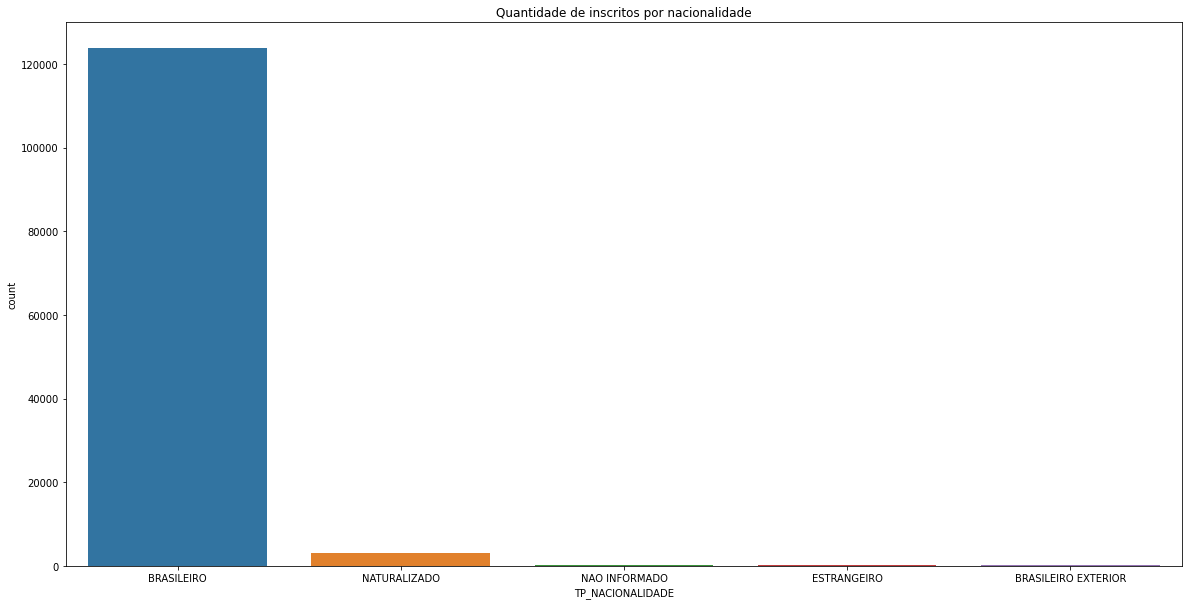

In [58]:
# Gráfico da quantidade de inscritos por nacionalidade
sns.countplot(data = dados.replace({NACIONALIDADE: mapeamentoNacionalidade}), x = NACIONALIDADE).set_title('Quantidade de inscritos por nacionalidade');

### Conclusão
Pode-se perceber que há na amostra uma representação enorme de 'BRASILEIRO' se comparado às outras classes.


## Situação de Conclusão do Ensino Médio

In [59]:
# Constantes
dadosSituacaoEnsinoMedio = dados[SITUACAO_ENSINO_MEDIO];

In [60]:
# Lista coluna de situação de ensino médio
dadosSituacaoEnsinoMedio

0         3
1         1
2         1
3         1
4         3
         ..
127375    2
127376    2
127377    1
127378    1
127379    2
Name: TP_ST_CONCLUSAO, Length: 127380, dtype: int64

In [61]:
# Lista situação ensino médio únicos da coluna
dadosSituacaoEnsinoMedio.unique()

array([3, 1, 2, 4])

Mapeamento Situação de Conclusão do Ensino Médio:
* 1 - Já concluí o Ensino Médio
* 2 - Estou cursando e concluirei o Ensino Médio em 2019
* 3 - Estou cursando e concluirei o Ensino Médio após 2019
* 4 - Não concluí e não estou cursando o Ensino Médio


In [62]:
mapeamentoSituacaoEnsinoMedio = {1: 'CONCLUIDO', 2: 'CURSANDO ULTIMO ANO', 3: 'CURSANDO ANTES ULTIMO ANO', 4: 'SEM ENSINO MEDIO'};

In [63]:
# Lista quantidade de inscritos por situação ensino médio
dadosSituacaoEnsinoMedio.value_counts().rename(index = mapeamentoSituacaoEnsinoMedio)

CONCLUIDO                    74915
CURSANDO ULTIMO ANO          36573
CURSANDO ANTES ULTIMO ANO    15401
SEM ENSINO MEDIO               491
Name: TP_ST_CONCLUSAO, dtype: int64

In [64]:
# Proporção de inscritos por situação ensino médio (%)
((dadosSituacaoEnsinoMedio.value_counts().rename(index = mapeamentoSituacaoEnsinoMedio) / dados.shape[0]) * 100).round(2).astype(str) + ' %'

CONCLUIDO                    58.81 %
CURSANDO ULTIMO ANO          28.71 %
CURSANDO ANTES ULTIMO ANO    12.09 %
SEM ENSINO MEDIO              0.39 %
Name: TP_ST_CONCLUSAO, dtype: object

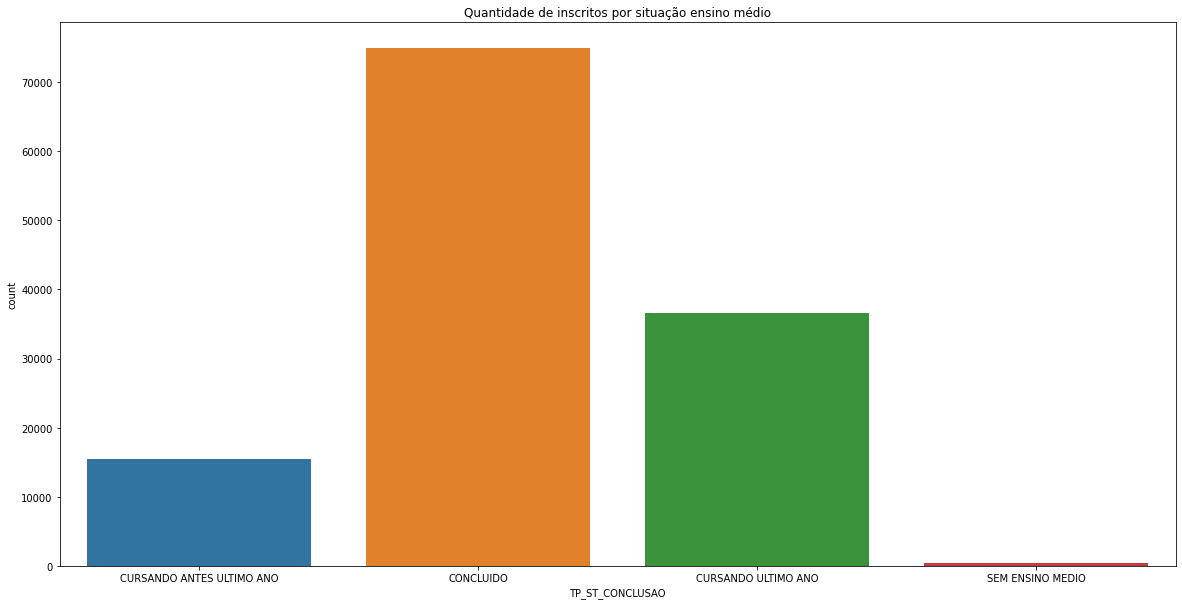

In [65]:
# Gráfico da quantidade de inscritos por situação ensino médio
sns.countplot(data = dados.replace({SITUACAO_ENSINO_MEDIO: mapeamentoSituacaoEnsinoMedio}), x = SITUACAO_ENSINO_MEDIO).set_title('Quantidade de inscritos por situação ensino médio');

### Conclusão
Pode-se perceber que há na amostra uma representação grande de inscritos que já concluiram o ensino médio. O que pode indicar que os inscritos ou esperaram a conclusão do ensino médio para prestar a prova, ou que estariam tentando novamente após a conclusão do ensino médio, talvez com mais estudo ou com um cursinho. \
E também há uma proporção interessante de concluintes do ensino médio e de alunos dos primeiro e segundo anos do ensino médio. \
Porém, há na amotra uma relação bem pequena de inscritos sem Ensino Médio.

## Ano de Conclusão do Ensino Médio

In [66]:
# Constantes
dadosAnoConclusaoEnsinoMedio = dados[ANO_CONCLUSAO_ENSINO_MEDIO];

In [67]:
# Lista coluna de ano de conclusão de ensino médio
dadosAnoConclusaoEnsinoMedio

0          0
1          3
2         12
3          7
4          0
          ..
127375     0
127376     0
127377     1
127378     6
127379     0
Name: TP_ANO_CONCLUIU, Length: 127380, dtype: int64

In [68]:
# Lista ano de conclusão de ensino médio únicos da coluna
dadosAnoConclusaoEnsinoMedio.unique()

array([ 0,  3, 12,  7,  2,  4,  9, 13,  5,  6,  8,  1, 11, 10])

Mapeamento Ano de Conclusão do Ensino Médio:
* 0 - Não informado
* 1 - 2018
* 2 - 2017
* 3 - 2016
* 4 - 2015
* 5 - 2014
* 6 - 2013
* 7 - 2012
* 8 - 2011
* 9 - 2010
* 10 - 2009
* 11 - 2008
* 12 - 2007
* 13 - Antes de 2007

In [69]:
mapeamentoAnoConclusaoEnsinoMedio = {0: 'NAO INFORMADO', 1: '2018', 2: '2017', 3: '2016', 4: '2015', 5: '2014', 6: '2013', 7: '2012', 8: '2011', 9: '2010', 10: '2009', 11: '2008', 12: '2007', 13: 'Antes 2007'};

In [70]:
# Lista quantidade de inscritos por ano de conclusão de ensino médio
dadosAnoConclusaoEnsinoMedio.value_counts().rename(index = mapeamentoAnoConclusaoEnsinoMedio)

NAO INFORMADO    54991
2018             16533
2017             11177
Antes 2007       10127
2016              7841
2015              5857
2014              4588
2013              3581
2012              2972
2011              2479
2010              2166
2009              1957
2008              1664
2007              1447
Name: TP_ANO_CONCLUIU, dtype: int64

In [71]:
# Proporção de inscritos por ano de conclusão de ensino médio (%)
((dadosAnoConclusaoEnsinoMedio.value_counts().rename(index = mapeamentoAnoConclusaoEnsinoMedio) / dados.shape[0]) * 100).round(2).astype(str) + ' %'

NAO INFORMADO    43.17 %
2018             12.98 %
2017              8.77 %
Antes 2007        7.95 %
2016              6.16 %
2015               4.6 %
2014               3.6 %
2013              2.81 %
2012              2.33 %
2011              1.95 %
2010               1.7 %
2009              1.54 %
2008              1.31 %
2007              1.14 %
Name: TP_ANO_CONCLUIU, dtype: object

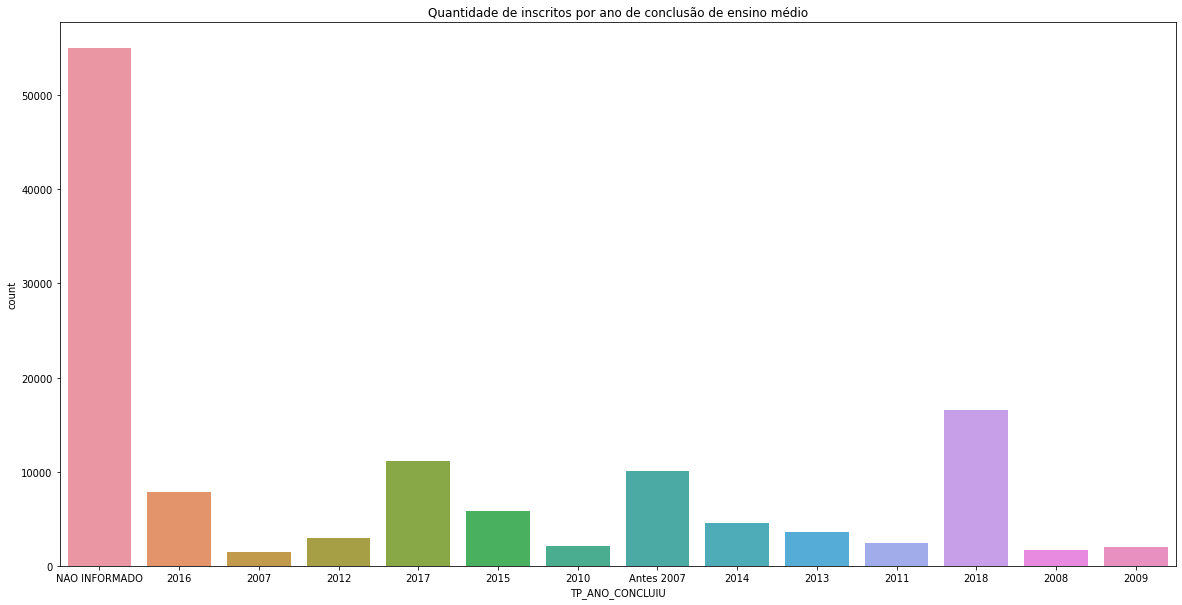

In [72]:
# Gráfico da quantidade de inscritos por ano de conclusão de ensino médio
sns.countplot(data = dados.replace({ANO_CONCLUSAO_ENSINO_MEDIO: mapeamentoAnoConclusaoEnsinoMedio}), x = ANO_CONCLUSAO_ENSINO_MEDIO).set_title('Quantidade de inscritos por ano de conclusão de ensino médio');

In [73]:
# Lista ano de conclusão de ensino médio únicos da coluna em ordem alfabética
anoConclusaoEnsinoMedioOrdemDecrescente = dados.replace({ANO_CONCLUSAO_ENSINO_MEDIO: mapeamentoAnoConclusaoEnsinoMedio})[ANO_CONCLUSAO_ENSINO_MEDIO].sort_values(ascending=False).unique()

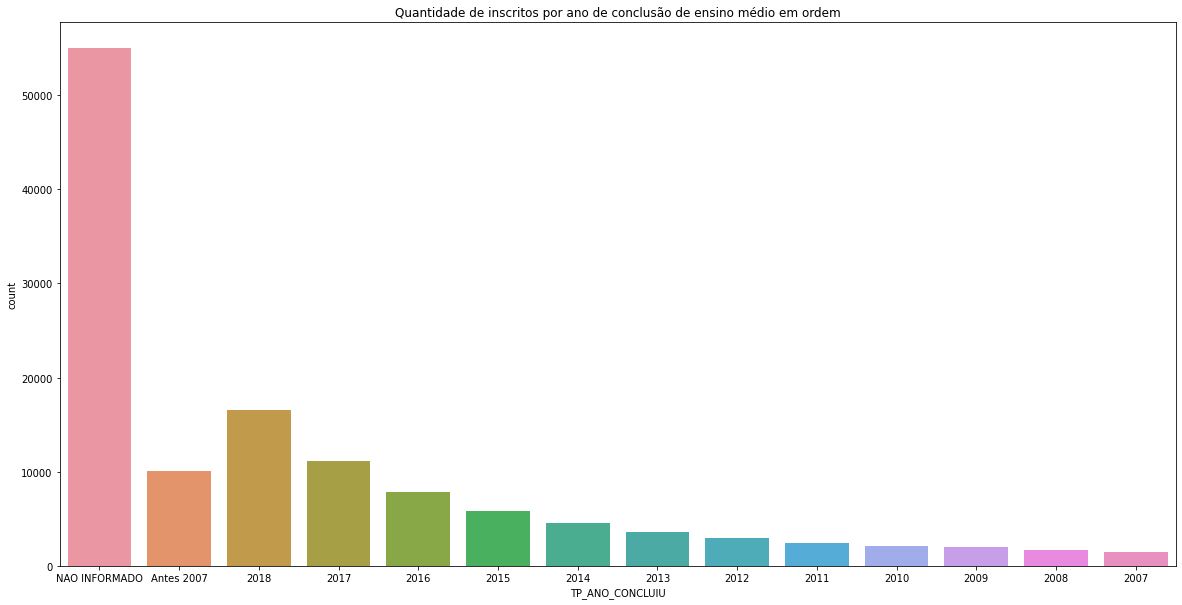

In [74]:
# Gráfico da quantidade de inscritos por ano de conclusão de ensino médio em ordem
sns.countplot(data = dados.replace({ANO_CONCLUSAO_ENSINO_MEDIO: mapeamentoAnoConclusaoEnsinoMedio}), x = ANO_CONCLUSAO_ENSINO_MEDIO, order = anoConclusaoEnsinoMedioOrdemDecrescente).set_title('Quantidade de inscritos por ano de conclusão de ensino médio em ordem');

### Conclusão
Neste campo, há uma grande falta de informação com relação ao ano de conclusão do ensino médio. \
Porém, pode-se considerar grande parte dos classificados como não informado como estudantes do ensino médio que ainda não concluiram. 

Mas, pode-se perceber uma tendência de diminuir a quantidade de inscritos a cada ano anterior à da prova em 2019. \
Há ainda uma grande concentração de inscritos nos anos próximos aos da prova em 2019. \

Há também uma quantidade  interessante de concluintes do ensino médio de antes de 2007.


## Tipo de escola do Ensino Médio

In [75]:
# Constantes
dadosTipoEscola = dados[TIPO_ESCOLA];

In [76]:
# Lista coluna de tipo escola
dadosTipoEscola

0         1
1         1
2         1
3         1
4         1
         ..
127375    2
127376    2
127377    1
127378    1
127379    2
Name: TP_ESCOLA, Length: 127380, dtype: int64

In [77]:
# Lista tipo escola únicos da coluna
dadosTipoEscola.unique()

array([1, 2, 3])

Mapeamento Tipo Escola:
* 1 - Não Respondeu
* 2 - Pública
* 3 - Privada
* 4 - Exterior



In [78]:
mapeamentoTipoEscola = {1: 'NAO RESPONDEU', 2: 'PUBLICA', 3: 'PRIVADA', 4: 'EXTERIOR'};

In [79]:
# Lista quantidade de inscritos por tipo escola
dadosTipoEscola.value_counts().rename(index = mapeamentoTipoEscola)

NAO RESPONDEU    90807
PUBLICA          31045
PRIVADA           5528
Name: TP_ESCOLA, dtype: int64

In [80]:
# Proporção de inscritos por tipo escola (%)
((dadosTipoEscola.value_counts().rename(index = mapeamentoTipoEscola) / dados.shape[0]) * 100).round(2).astype(str) + ' %'

NAO RESPONDEU    71.29 %
PUBLICA          24.37 %
PRIVADA           4.34 %
Name: TP_ESCOLA, dtype: object

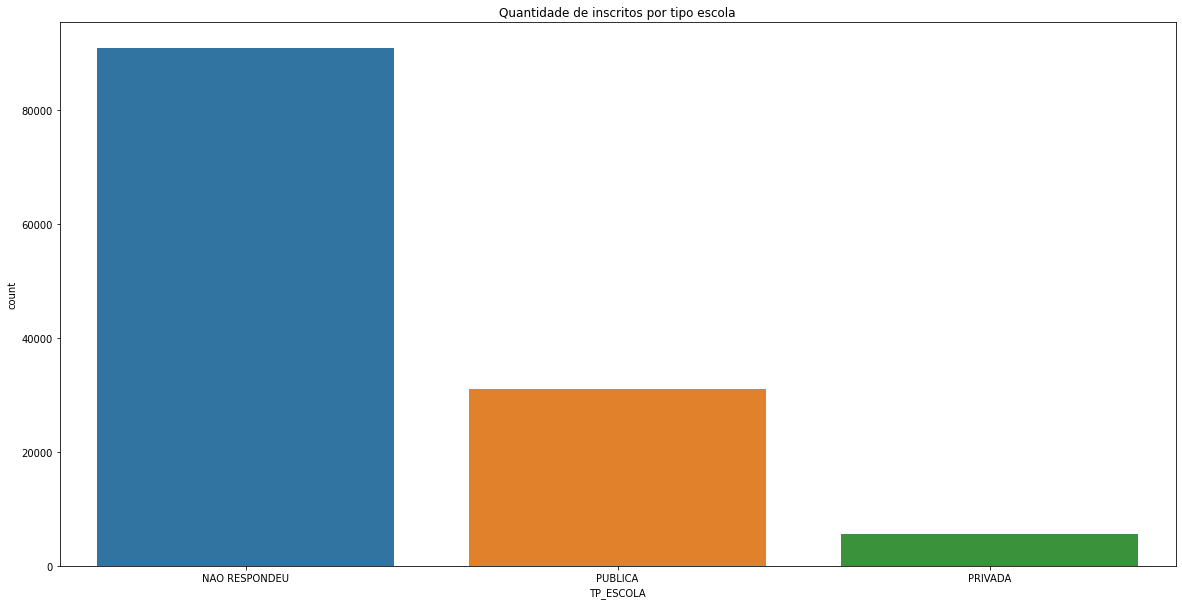

In [81]:
# Gráfico da quantidade de inscritos por tipo escola
sns.countplot(data = dados.replace({TIPO_ESCOLA: mapeamentoTipoEscola}), x = TIPO_ESCOLA).set_title('Quantidade de inscritos por tipo escola');

### Conclusão
Neste campo, há uma grande falta de informação com relação ao tipo de escola. Possivelmente estes casos são de já concluintes do ensino médio ou de cursantes, mas não do último ano. \
Porém, pode-se perceber uma proporção já bem grande entre inscritos de escola pública e de escolas privadas. O que é bem coerente com a relação de alunos para ambas as classes de escola.

> "Dos 35,8 milhões de alunos do ensino fundamental, 32,4 milhões (90,5%) estudam em escolas públicas e apenas 3,4 milhões (9,5%) em escolas particulares. No ensino médio, dos 6,9 milhões de alunos existentes, 82,4% estão nas escolas públicas."

Fonte: [INEP](http://inep.gov.br/artigo/-/asset_publisher/B4AQV9zFY7Bv/content/escolas-publicas-atendem-45-milhoes-de-alunos-no-brasil/21206)




## Treineiro

In [82]:
# Constantes
dadosTreineiro = dados[TREINEIRO];

In [83]:
# Lista coluna de treineiro
dadosTreineiro

0         1
1         0
2         0
3         0
4         1
         ..
127375    0
127376    0
127377    0
127378    0
127379    0
Name: IN_TREINEIRO, Length: 127380, dtype: int64

In [84]:
# Lista treineiro únicos da coluna
dadosTreineiro.unique()

array([1, 0])

Mapeamento Treineiro:
* 0 - Não é treineiro
* 1 - É treineiro

In [85]:
mapeamentoTreineiro = {0: 'NAO', 1: 'SIM'};

In [86]:
# Lista quantidade de inscritos por treineiro
dadosTreineiro.value_counts().rename(index = mapeamentoTreineiro)

NAO    111979
SIM     15401
Name: IN_TREINEIRO, dtype: int64

In [87]:
# Proporção de inscritos por treineiro (%)
((dadosTreineiro.value_counts().rename(index = mapeamentoTreineiro) / dados.shape[0]) * 100).round(2).astype(str) + ' %'

NAO    87.91 %
SIM    12.09 %
Name: IN_TREINEIRO, dtype: object

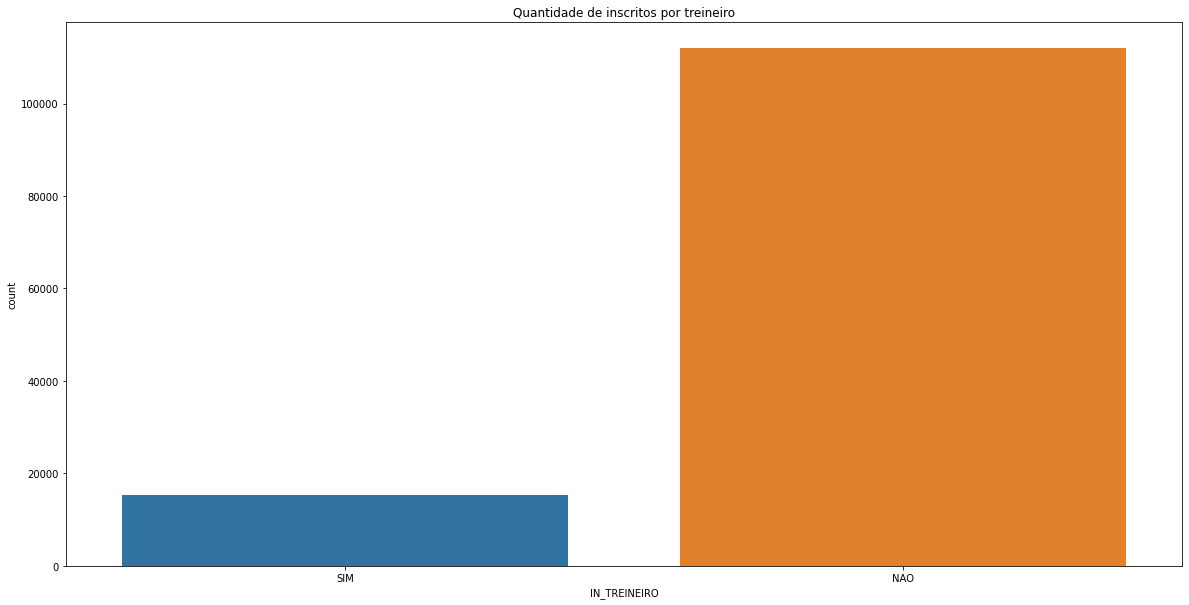

In [88]:
# Gráfico da quantidade de inscritos por treineiro
sns.countplot(data = dados.replace({TREINEIRO: mapeamentoTreineiro}), x = TREINEIRO).set_title('Quantidade de inscritos por treineiro');

### Conclusão
Neste campo, há uma proporção bem grande de não treineiros com relação aos treineiros. \

Conforme explicado do dicionário:
> Foi considerado treineiro o inscrito que não havia concluído o ensino médio e não o concluiria em 2019

Esta informação é bem relevante pois percebe-se a mesma quantidade de inscritos considerados Treineiros, com a quantidade de inscritos com Situação de Conclusão do Ensino Médio como 'CURSANDO ANTES ULTIMO ANO' ou 'Estou cursando e concluirei o Ensino Médio após 2019'. 


## Atendimentos Especiais / Específicos


In [89]:
# Lista e exibe quantidade de atendimentos especiais
atendimentosEspeciais = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']
len(atendimentosEspeciais)

13

In [90]:
# Lista e exibe proporção de atendimentos especiais
for ATENDIMENTO in atendimentosEspeciais:
  print(((dados[ATENDIMENTO].value_counts() / dados.shape[0]) * 100).round(2).astype(str) + ' %')
  print('\n')

0    99.89 %
1     0.11 %
Name: IN_BAIXA_VISAO, dtype: object


0    99.99 %
1     0.01 %
Name: IN_CEGUEIRA, dtype: object


0    99.97 %
1     0.03 %
Name: IN_SURDEZ, dtype: object


0    99.96 %
1     0.04 %
Name: IN_DEFICIENCIA_AUDITIVA, dtype: object


0    100.0 %
1      0.0 %
Name: IN_SURDO_CEGUEIRA, dtype: object


0    99.85 %
1     0.15 %
Name: IN_DEFICIENCIA_FISICA, dtype: object


0    99.95 %
1     0.05 %
Name: IN_DEFICIENCIA_MENTAL, dtype: object


0    99.83 %
1     0.17 %
Name: IN_DEFICIT_ATENCAO, dtype: object


0    99.96 %
1     0.04 %
Name: IN_DISLEXIA, dtype: object


0    99.99 %
1     0.01 %
Name: IN_DISCALCULIA, dtype: object


0    99.98 %
1     0.02 %
Name: IN_AUTISMO, dtype: object


0    99.98 %
1     0.02 %
Name: IN_VISAO_MONOCULAR, dtype: object


0    99.93 %
1     0.07 %
Name: IN_OUTRA_DEF, dtype: object




In [91]:
# Lista e exibe quantidade de atendimentos específicos
atendimentosEspecificos = ['IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR']
len(atendimentosEspecificos)

4

In [92]:
# Lista e exibe proporção de atendimentos específicos
for ATENDIMENTO in atendimentosEspecificos:
  print(((dados[ATENDIMENTO].value_counts() / dados.shape[0]) * 100).round(2).astype(str) + ' %')
  print('\n')

0    99.97 %
1     0.03 %
Name: IN_GESTANTE, dtype: object


0    99.93 %
1     0.07 %
Name: IN_LACTANTE, dtype: object


0    100.0 %
1      0.0 %
Name: IN_IDOSO, dtype: object


0    100.0 %
1      0.0 %
Name: IN_ESTUDA_CLASSE_HOSPITALAR, dtype: object




### Conclusão
Nestes campos, não há uma grande representação de nenhum deles. \

Pode-se verificar maior porporção de 'DEFICIT DE ATENCAO' e 'DEFICIENCIA FISICA' entre os atendimentos especiais. \

Se comparado com os dados do Censo 2010, não há uma correlação. \
Talvez se deva ao fato da pesquisa considerar 'qualquer' grau de dificuldade nas habilidades investigadas. \
Mas que para a realização da prova, o inscrito pode não considerar este grau de dificuldade relevante ou não se sentir confortável em solicitá-lo devido a um baixo grau de dificuldade, por exemplo.

Fonte: [IBGE](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/20551-pessoas-com-deficiencia.html)

## Presenças


In [93]:
# Lista e exibe quantidade de provas
presencaProvas = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
len(presencaProvas)

4

Mapeamento Presença:
* 0 - Faltou à prova
* 1 - Presente na prova
* 2 - Eliminado na prova

In [94]:
mapeamentoPresenca = {0: 'FALTOU', 1: 'PRESENTE', 2: 'ELIMINADO'};

In [95]:
# Lista e exibe proporção de atendimentos especiais
for PRESENCA in presencaProvas:
  print(((dados[PRESENCA].value_counts().rename(index = mapeamentoPresenca) / dados.shape[0]) * 100).round(2).astype(str) + ' %')
  print('\n')

PRESENTE     72.82 %
FALTOU       27.14 %
ELIMINADO     0.04 %
Name: TP_PRESENCA_CN, dtype: object


PRESENTE     76.97 %
FALTOU       22.93 %
ELIMINADO      0.1 %
Name: TP_PRESENCA_CH, dtype: object


PRESENTE     76.97 %
FALTOU       22.93 %
ELIMINADO      0.1 %
Name: TP_PRESENCA_LC, dtype: object


PRESENTE     72.82 %
FALTOU       27.14 %
ELIMINADO     0.04 %
Name: TP_PRESENCA_MT, dtype: object




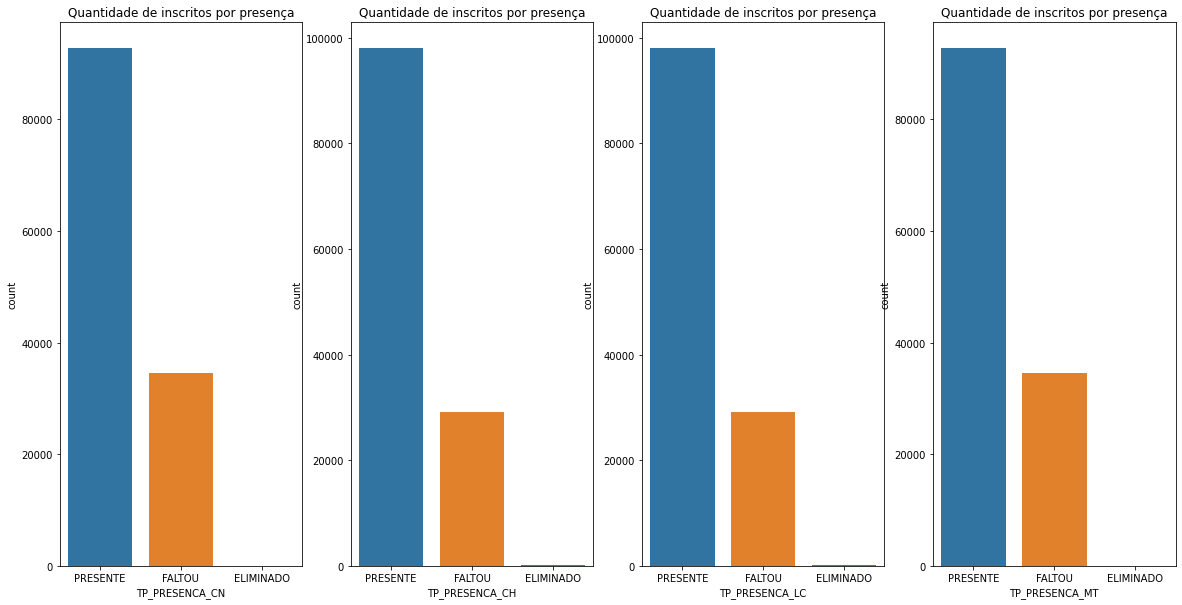

In [96]:
# Gráficos da quantidade de inscritos por prova e presença
fig, ax = plt.subplots(1, 4);

for index, PRESENCA in enumerate(presencaProvas, start = 0):
  sns.countplot(data = dados.replace({PRESENCA: mapeamentoPresenca}), x = PRESENCA, ax = ax[index]).set_title('Quantidade de inscritos por presença');

### Conclusão
Verifica-se que há um grande proporção de inscritos faltantes nas provas. \

Obs: As provas de 'CH' e 'LC' são realizadas juntas, assim como as provas de 'CN' e 'MT'.

## Lingua

In [97]:
# Constantes
dadosLingua = dados[LINGUA];

In [98]:
# Lista coluna de lingua
dadosLingua

0         1
1         1
2         1
3         1
4         0
         ..
127375    1
127376    0
127377    1
127378    1
127379    0
Name: TP_LINGUA, Length: 127380, dtype: int64

In [99]:
# Lista lingua únicos da coluna
dadosLingua.unique()

array([1, 0])

Mapeamento Lingua:
* 0 - Inglês
* 1 - Espanhol

In [100]:
mapeamentoLingua = {0: 'INGLES', 1: 'ESPANHOL'};

In [101]:
# Lista quantidade de inscritos por lingua
dadosLingua.value_counts().rename(index = mapeamentoLingua)

ESPANHOL    66809
INGLES      60571
Name: TP_LINGUA, dtype: int64

In [102]:
# Proporção de inscritos por ligua (%)
((dadosLingua.value_counts().rename(index = mapeamentoLingua) / dados.shape[0]) * 100).round(2).astype(str) + ' %'

ESPANHOL    52.45 %
INGLES      47.55 %
Name: TP_LINGUA, dtype: object

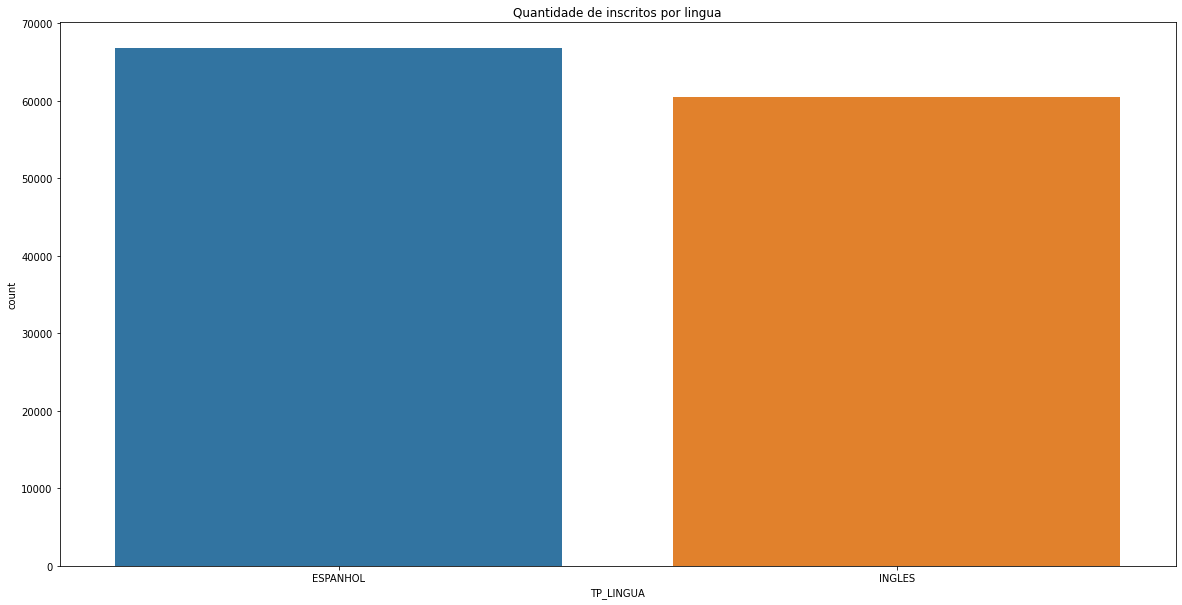

In [103]:
# Gráfico da quantidade de inscritos por lingua
sns.countplot(data = dados.replace({LINGUA: mapeamentoLingua}), x = LINGUA).set_title('Quantidade de inscritos por lingua');

### Conclusão
Pode-se perceber que há na amostra uma quantidade relativamente maior de incritos com a prova para 'Espanhol' do que para 'Inglês'.


## Redação

In [104]:
# Constantes
dadosStatusRedacao = dados[STATUS_REDACAO];

In [105]:
# Lista coluna de estado civil
dadosStatusRedacao

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
127375    1.0
127376    1.0
127377    1.0
127378    1.0
127379    1.0
Name: TP_STATUS_REDACAO, Length: 127380, dtype: float64

In [106]:
# Lista estado civil únicos da coluna
dadosStatusRedacao.unique()

array([ 1., nan,  9.,  4.,  6.,  7.,  8.,  3.,  2.])

In [107]:
# Quantidade de NANs na coluna
dadosStatusRedacao.isna().sum()

29337

In [108]:
# Substituindo NANs por 10
dadosStatusRedacao = dadosStatusRedacao.fillna(10)

Mapeamento Status Redação:
* 1 - Sem problemas
* 2 - Anulada
* 3 - Cópia Texto Motivador
* 4 - Em Branco
* 6 - Fuga ao tema
* 7 - Não atendimento ao tipo textual
* 8 - Texto insuficiente
* 9 - Parte desconectada


In [109]:
mapeamentoStatusRedacao = {1: 'SEM PROBLEMAS', 2: 'ANULADA', 3: 'COPIA', 4: 'EM BRANCO', 6: 'FUGA AO TEMA', 7: 'NAO TIPO TEXTUAL', 8: 'INSUFICIENTE', 9: 'PARTE DESCONECTADA', 10: 'NAN'};

In [110]:
# Lista quantidade de inscritos por status redacao
dadosStatusRedacao.value_counts().rename(index = mapeamentoStatusRedacao)

SEM PROBLEMAS         94538
NAN                   29337
EM BRANCO              1444
FUGA AO TEMA            914
COPIA                   550
INSUFICIENTE            217
ANULADA                 144
PARTE DESCONECTADA      134
NAO TIPO TEXTUAL        102
Name: TP_STATUS_REDACAO, dtype: int64

In [111]:
# Proporção de inscritos por status redacao (%)
((dadosStatusRedacao.value_counts().rename(index = mapeamentoStatusRedacao) / dados.shape[0]) * 100).round(2).astype(str) + ' %'

SEM PROBLEMAS         74.22 %
NAN                   23.03 %
EM BRANCO              1.13 %
FUGA AO TEMA           0.72 %
COPIA                  0.43 %
INSUFICIENTE           0.17 %
ANULADA                0.11 %
PARTE DESCONECTADA     0.11 %
NAO TIPO TEXTUAL       0.08 %
Name: TP_STATUS_REDACAO, dtype: object

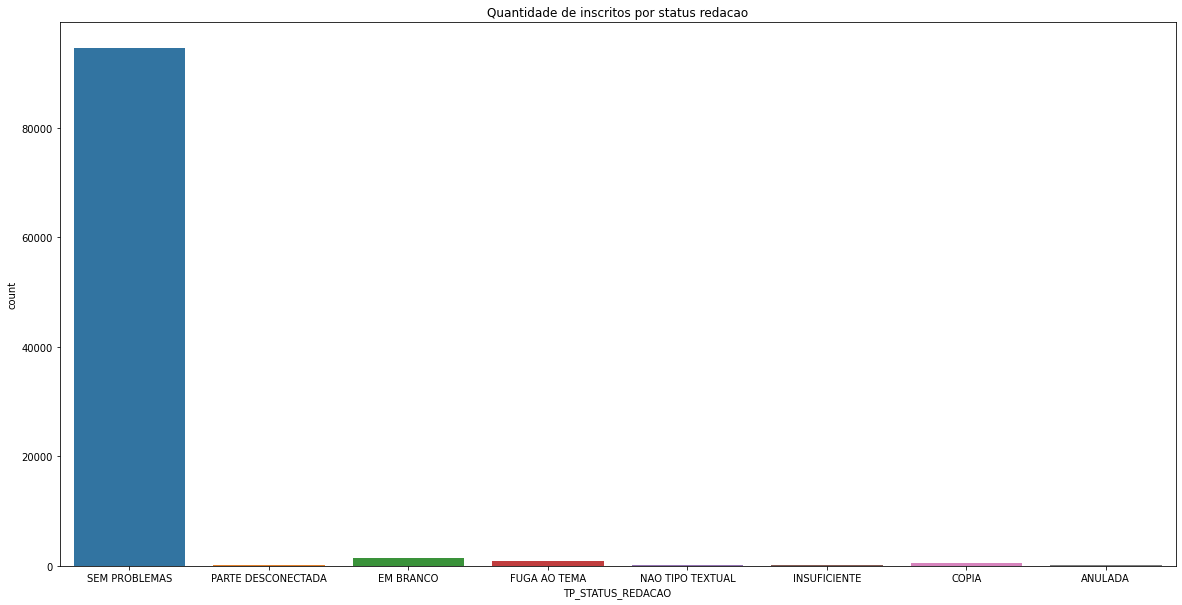

In [112]:
# Gráfico da quantidade de inscritos por status redacao
sns.countplot(data = dados.replace({STATUS_REDACAO: mapeamentoStatusRedacao}), x = STATUS_REDACAO).set_title('Quantidade de inscritos por status redacao');

### Conclusão
Pode-se perceber que há na amostra uma grande representação de redações 'SEM PROBLEMAS'. \
Porém, no dataset, existe em torno de 23% de NANs. O que é uma quantidade considerável de missing values.

## Notas

In [113]:
def plotMeanModeMedianLines(dataset):
  media = dataset.mean()
  moda = dataset.mode()[0]
  mediana = dataset.median()
  yPosition = 2200
  
  plt.axvline(media, c = 'r');
  plt.text(x = media + 2, y = yPosition, s = f'Média: {round(media, 2)}', alpha = 0.7, bbox = dict(facecolor = 'white', alpha = 1.0, edgecolor = 'r'), color = 'r');

  plt.axvline(moda, c = 'g');
  plt.text(x = moda + 2, y = yPosition + 50, s = f'Moda: {round(moda, 2)}', alpha = 0.7, bbox = dict(facecolor = 'white', alpha = 1.0, edgecolor = 'g'), color = 'g');

  plt.axvline(mediana, c = 'b');
  plt.text(x = mediana + 2, y = yPosition + 100, s = f'Mediana {round(mediana, 2)}', alpha = 0.7, bbox = dict(facecolor = 'white', alpha = 1.0, edgecolor = 'b'), color = 'b');

### Nota da prova de Ciências da Natureza

In [114]:
# Constantes
dadosNotaCN = dados[NOTA_CN];

In [115]:
# Lista coluna de nota
dadosNotaCN

0         435.6
1           NaN
2         423.2
3         426.2
4         516.5
          ...  
127375    502.4
127376    449.1
127377      NaN
127378    564.7
127379    466.7
Name: NU_NOTA_CN, Length: 127380, dtype: float64

In [116]:
# Verificando estatísticas gerais das notas
dadosNotaCN.describe()

count    92758.000000
mean       477.964015
std         76.296099
min          0.000000
25%        418.000000
50%        470.200000
75%        533.300000
max        797.300000
Name: NU_NOTA_CN, dtype: float64

In [117]:
# Verificando estatísticas gerais das notas sem zeros
dadosNotaCN[dadosNotaCN != 0].describe()

count    92740.000000
mean       478.056783
std         76.012338
min        327.900000
25%        418.000000
50%        470.200000
75%        533.300000
max        797.300000
Name: NU_NOTA_CN, dtype: float64

In [118]:
# Proporção de zeros
((dadosNotaCN[dadosNotaCN == 0].value_counts() / dados.shape[0]) * 100).round(3).astype(str) + ' %'

0.0    0.014 %
Name: NU_NOTA_CN, dtype: object

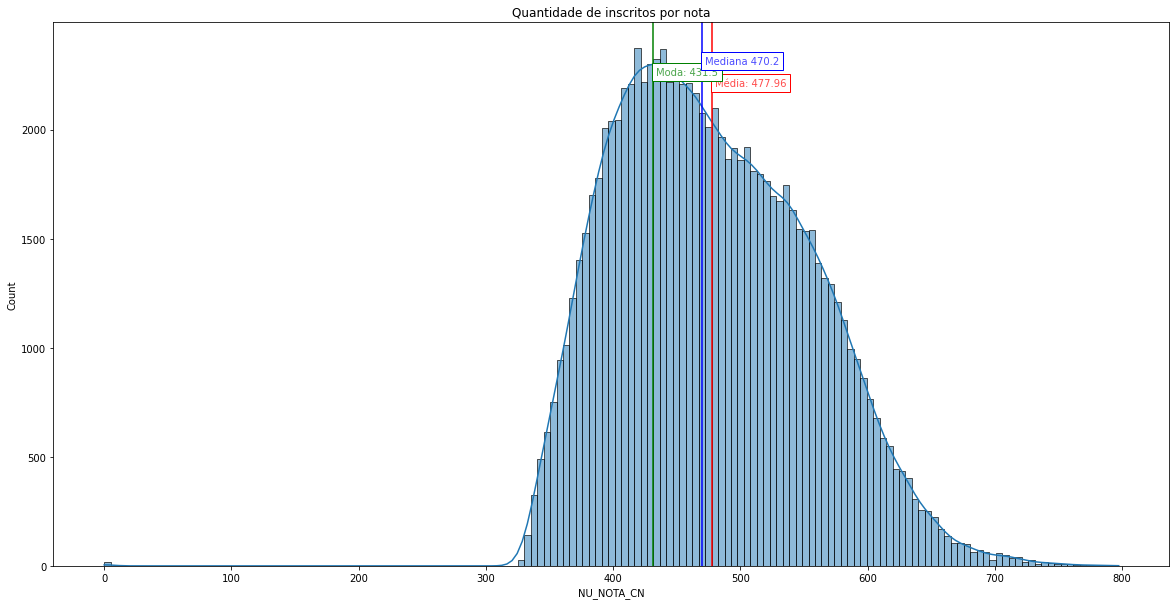

In [119]:
# Gráfico da quantidade de inscritos por nota
sns.histplot(dadosNotaCN, kde = True).set_title('Quantidade de inscritos por nota');
plotMeanModeMedianLines(dadosNotaCN)

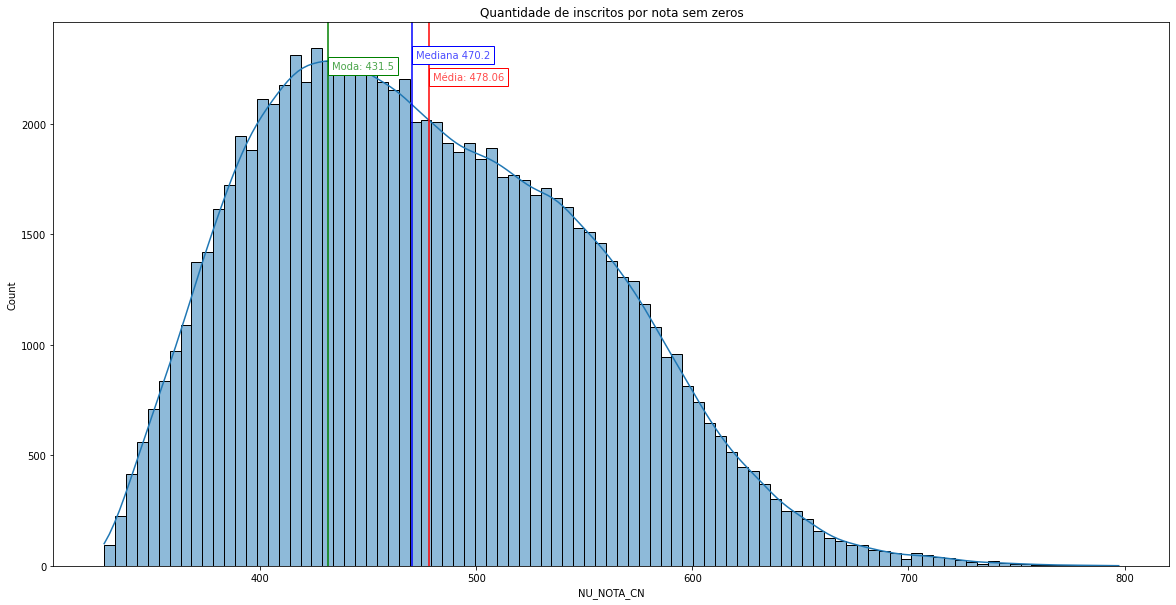

In [120]:
# Gráfico da quantidade de inscritos por nota sem zeros
sns.histplot(dadosNotaCN[dadosNotaCN != 0], kde = True).set_title('Quantidade de inscritos por nota sem zeros');
plotMeanModeMedianLines(dadosNotaCN[dadosNotaCN != 0])

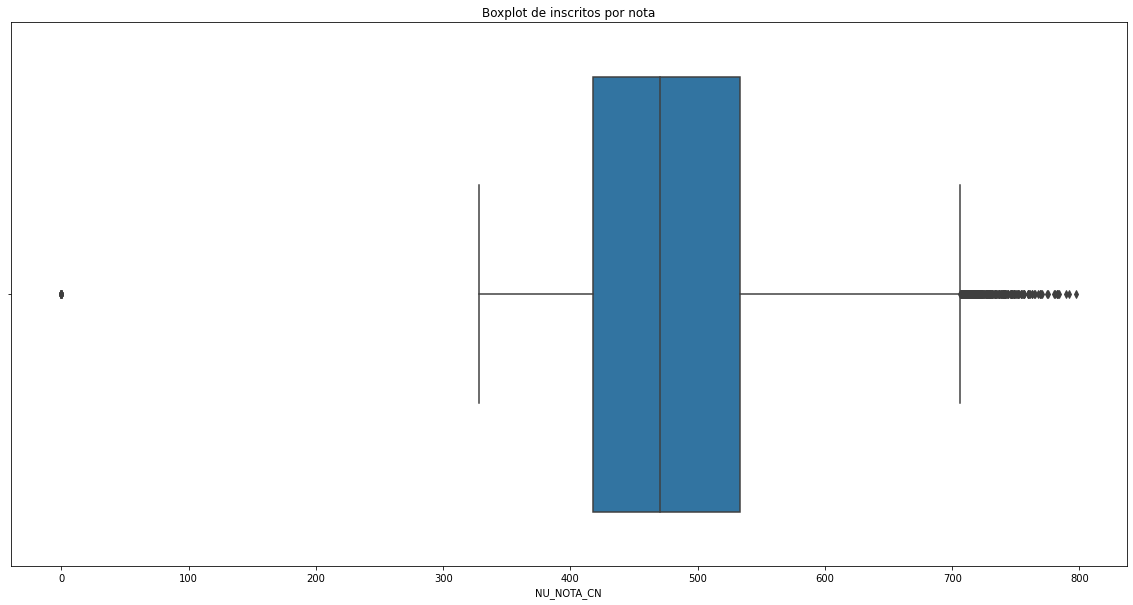

In [121]:
# Boxplot de inscritos por nota
sns.boxplot(data = dados, x = NOTA_CN).set_title('Boxplot de inscritos por nota');

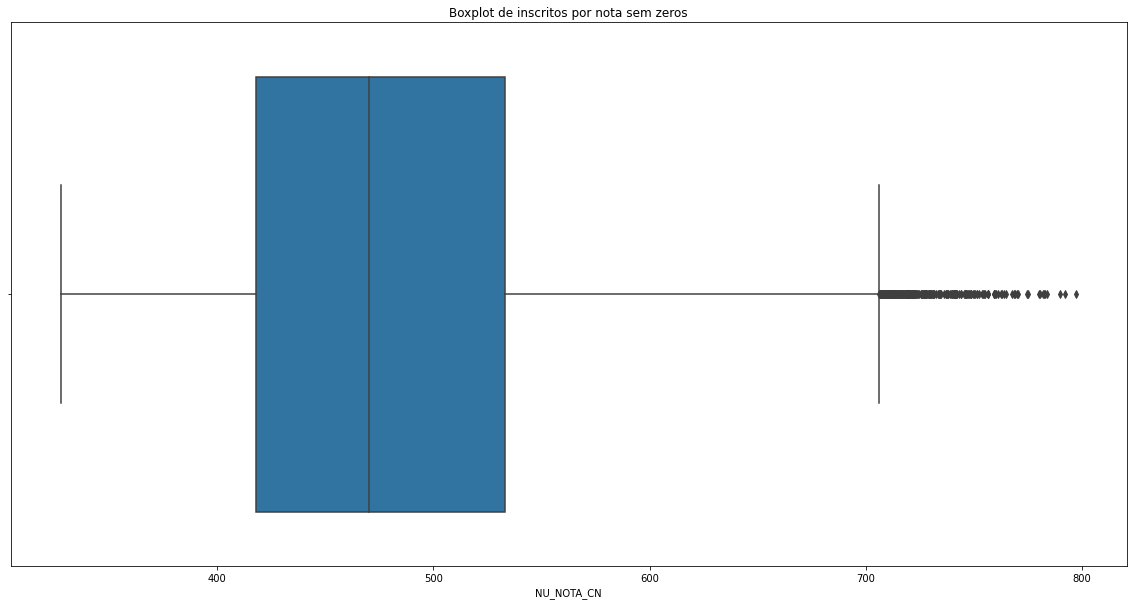

In [122]:
# Boxplot de inscritos por nota sem zeros
sns.boxplot(data = dados[dados[NOTA_CN] != 0], x = NOTA_CN).set_title('Boxplot de inscritos por nota sem zeros');

#### Conclusão
Pode-se verificar que a maior parte dos inscrtos tiraram entre 418 e 533 nesta prova.

Sendo a média das notas em torno de 477.

A maior nota tirada nesta prova foi de 797. \
E a menor nota, desconsiderando os zeros, foi de 327.

### Nota da prova de Ciências Humanas

In [123]:
# Constantes
dadosNotaCH = dados[NOTA_CH];

In [124]:
# Lista coluna de nota
dadosNotaCH

0         512.3
1         409.3
2         499.1
3         578.1
4         571.3
          ...  
127375    559.6
127376    380.9
127377    516.0
127378    416.2
127379    425.5
Name: NU_NOTA_CH, Length: 127380, dtype: float64

In [125]:
# Verificando estatísticas gerais das notas
dadosNotaCH.describe()

count    98043.000000
mean       507.365912
std         82.972839
min          0.000000
25%        447.900000
50%        510.900000
75%        567.100000
max        809.400000
Name: NU_NOTA_CH, dtype: float64

In [126]:
# Verificando estatísticas gerais das notas sem zeros
dadosNotaCH[dadosNotaCH != 0].describe()

count    97867.000000
mean       508.278338
std         80.206620
min        315.900000
25%        448.200000
50%        511.100000
75%        567.200000
max        809.400000
Name: NU_NOTA_CH, dtype: float64

In [127]:
# Proporção de zeros
((dadosNotaCH[dadosNotaCH == 0].value_counts() / dados.shape[0]) * 100).round(3).astype(str) + ' %'

0.0    0.138 %
Name: NU_NOTA_CH, dtype: object

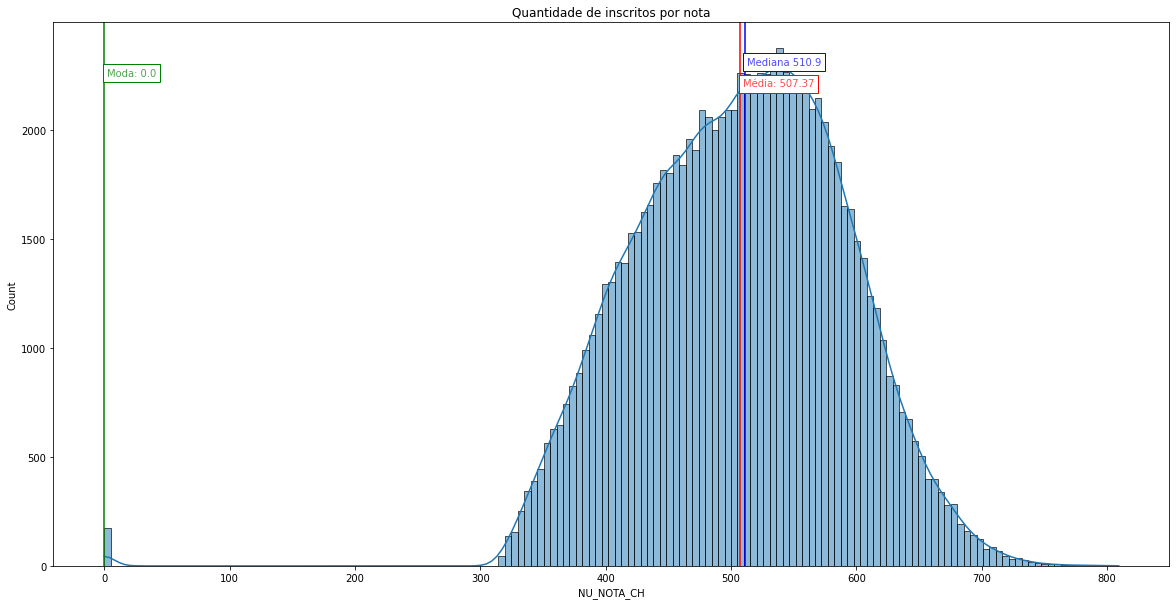

In [128]:
# Gráfico da quantidade de inscritos por nota
sns.histplot(dadosNotaCH, kde = True).set_title('Quantidade de inscritos por nota');
plotMeanModeMedianLines(dadosNotaCH)

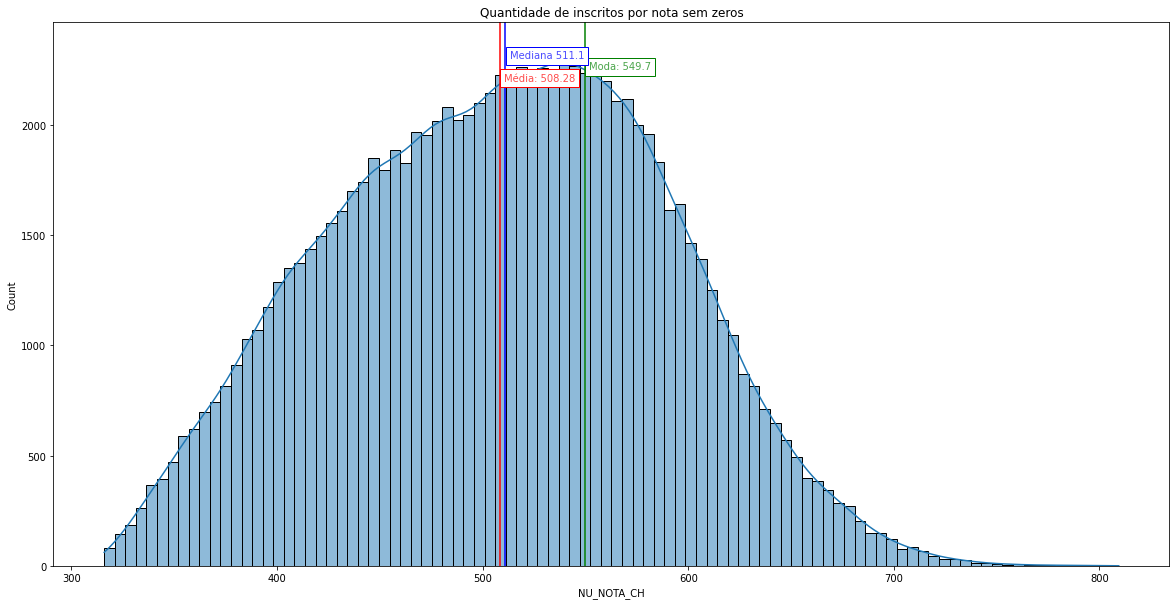

In [129]:
# Gráfico da quantidade de inscritos por nota sem zeros
sns.histplot(dadosNotaCH[dadosNotaCH != 0], kde = True).set_title('Quantidade de inscritos por nota sem zeros');
plotMeanModeMedianLines(dadosNotaCH[dadosNotaCH != 0])

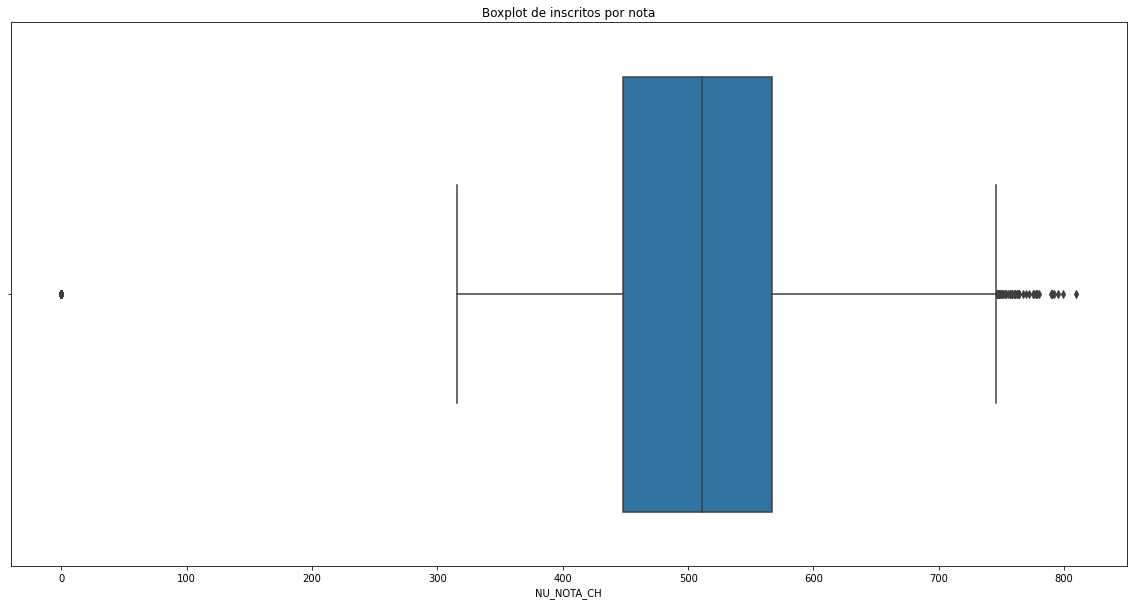

In [130]:
# Boxplot de inscritos por nota
sns.boxplot(data = dados, x = NOTA_CH).set_title('Boxplot de inscritos por nota');

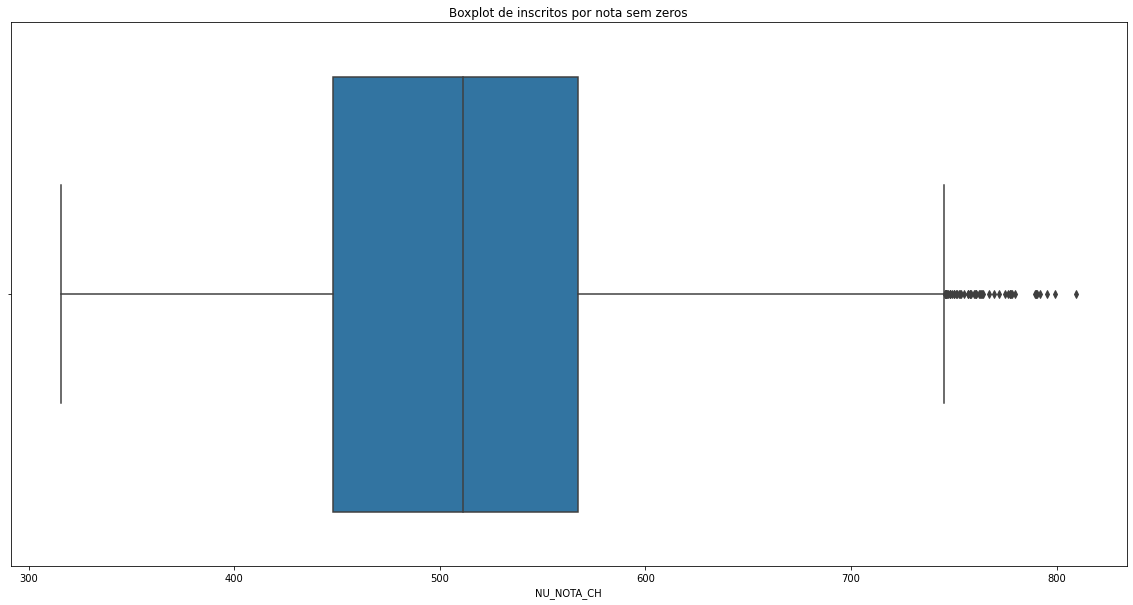

In [131]:
# Boxplot de inscritos por nota sem zeros
sns.boxplot(data = dados[dados[NOTA_CH] != 0], x = NOTA_CH).set_title('Boxplot de inscritos por nota sem zeros');

#### Conclusão
Pode-se verificar que a maior parte dos inscrtos tiraram entre 448 e 567 nesta prova.

Sendo a média das notas em torno de 508.

A maior nota tirada nesta prova foi de 809. \
E a menor nota, desconsiderando os zeros, foi de 315.

### Nota da prova de Linguagens e Códigos

In [132]:
# Constantes
dadosNotaLC = dados[NOTA_LC];

In [133]:
# Lista coluna de nota
dadosNotaLC

0         488.6
1         375.3
2         441.0
3         551.5
4         511.2
          ...  
127375    525.7
127376    450.3
127377    497.9
127378    517.3
127379    477.1
Name: NU_NOTA_LC, Length: 127380, dtype: float64

In [134]:
# Verificando estatísticas gerais das notas
dadosNotaLC.describe()

count    98043.000000
mean       520.463928
std         64.556578
min          0.000000
25%        483.700000
50%        526.100000
75%        565.100000
max        801.700000
Name: NU_NOTA_LC, dtype: float64

In [135]:
# Verificando estatísticas gerais das notas sem zeros
dadosNotaLC[dadosNotaLC != 0].describe()

count    97947.000000
mean       520.974046
std         62.497004
min        322.000000
25%        483.900000
50%        526.200000
75%        565.200000
max        801.700000
Name: NU_NOTA_LC, dtype: float64

In [136]:
# Proporção de zeros
((dadosNotaLC[dadosNotaLC == 0].value_counts() / dados.shape[0]) * 100).round(3).astype(str) + ' %'

0.0    0.075 %
Name: NU_NOTA_LC, dtype: object

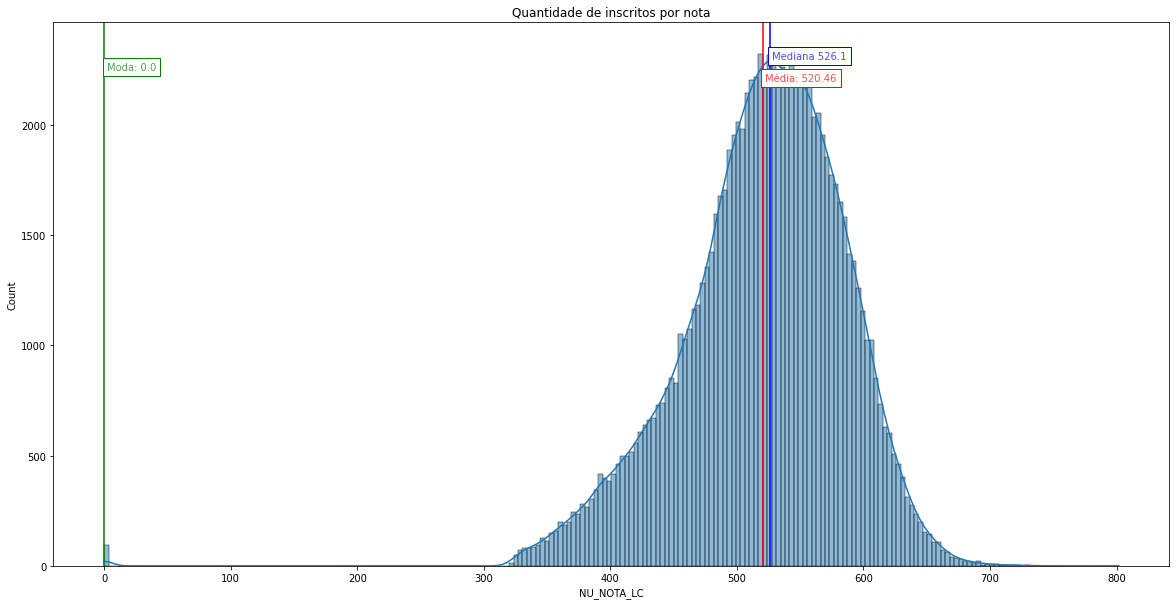

In [137]:
# Gráfico da quantidade de inscritos por nota
sns.histplot(dadosNotaLC, kde = True).set_title('Quantidade de inscritos por nota');
plotMeanModeMedianLines(dadosNotaLC)

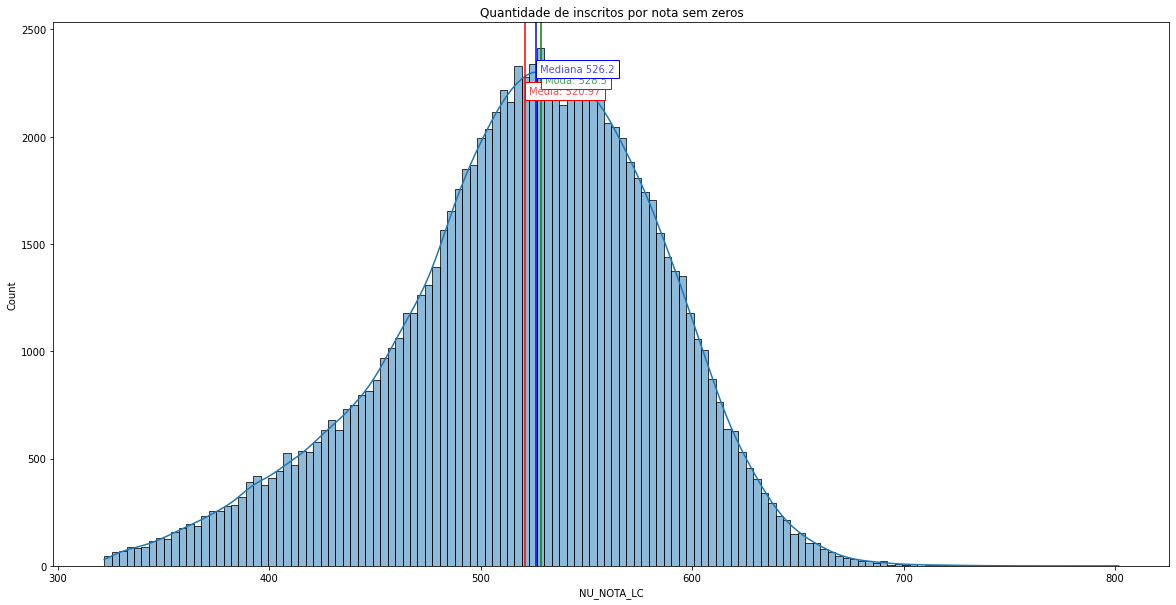

In [138]:
# Gráfico da quantidade de inscritos por nota sem zeros
sns.histplot(dadosNotaLC[dadosNotaLC != 0], kde = True).set_title('Quantidade de inscritos por nota sem zeros');
plotMeanModeMedianLines(dadosNotaLC[dadosNotaLC != 0])

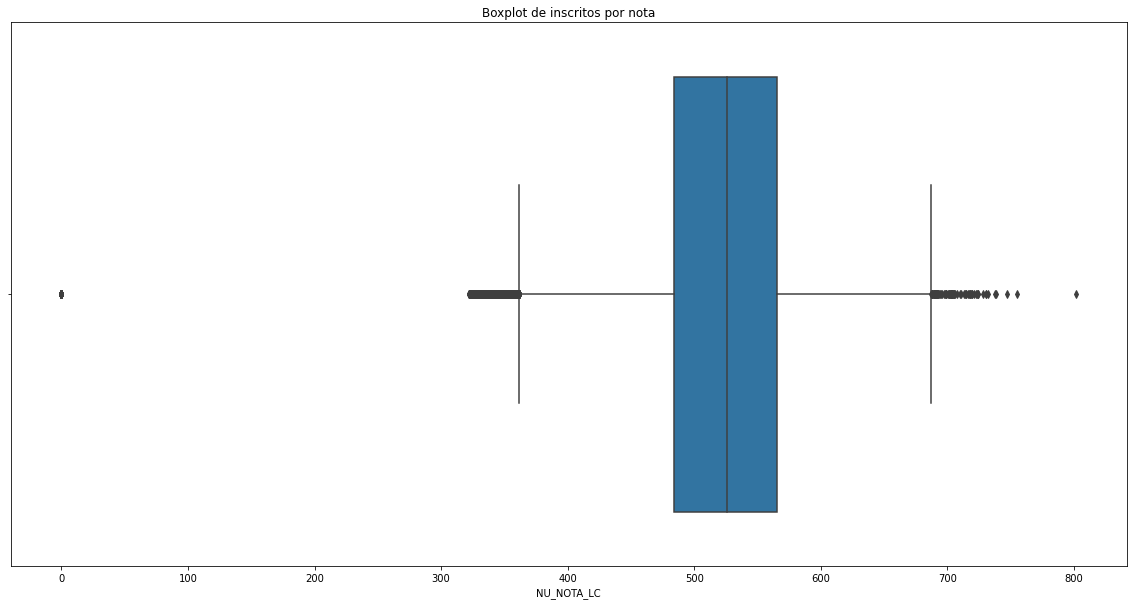

In [139]:
# Boxplot de inscritos por nota
sns.boxplot(data = dados, x = NOTA_LC).set_title('Boxplot de inscritos por nota');

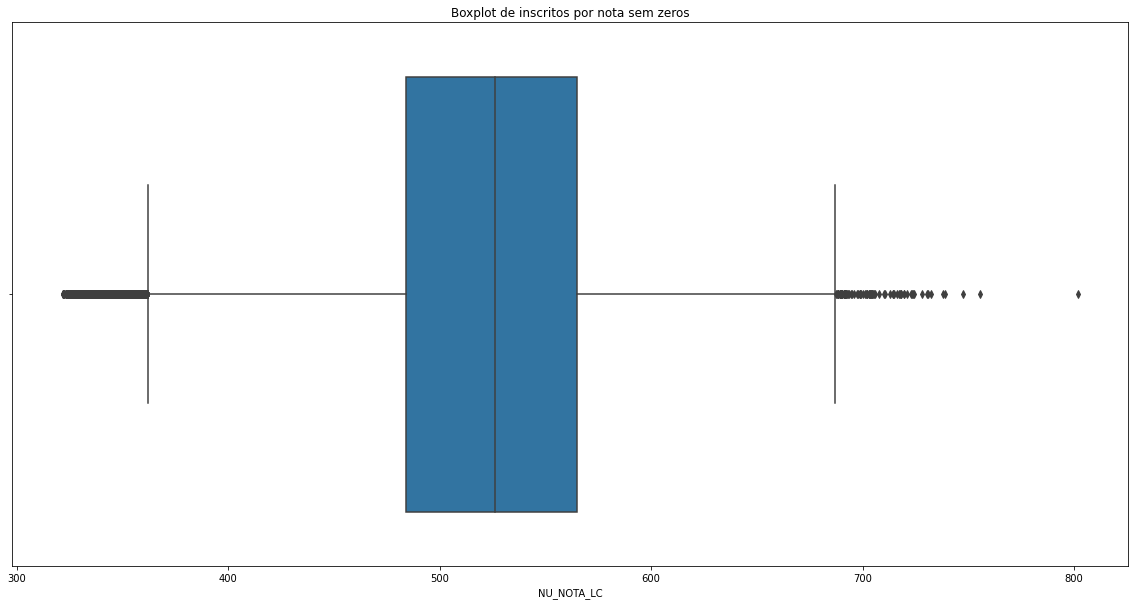

In [140]:
# Boxplot de inscritos por nota sem zeros
sns.boxplot(data = dados[dados[NOTA_LC] != 0], x = NOTA_LC).set_title('Boxplot de inscritos por nota sem zeros');

#### Conclusão
Pode-se verificar que a maior parte dos inscrtos tiraram entre 483 e 565 nesta prova.

Sendo a média das notas em torno de 520.

A maior nota tirada nesta prova foi de 801. \
E a menor nota, desconsiderando os zeros, foi de 322.

### Nota da prova de Matemática

In [141]:
# Constantes
dadosNotaMT = dados[NOTA_MT];

In [142]:
# Lista coluna de nota
dadosNotaMT

0         432.4
1           NaN
2         427.2
3         499.9
4         424.5
          ...  
127375    539.7
127376    418.2
127377      NaN
127378    455.7
127379    438.5
Name: NU_NOTA_MT, Length: 127380, dtype: float64

In [143]:
# Verificando estatísticas gerais das notas
dadosNotaMT.describe()

count    92758.000000
mean       523.555206
std        109.416939
min          0.000000
25%        435.300000
50%        501.600000
75%        598.200000
max        985.000000
Name: NU_NOTA_MT, dtype: float64

In [144]:
# Verificando estatísticas gerais das notas sem zeros
dadosNotaMT[dadosNotaMT != 0].describe()

count    92733.000000
mean       523.696352
std        109.093427
min        359.000000
25%        435.400000
50%        501.700000
75%        598.300000
max        985.000000
Name: NU_NOTA_MT, dtype: float64

In [145]:
# Proporção de zeros
((dadosNotaMT[dadosNotaMT == 0].value_counts() / dados.shape[0]) * 100).round(3).astype(str) + ' %'

0.0    0.02 %
Name: NU_NOTA_MT, dtype: object

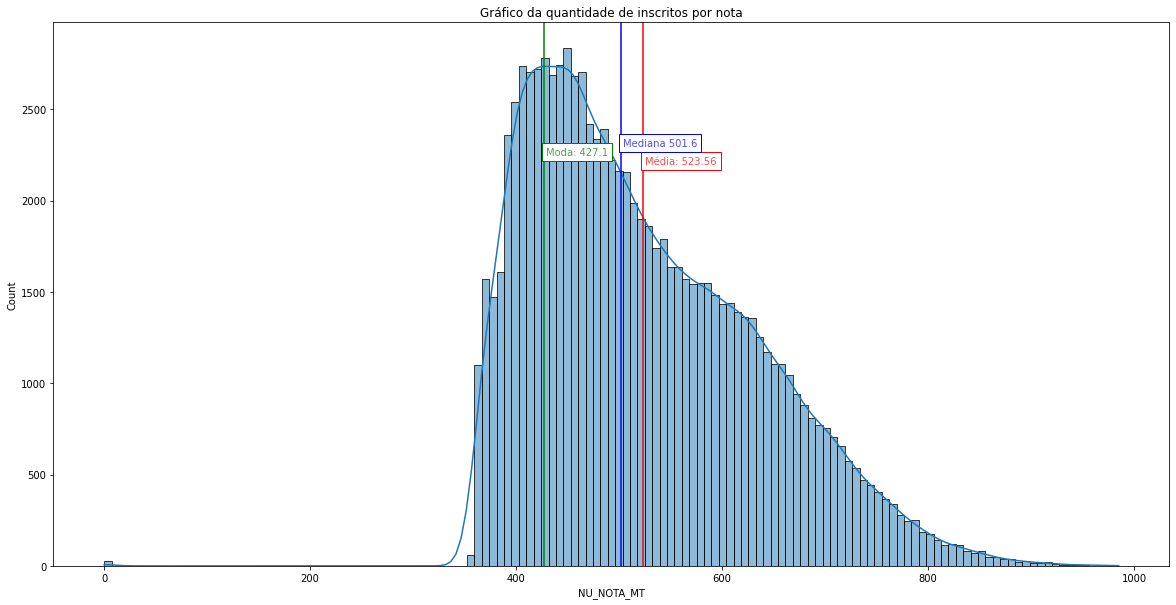

In [146]:
# Gráfico da quantidade de inscritos por nota
sns.histplot(dadosNotaMT, kde = True).set_title('Gráfico da quantidade de inscritos por nota');
plotMeanModeMedianLines(dadosNotaMT)

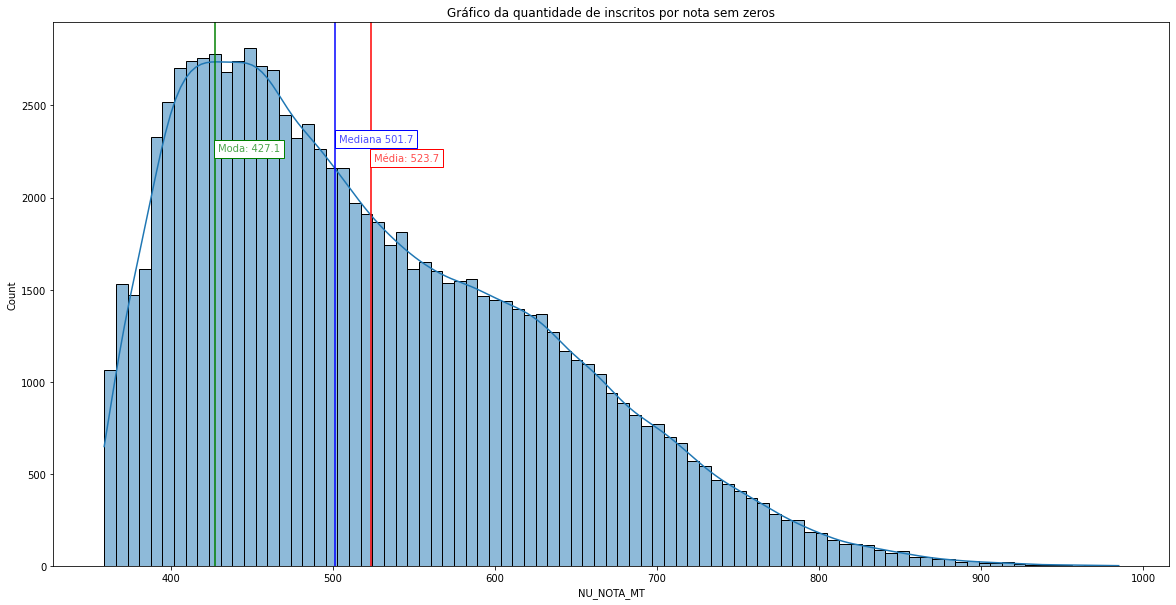

In [147]:
# Gráfico da quantidade de inscritos por nota sem zeros
sns.histplot(dadosNotaMT[dadosNotaMT != 0], kde = True).set_title('Gráfico da quantidade de inscritos por nota sem zeros');
plotMeanModeMedianLines(dadosNotaMT[dadosNotaMT != 0])

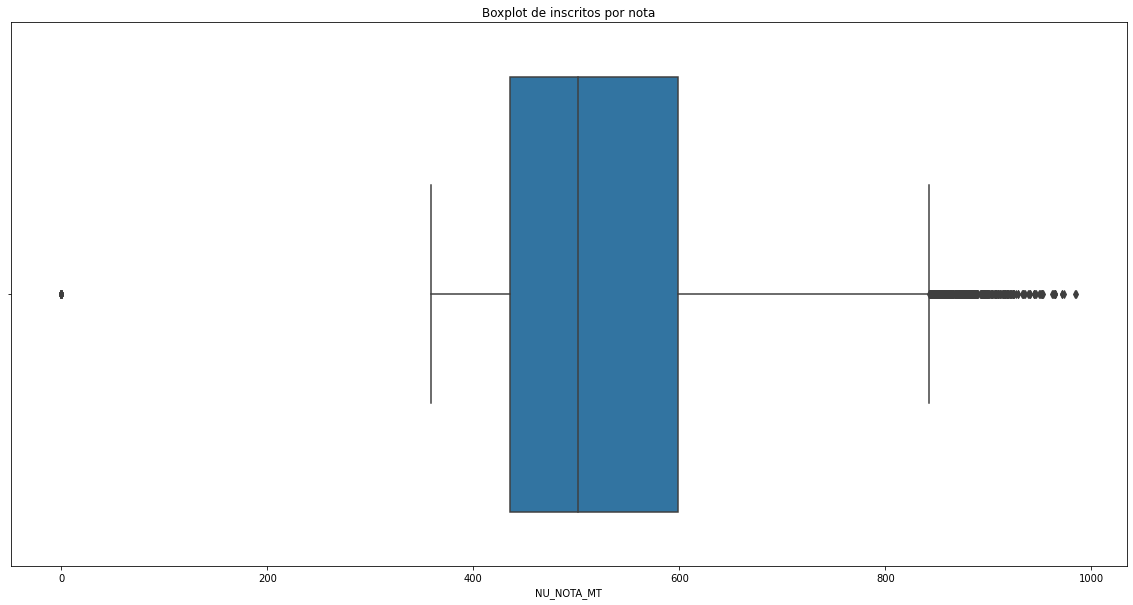

In [148]:
# Boxplot de inscritos por nota
sns.boxplot(data = dados, x = NOTA_MT).set_title('Boxplot de inscritos por nota');

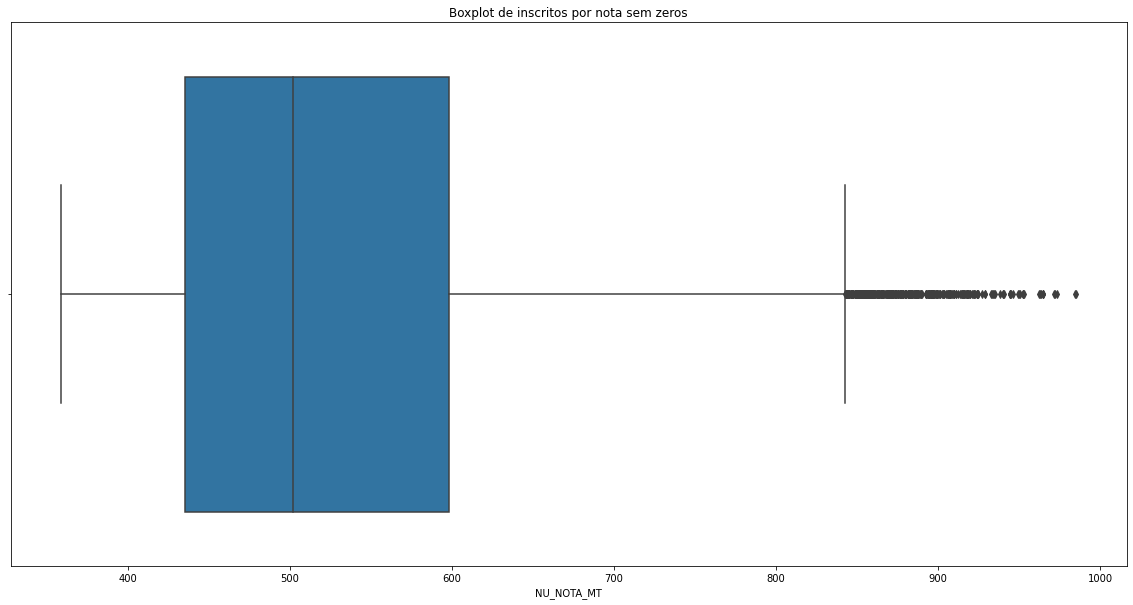

In [149]:
# Boxplot de inscritos por nota sem zeros
sns.boxplot(data = dados[dados[NOTA_MT] != 0], x = NOTA_MT).set_title('Boxplot de inscritos por nota sem zeros');

#### Conclusão
Pode-se verificar que a maior parte dos inscrtos tiraram entre 435 e 598 nesta prova.

Sendo a média das notas em torno de 523.

A maior nota tirada nesta prova foi de 985. \
E a menor nota, desconsiderando os zeros, foi de 359.

### Nota da prova de redação

In [150]:
# Constantes
dadosNotaREDACAO = dados[NOTA_REDACAO];

In [151]:
# Lista coluna de nota
dadosNotaREDACAO

0         420.0
1         400.0
2         560.0
3         500.0
4         780.0
          ...  
127375    740.0
127376    520.0
127377    440.0
127378    620.0
127379    480.0
Name: NU_NOTA_REDACAO, Length: 127380, dtype: float64

In [152]:
# Verificando estatísticas gerais das notas
dadosNotaREDACAO.describe()

count    98043.000000
mean       571.570025
std        188.076455
min          0.000000
25%        480.000000
50%        580.000000
75%        680.000000
max       1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

In [153]:
# Verificando estatísticas gerais das notas sem zeros
dadosNotaREDACAO[dadosNotaREDACAO != 0].describe()

count    94538.000000
mean       592.761006
std        155.315462
min         40.000000
25%        500.000000
50%        580.000000
75%        680.000000
max       1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

In [154]:
# Proporção de zeros
((dadosNotaREDACAO[dadosNotaREDACAO == 0].value_counts() / dados.shape[0]) * 100).round(3).astype(str) + ' %'

0.0    2.752 %
Name: NU_NOTA_REDACAO, dtype: object

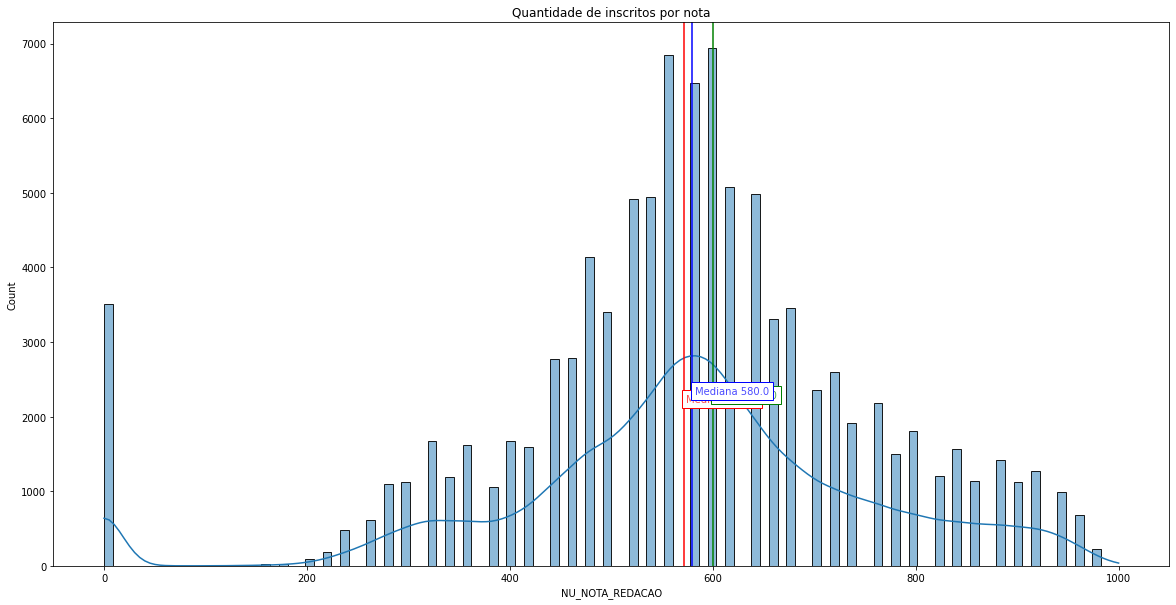

In [155]:
# Gráfico da quantidade de inscritos por nota
sns.histplot(dadosNotaREDACAO, kde = True).set_title('Quantidade de inscritos por nota');
plotMeanModeMedianLines(dadosNotaREDACAO)

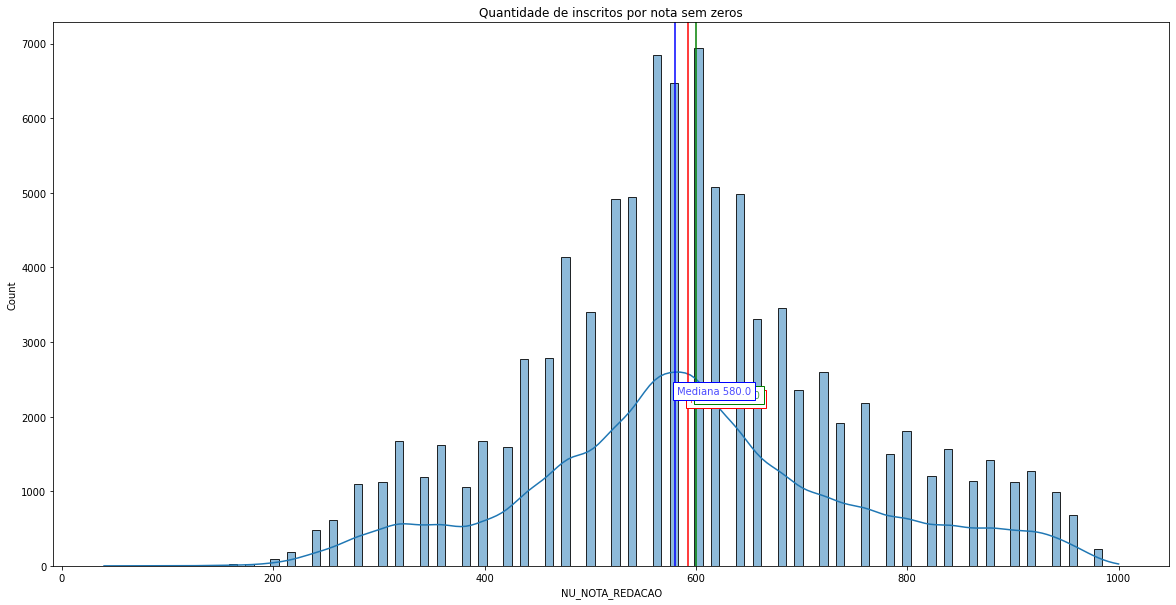

In [156]:
# Gráfico da quantidade de inscritos por nota sem zeros
sns.histplot(dadosNotaREDACAO[dadosNotaREDACAO != 0], kde = True).set_title('Quantidade de inscritos por nota sem zeros');
plotMeanModeMedianLines(dadosNotaREDACAO[dadosNotaREDACAO != 0])

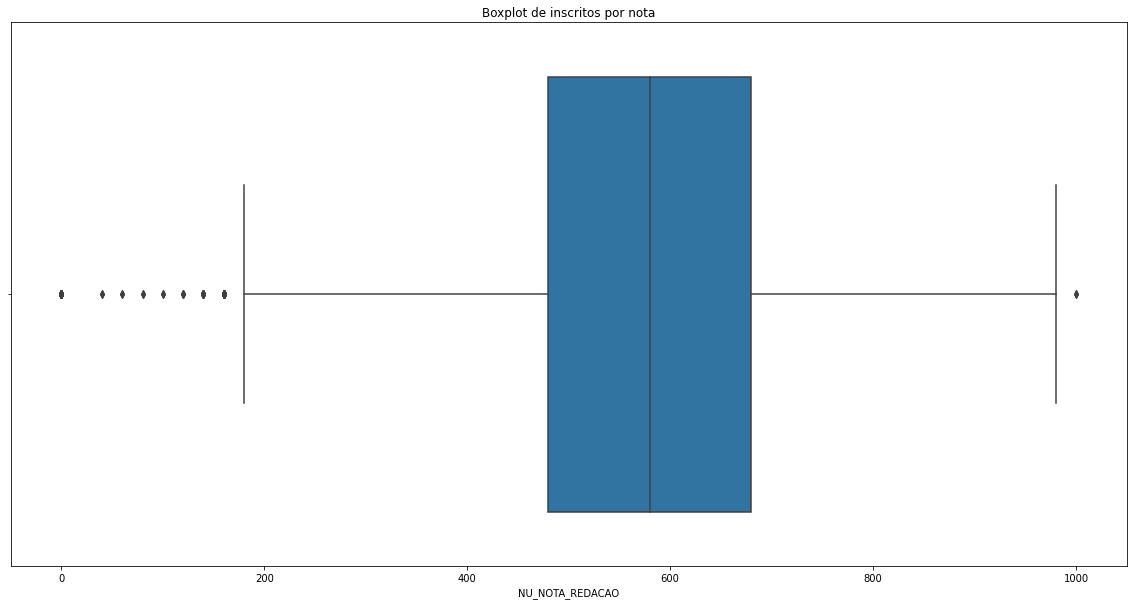

In [157]:
# Boxplot de inscritos por nota
sns.boxplot(data = dados, x = NOTA_REDACAO).set_title('Boxplot de inscritos por nota');

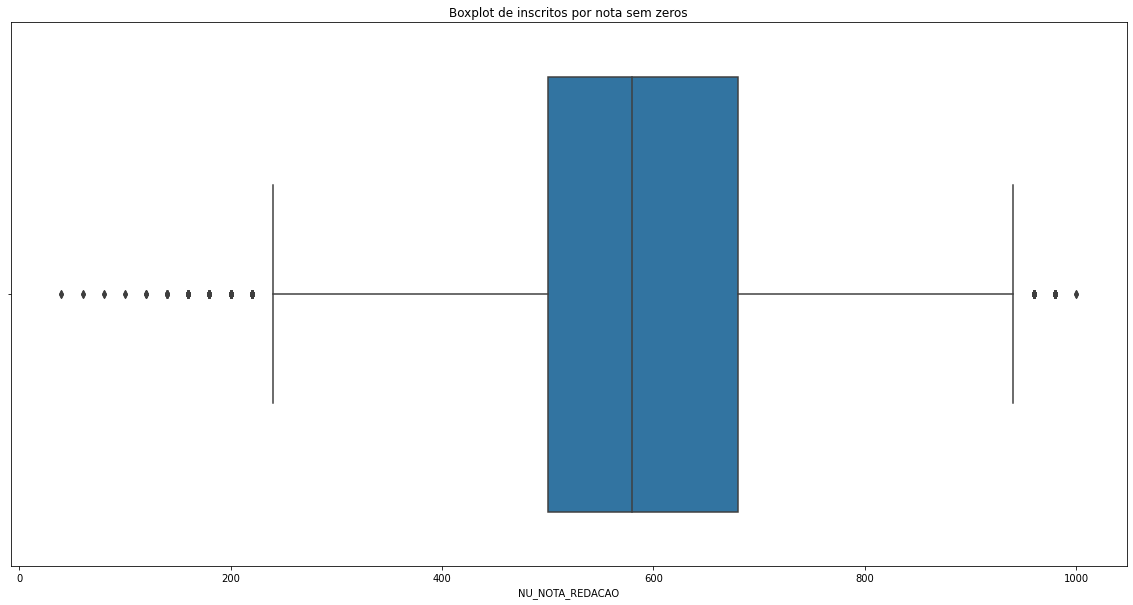

In [158]:
# Boxplot de inscritos por nota sem zeros
sns.boxplot(data = dados[dados[NOTA_REDACAO] != 0], x = NOTA_REDACAO).set_title('Boxplot de inscritos por nota sem zeros');

#### Conclusão
Pode-se verificar que a maior parte dos inscrtos tiraram entre 480 e 680 nesta prova.

Sendo a média das notas em torno de 592.

Um ponto interessante é que estas notas parecem que são ajustadas para o decimal mais próximo (sempre terminando em 0.00). \
Outro ponto interessante é que quase 2% dos inscritos tiraram zero.

A maior nota tirada nesta prova foi de 1000. \
E a menor nota, desconsiderando os zeros, foi de 40. \

Sua distribuição se aproxima de uma normal.

## Questionário Socioeconômico

### Perguntas geral

In [159]:
# Lista e exibe quantidade de questoes socioeconomicos
questoesSocioEconomicas = ['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
                           'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

perguntasSocioEconomicas = ['Até que série seu pai, ou o homem responsável por você, estudou?', 'Até que série sua mãe, ou a mulher responsável por você, estudou?', 
                            'A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).', 
                            'A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).', 
                            'Incluindo você, quantas pessoas moram atualmente em sua residência?', 'Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)', 
                            'Em sua residência trabalha empregado(a) doméstico(a)?', 'Na sua residência tem banheiro?', 'Na sua residência tem quartos para dormir?', 
                            'Na sua residência tem carro?', 'Na sua residência tem motocicleta?', 'Na sua residência tem geladeira?', 'Na sua residência tem freezer (independente ou segunda porta da geladeira)?', 
                            'Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)', 'Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?', 
                            'Na sua residência tem forno micro-ondas?', 'Na sua residência tem máquina de lavar louça?', 'Na sua residência tem aspirador de pó?', 'Na sua residência tem televisão em cores?', 
                            'Na sua residência tem aparelho de DVD?', 'Na sua residência tem TV por assinatura?', 'Na sua residência tem telefone celular?', 'Na sua residência tem telefone fixo?', 
                            'Na sua residência tem computador?', 'Na sua residência tem acesso à Internet?']

mapeamentoSocioEconomicas = [
  { 'A': 'Nunca estudou', 'B': 'Não 4ª/5º Fundamental', 'C': 'Não 8ª/9º Fundamental', 'D': '8ª/9º Fundamental', 'E': 'Ensino Médio', 'F': 'Faculdade', 'G': 'Pós-graduação', 'H': 'Não sei' },
  { 'A': 'Nunca estudou', 'B': 'Não 4ª/5º Fundamental', 'C': 'Não 8ª/9º Fundamental', 'D': '8ª/9º Fundamental', 'E': 'Ensino Médio', 'F': 'Faculdade', 'G': 'Pós-graduação', 'H': 'Não sei' },
  {}, {}, {},
  { 'A': 'Nenhuma renda', 'B': 'Até R$ 998,00', 'C': 'Até R$ 1.497,00', 'D': 'Até R$ 1.996,00', 'E': 'Até R$ 2.495,00', 'F': 'Até R$ 2.994,00', 'G': 'Até R$ 3.992,00', 'H': 'Até R$ 4.990,00', 
   'I': 'Até R$ 5.988,00', 'J': 'Até R$ 6.986,00', 'K': 'Até R$ 7.984,00', 'L': 'Até R$ 8.982,00', 'M': 'Até R$ 9.980,00', 'N': 'Até R$ 11.976,00', 'O': 'Até R$ 14.970,00', 
   'P': 'Até R$ 19.960,00', 'Q': 'Maior que R$ 19.960,00' }, 
  { 'A': 'Não', 'B': 'Sim, um ou dois dias por semana', 'C': 'Sim, três ou quatro dias por semana', 'D': 'Sim, pelo menos cinco dias por semana' },
  { 'A': 'Não', 'B': 'Sim, um', 'C': 'Sim, dois', 'D': 'Sim, três', 'E': 'Sim, quatro ou mais' },
  { 'A': 'Não', 'B': 'Sim, um', 'C': 'Sim, dois', 'D': 'Sim, três', 'E': 'Sim, quatro ou mais' },
  { 'A': 'Não', 'B': 'Sim, um', 'C': 'Sim, dois', 'D': 'Sim, três', 'E': 'Sim, quatro ou mais' },
  { 'A': 'Não', 'B': 'Sim, um', 'C': 'Sim, dois', 'D': 'Sim, três', 'E': 'Sim, quatro ou mais' },
  { 'A': 'Não', 'B': 'Sim, um', 'C': 'Sim, dois', 'D': 'Sim, três', 'E': 'Sim, quatro ou mais' },
  { 'A': 'Não', 'B': 'Sim, um', 'C': 'Sim, dois', 'D': 'Sim, três', 'E': 'Sim, quatro ou mais' },
  {}, {}, {}, {}, {}, 
  { 'A': 'Não', 'B': 'Sim, um', 'C': 'Sim, dois', 'D': 'Sim, três', 'E': 'Sim, quatro ou mais' },
  {}, {},
  { 'A': 'Não', 'B': 'Sim, um', 'C': 'Sim, dois', 'D': 'Sim, três', 'E': 'Sim, quatro ou mais' },
  { 'A': 'Não', 'B': 'Sim' },
  { 'A': 'Não', 'B': 'Sim, um', 'C': 'Sim, dois', 'D': 'Sim, três', 'E': 'Sim, quatro ou mais' },
  { 'A': 'Não', 'B': 'Sim' }
]

len(questoesSocioEconomicas)

25

In [160]:
def proporcaoQuestao(i):
  print(perguntasSocioEconomicas[i])
  print(((dados[questoesSocioEconomicas[i]].value_counts().rename(index = mapeamentoSocioEconomicas[i]) / dados.shape[0]) * 100).round(2).astype(str) + ' %')

def plotQuestao(i):
  sns.countplot(data = dados.replace({questoesSocioEconomicas[i]: mapeamentoSocioEconomicas[i]}), x = questoesSocioEconomicas[i]).set_title(perguntasSocioEconomicas[i]);

### Até que série seu pai, ou o homem responsável por você, estudou?

In [161]:
proporcaoQuestao(0)

Até que série seu pai, ou o homem responsável por você, estudou?
Ensino Médio             25.87 %
Não 4ª/5º Fundamental    22.29 %
Não 8ª/9º Fundamental    13.97 %
8ª/9º Fundamental         11.6 %
Não sei                   8.64 %
Faculdade                 7.39 %
Nunca estudou             5.74 %
Pós-graduação             4.51 %
Name: Q001, dtype: object


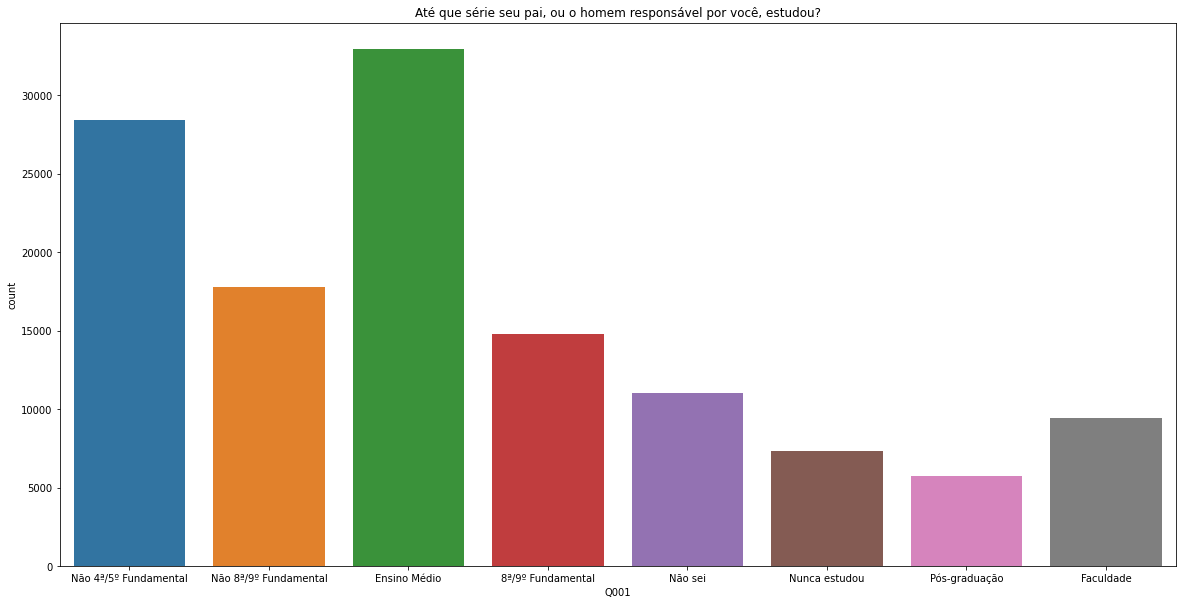

In [162]:
plotQuestao(0)

#### Conclusão
Percebe-se que há uma grande parte da população tem um pai que não concluiu o Ensino Fundamental e uma grande fatia de pais que nunca estudaram. \
Por outro lado, também há bastantes pais que concluiram uma faculdade ou até pós graduação.

### Até que série sua mãe, ou a mulher responsável por você, estudou?


In [163]:
proporcaoQuestao(1)

Até que série sua mãe, ou a mulher responsável por você, estudou?
Ensino Médio             32.04 %
Não 4ª/5º Fundamental    16.78 %
Não 8ª/9º Fundamental    13.44 %
8ª/9º Fundamental        13.13 %
Faculdade                10.05 %
Pós-graduação             7.88 %
Nunca estudou              3.8 %
Não sei                   2.88 %
Name: Q002, dtype: object


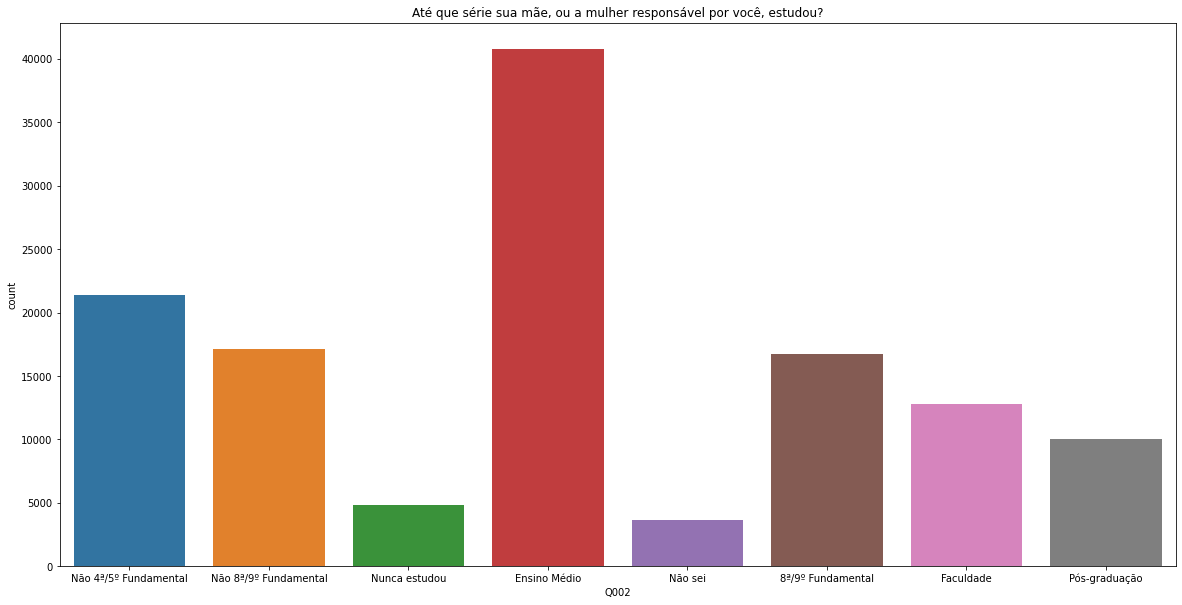

In [164]:
plotQuestao(1)

#### Conclusão
Percebe-se que há uma grande parte da população tem uma mãe que não concluiu o Ensino Fundamental e uma grande fatia de mães que nunca estudaram. \
Por outro lado, também há bastantes mães que concluiram uma faculdade ou até pós graduação.

### Incluindo você, quantas pessoas moram atualmente em sua residência?

In [165]:
proporcaoQuestao(4)

Incluindo você, quantas pessoas moram atualmente em sua residência?
4     32.32 %
3     25.42 %
5     16.25 %
2     12.83 %
6       6.1 %
1       2.7 %
7      2.42 %
8      1.08 %
9      0.39 %
10     0.27 %
11     0.08 %
12     0.06 %
13     0.03 %
20     0.02 %
14     0.01 %
16     0.01 %
15     0.01 %
19      0.0 %
17      0.0 %
18      0.0 %
Name: Q005, dtype: object


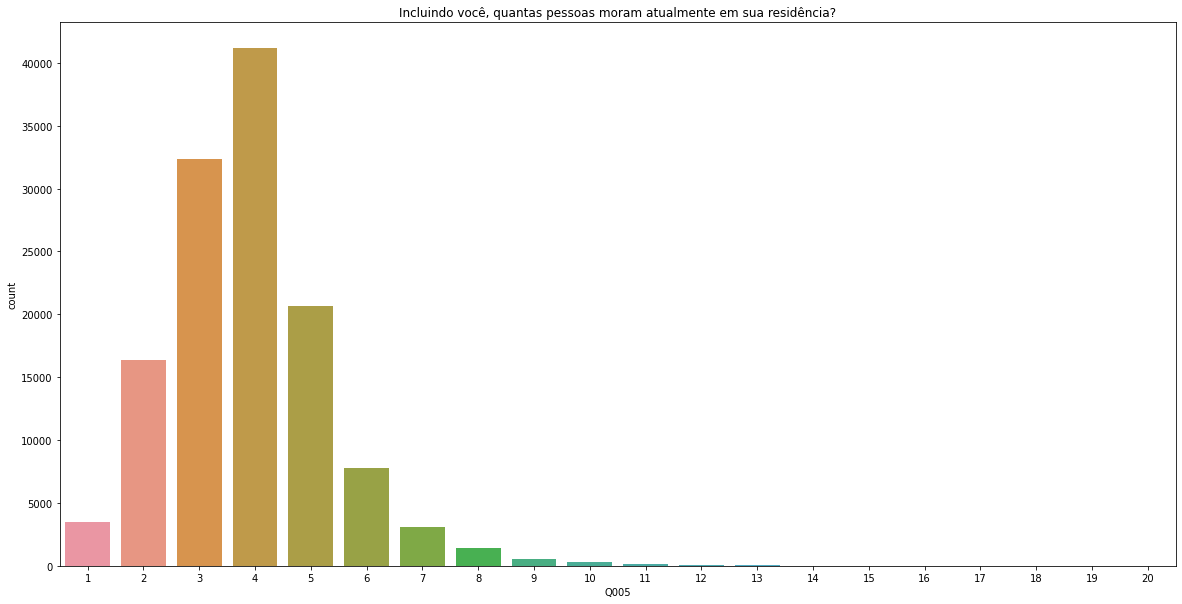

In [166]:
plotQuestao(4)

#### Conclusão
Percebe-se verificar que a quantidade de pessoas morando na mesma residência dos inscritos fica em torno de 3 a 4 pessoas. \
Também há residências que moram até mais de 10 pessoas. \

### Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

In [167]:
proporcaoQuestao(5)

Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
Até R$ 1.497,00           25.59 %
Até R$ 998,00             24.96 %
Até R$ 1.996,00            9.86 %
Até R$ 2.495,00            9.31 %
Até R$ 3.992,00            5.91 %
Nenhuma renda              4.58 %
Até R$ 2.994,00            4.43 %
Até R$ 4.990,00            3.78 %
Até R$ 5.988,00            2.79 %
Até R$ 6.986,00            1.65 %
Até R$ 11.976,00            1.2 %
Até R$ 7.984,00            1.16 %
Maior que R$ 19.960,00     1.13 %
Até R$ 14.970,00           1.04 %
Até R$ 19.960,00           0.89 %
Até R$ 8.982,00            0.87 %
Até R$ 9.980,00            0.86 %
Name: Q006, dtype: object


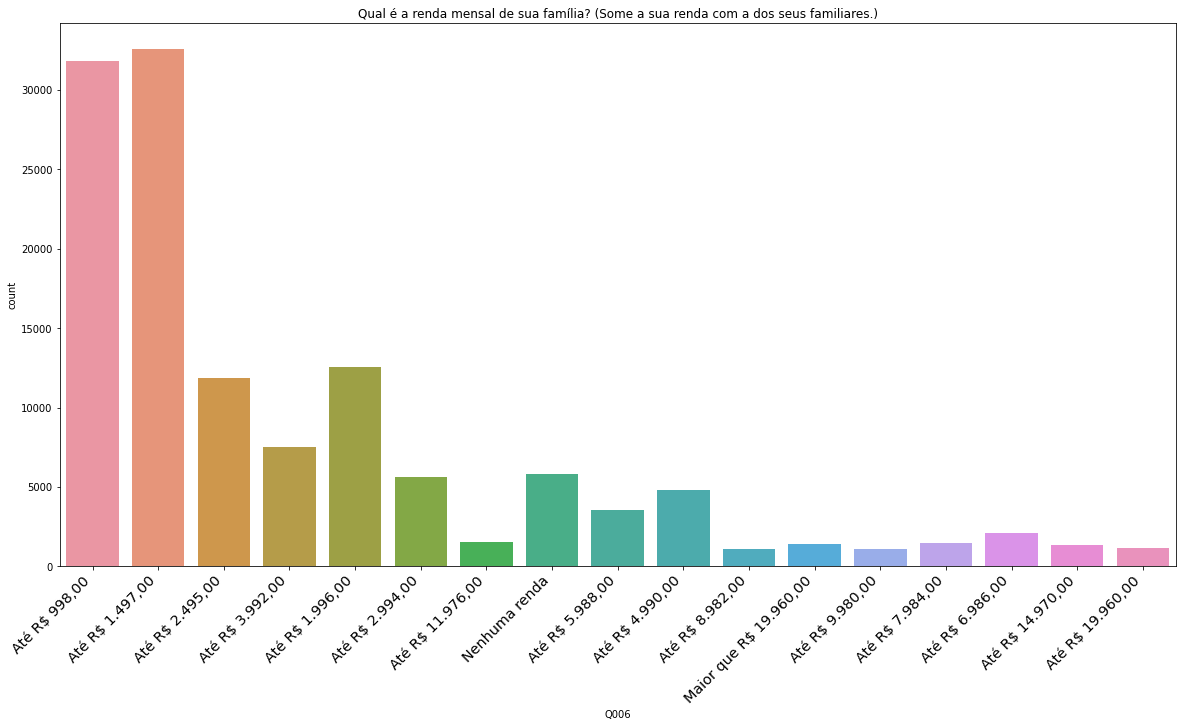

In [168]:
plotQuestao(5)
rotateLabels()

#### Conclusão
Uma grande concentração de inscritos com baixa renda familiar.

É um reflexo da desigualdade no país.

* Em torno de 25% das famílias dos inscritos recebem menos que um salário mínimo. (Em 2019 era de R\$ 998,00).

* Um pouco mais de 50% das famílias dos inscritos recebem menos que R\$ 1.500,00.

* Quase 0.9% das famílias dos inscritos recebem mais que R\$ 19.000,00.

### Em sua residência trabalha empregado(a) doméstico(a)?

In [169]:
proporcaoQuestao(6)

Em sua residência trabalha empregado(a) doméstico(a)?
Não                                      92.58 %
Sim, um ou dois dias por semana           3.94 %
Sim, pelo menos cinco dias por semana     2.59 %
Sim, três ou quatro dias por semana       0.89 %
Name: Q007, dtype: object


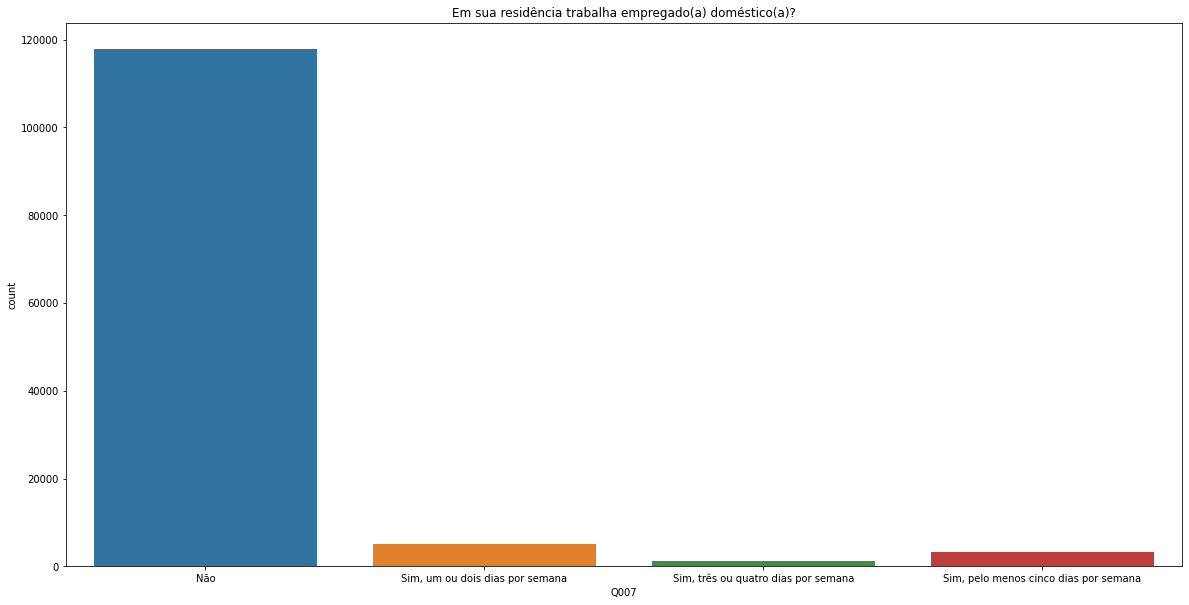

In [170]:
plotQuestao(6)

#### Conclusão
A grande maioria das residências dos inscritos **não** tem empredado(a) doméstico(a). \
Uma pequena quantidade tem, mas por um ou dois dias (diarista) e uma quantidade um pouco menor também tem, mas por pelo menos 5 dias (regime de 40h).


### Na sua residência tem banheiro?

In [171]:
proporcaoQuestao(7)

Na sua residência tem banheiro?
Sim, um                70.66 %
Sim, dois              20.25 %
Sim, três               5.31 %
Sim, quatro ou mais     2.83 %
Não                     0.94 %
Name: Q008, dtype: object


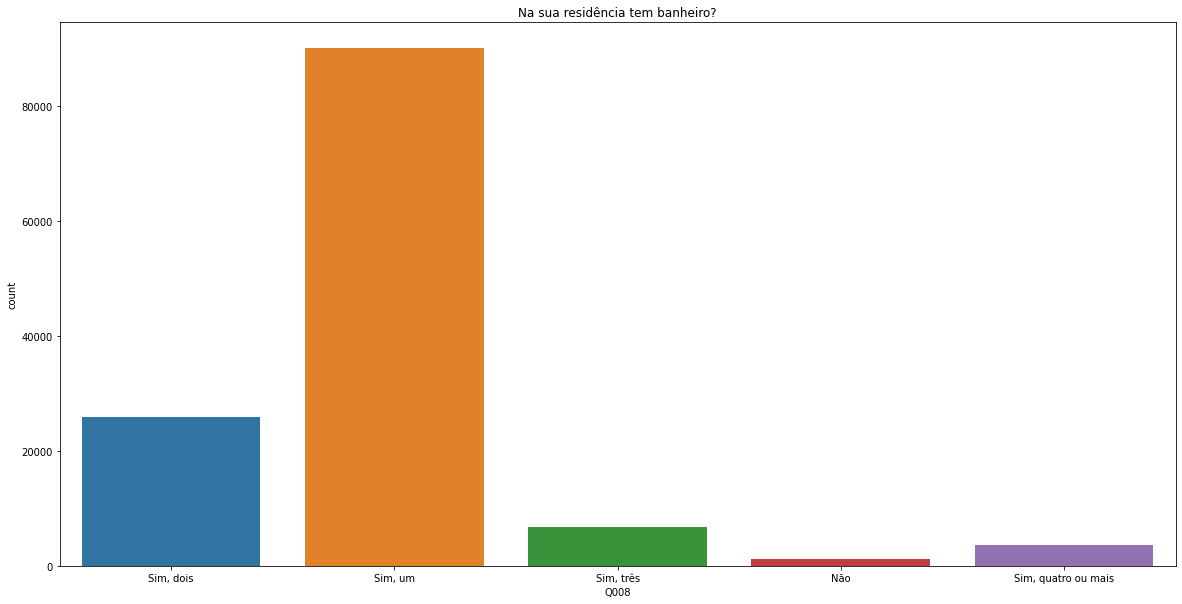

In [172]:
plotQuestao(7)

#### Conclusão
Banheiro é um dos cômodos mais essenciais de uma habitação. Com ele, há na residência um local especializado para cuidados de higiene pessoal! \

A grande observação neste ponto, é que quase 1% das residências dos inscritos **não** tem banheiro.

### Na sua residência tem quartos para dormir?

In [173]:
proporcaoQuestao(8)

Na sua residência tem quartos para dormir?
Sim, dois              50.49 %
Sim, três              30.14 %
Sim, um                13.62 %
Sim, quatro ou mais     4.91 %
Não                     0.84 %
Name: Q009, dtype: object


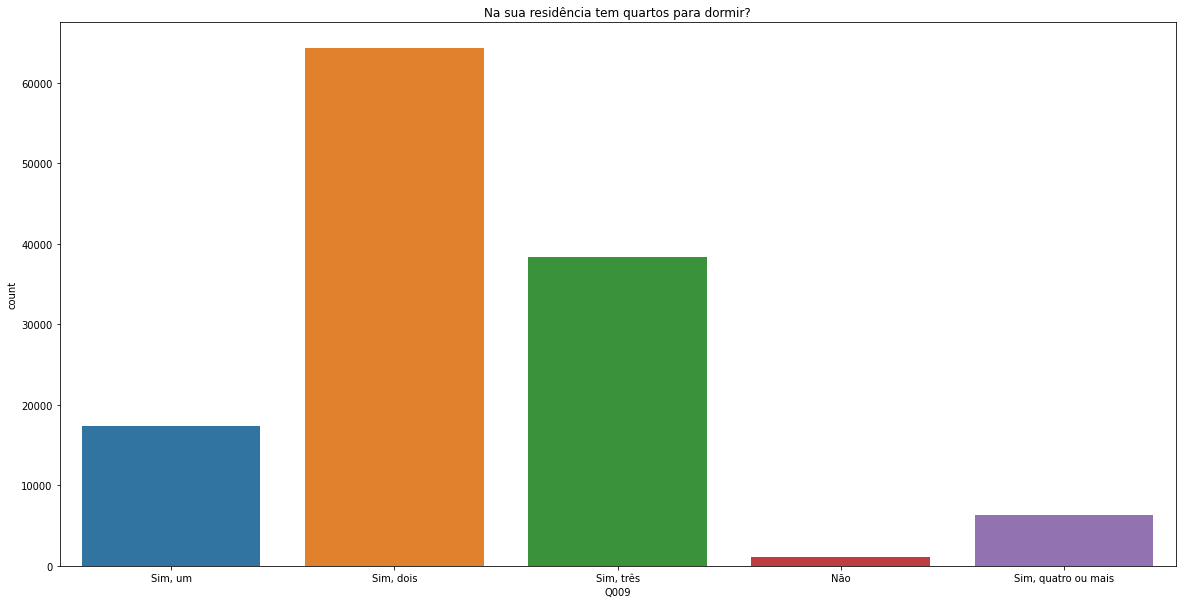

In [174]:
plotQuestao(8)

#### Conclusão
O quarto é um cômodo muito importante de uma habitação. Com ele, há um local de conforto para se dormir, descansar, para ter privacidade. \

A grande observação neste ponto é que 0.84% das residências dos inscritos **não** tem quarto.

### Na sua residência tem carro?

In [175]:
proporcaoQuestao(9)

Na sua residência tem carro?
Não                    56.88 %
Sim, um                 34.4 %
Sim, dois               7.44 %
Sim, três               1.06 %
Sim, quatro ou mais     0.22 %
Name: Q010, dtype: object


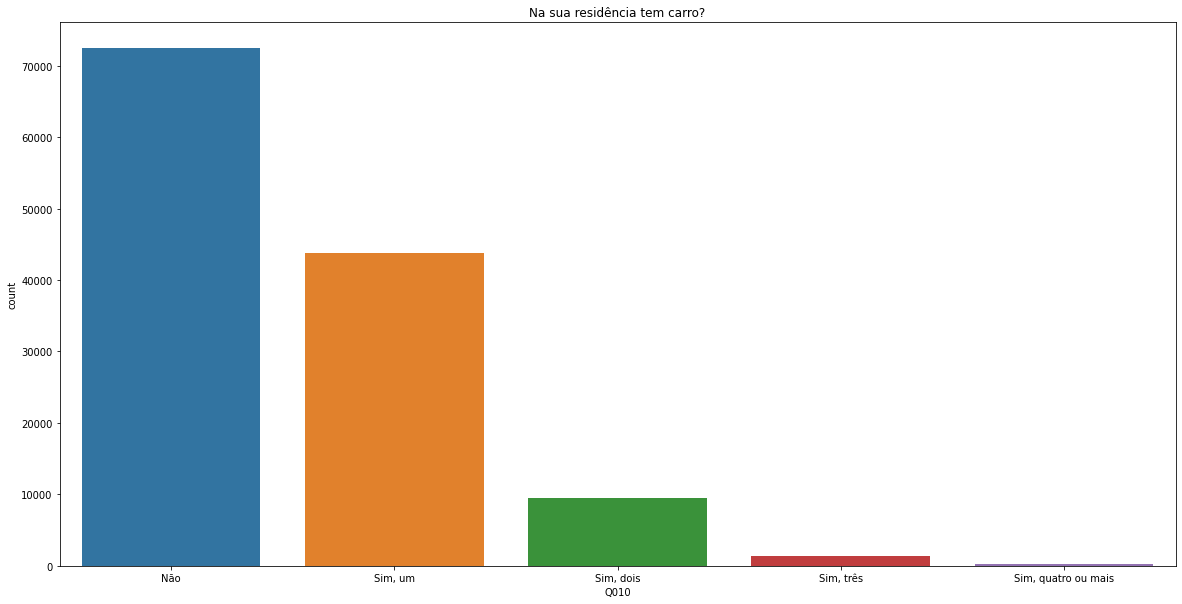

In [176]:
plotQuestao(9)

#### Conclusão
Interessante de se verificar que ~44% das residências dos inscritos tem pelo menos um carro.

### Na sua residência tem motocicleta?

In [177]:
proporcaoQuestao(10)

Na sua residência tem motocicleta?
Não                    77.58 %
Sim, um                20.33 %
Sim, dois               1.88 %
Sim, três               0.18 %
Sim, quatro ou mais     0.03 %
Name: Q011, dtype: object


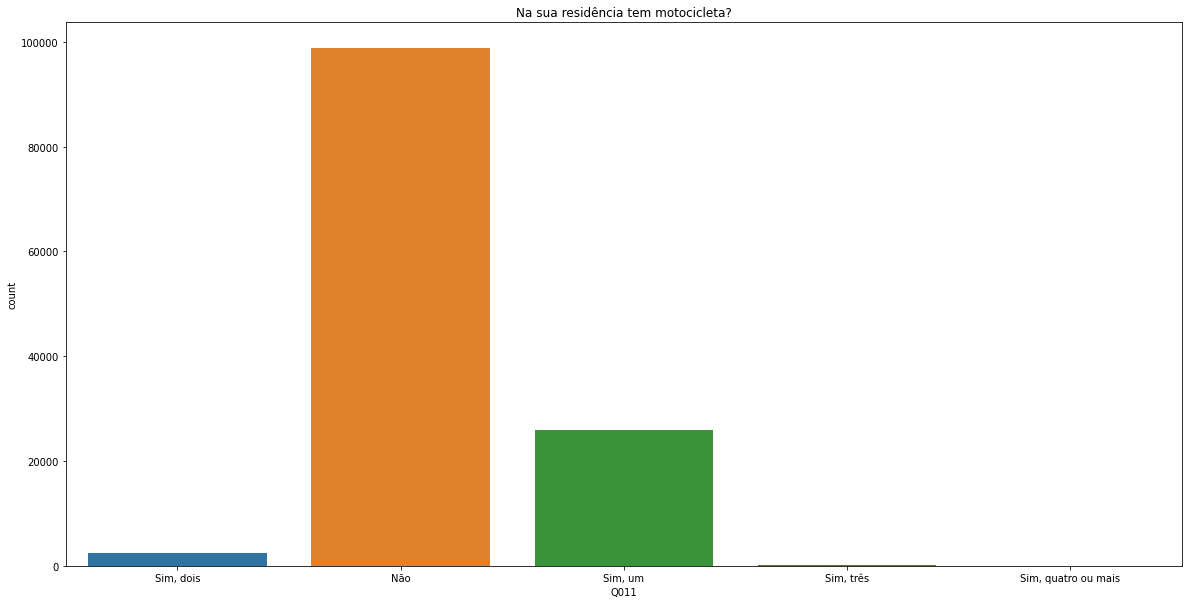

In [178]:
plotQuestao(10)

#### Conclusão
Interessante de se verificar que ~23% das residências dos inscritos tem pelo menos uma moto.

### Na sua residência tem geladeira?

In [179]:
proporcaoQuestao(11)

Na sua residência tem geladeira?
Sim, um                94.1 %
Sim, dois              3.88 %
Não                     1.7 %
Sim, três              0.26 %
Sim, quatro ou mais    0.05 %
Name: Q012, dtype: object


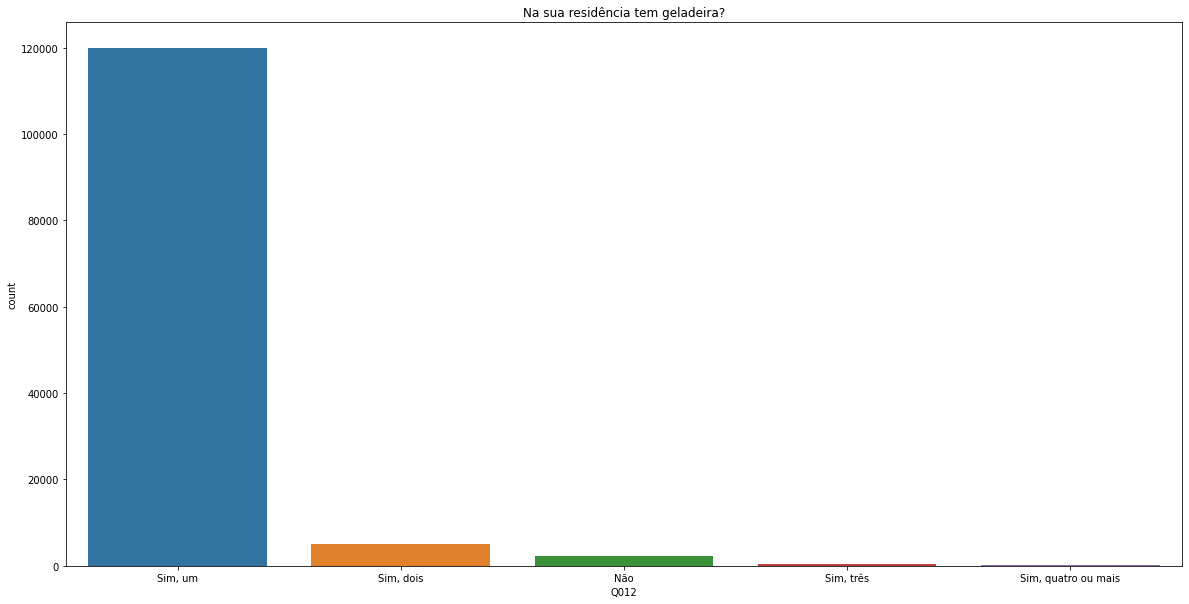

In [180]:
plotQuestao(11)

#### Conclusão
Geladeira é um dos eletrodomésticos mais utilizados e um dos mais mais essenciais de uma cozinha. Com ele, há a possibilidade de conservação de alimentos! \

A grande observação neste ponto é que ~ 1,7% das residências dos inscritos **não** tem geladeira.

E também, que ~ 3,9% das residências dos inscritos tem, não só uma, mas **duas** geladeiras.

Há praticamente o **dobro** de inscritos com duas geladeiras em sua residência que inscritos sem geladeira em sua residência.

### Na sua residência tem televisão em cores?

In [181]:
proporcaoQuestao(18)

Na sua residência tem televisão em cores?
Sim, um                68.96 %
Sim, dois              17.96 %
Sim, três               5.66 %
Não                     4.89 %
Sim, quatro ou mais     2.53 %
Name: Q019, dtype: object


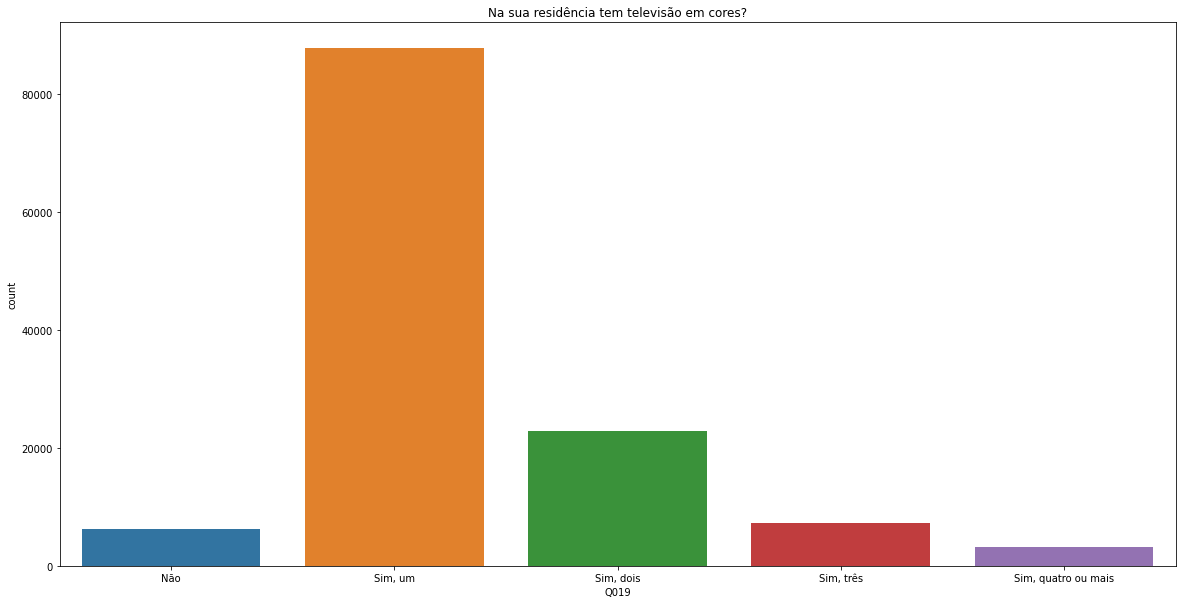

In [182]:
plotQuestao(18)

#### Conclusão
A grande observação neste ponto é que ~4,9% das residências dos inscritos **não** tem televisão em cores.

E que há praticamente **~3,5** vezes mais inscritos com duas televisões em cores do que inscritos sem televisão em cores.

### Na sua residência tem telefone celular?

In [183]:
proporcaoQuestao(21)

Na sua residência tem telefone celular?
Sim, dois              31.23 %
Sim, três              27.29 %
Sim, um                21.36 %
Sim, quatro ou mais    18.04 %
Não                     2.09 %
Name: Q022, dtype: object


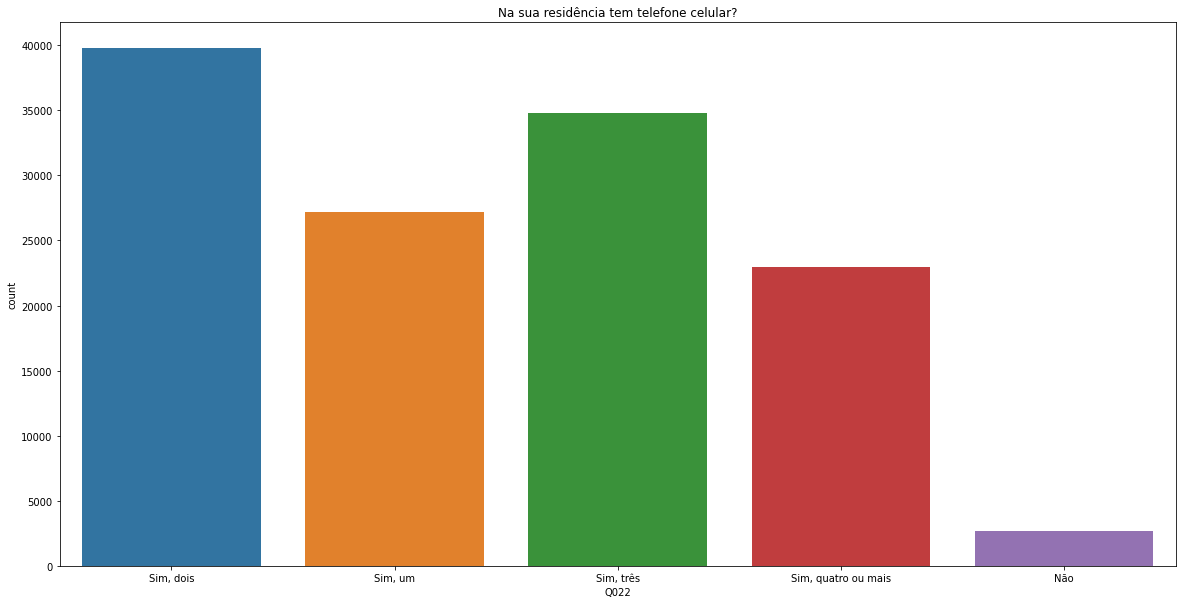

In [184]:
plotQuestao(21)

#### Conclusão
A grande observação neste ponto é que ~2% das residências dos inscritos **não** tem telefone celular.

### Na sua residência tem telefone fixo?

In [185]:
proporcaoQuestao(22)

Na sua residência tem telefone fixo?
Não    76.35 %
Sim    23.65 %
Name: Q023, dtype: object


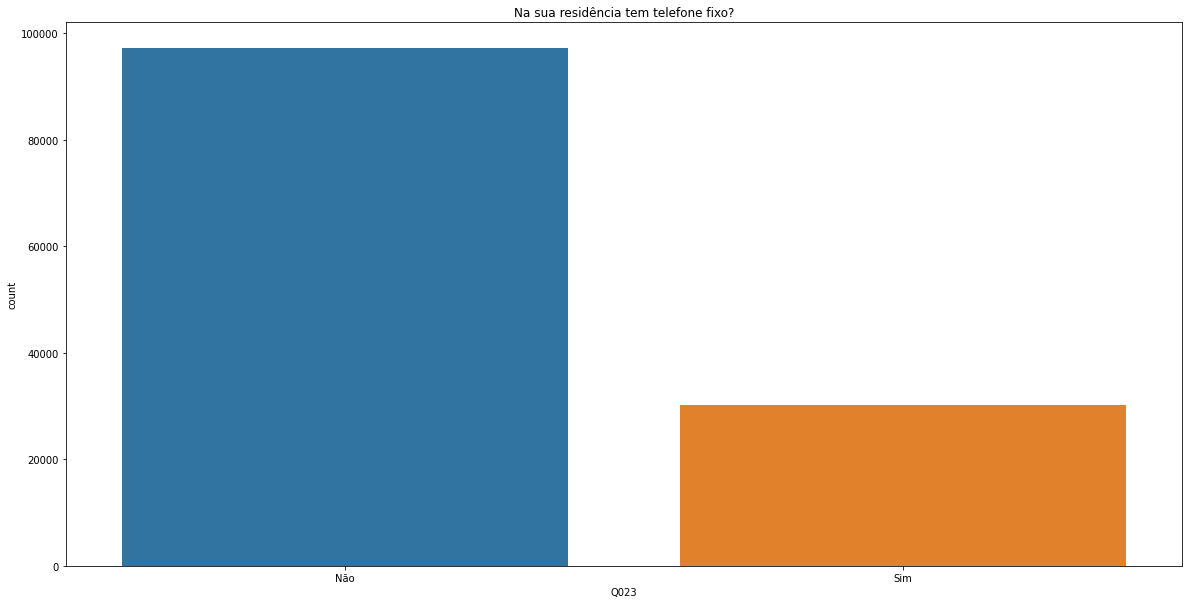

In [186]:
plotQuestao(22)

#### Conclusão
A grande observação neste ponto é que a grande maioria das residências dos inscritos **não** tem telefone fixo. 

### Na sua residência tem computador?

In [187]:
proporcaoQuestao(23)

Na sua residência tem computador?
Não                     46.1 %
Sim, um                43.14 %
Sim, dois               7.54 %
Sim, três               2.25 %
Sim, quatro ou mais     0.97 %
Name: Q024, dtype: object


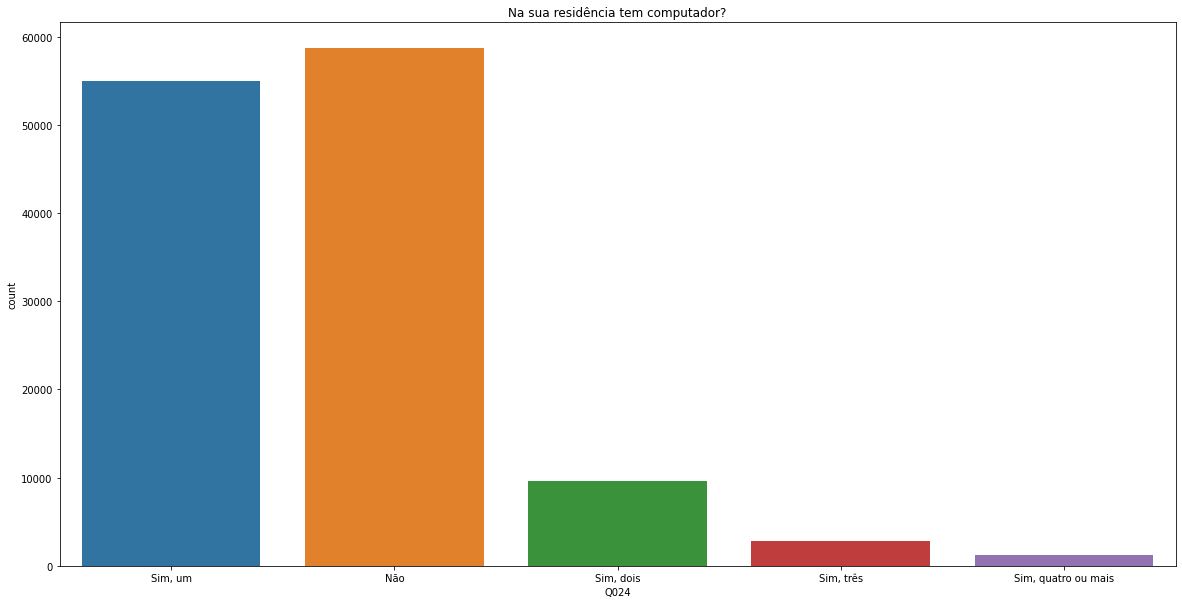

In [188]:
plotQuestao(23)

#### Conclusão
A grande observação neste ponto é que a ~46% das residências dos inscritos **não** tem computador.

### Na sua residência tem acesso à Internet?

In [189]:
proporcaoQuestao(24)

Na sua residência tem acesso à Internet?
Sim    77.56 %
Não    22.44 %
Name: Q025, dtype: object


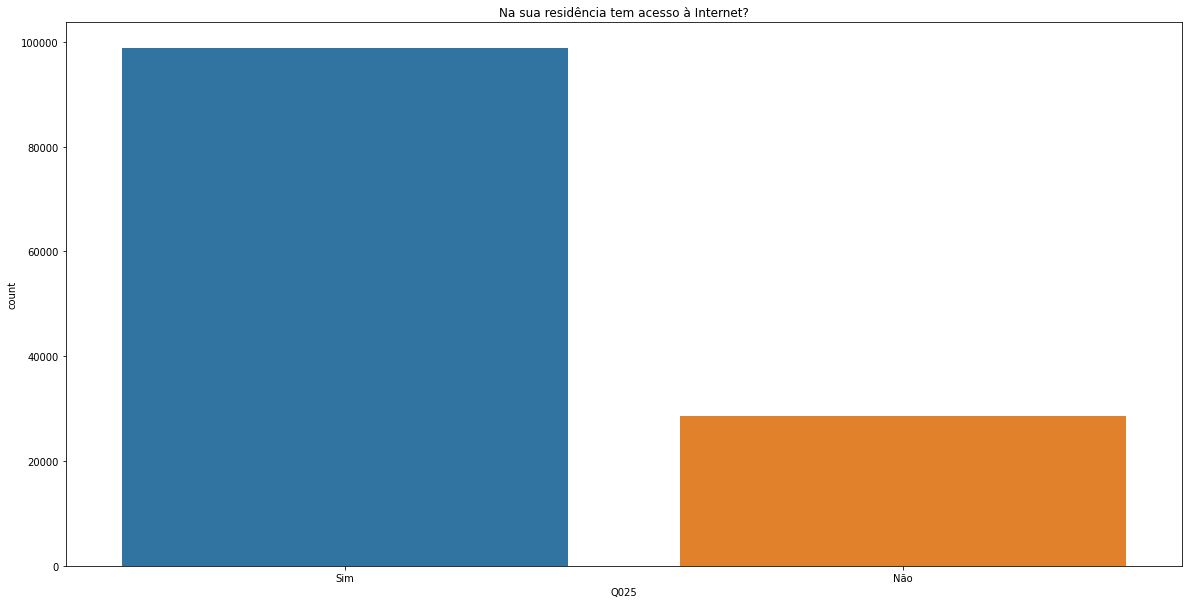

In [190]:
plotQuestao(24)

#### Conclusão
Internet que hoje em dia é um item essencial na vida das pessoas. Ela por si só não serve de muita coisa, mas se unido a um computador ou celular já se torna uma ferramenta extremamente poderosa.

A grande observação neste ponto é que a ~22% das residências dos inscritos **não** tem internet.

---

Considerando a época de Pandemia de 2020, em que todas as escolas pararam as aulas e algumas decidiram continuar com suas atividades por meio da internet.

E que ficaram paradas ou neste novo modelo por mais da metade do ano, pode-se verificar que este efeito e a falta de internet para quase **um quarto** inscritos é bastante preocupante, para as suas avaliações em 2020.

# Comparações e Correlações Gerais

## Idade por Treineiro

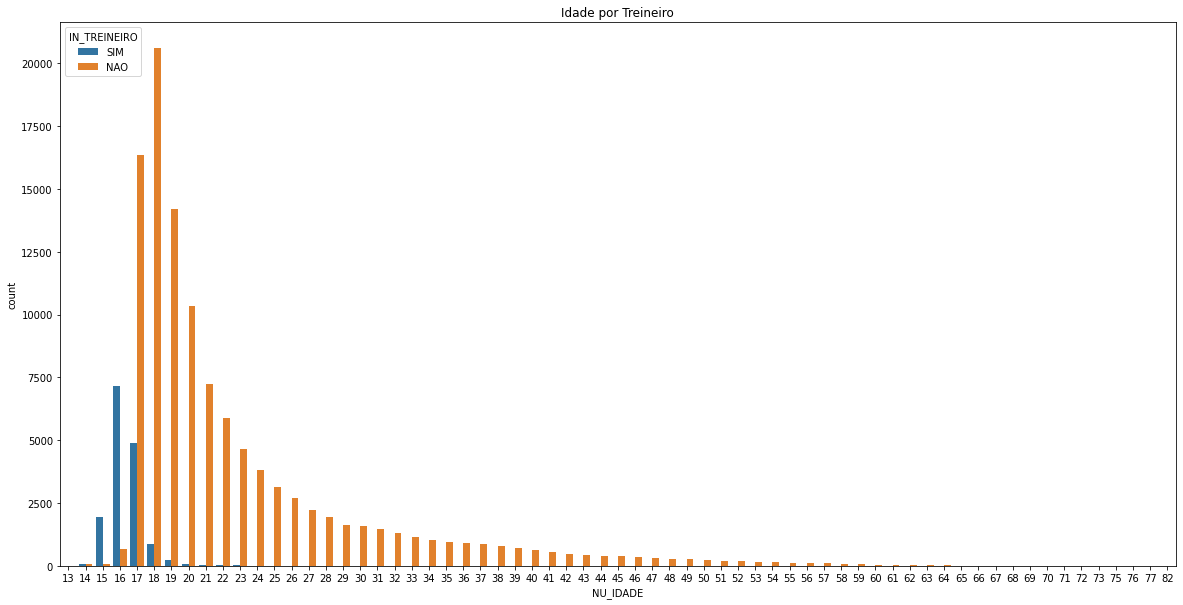

In [191]:
# Gráfico de Idade por Treineiro
sns.countplot(data = dados.replace({TREINEIRO: mapeamentoTreineiro}), x = IDADE, hue = TREINEIRO).set_title('Idade por Treineiro');

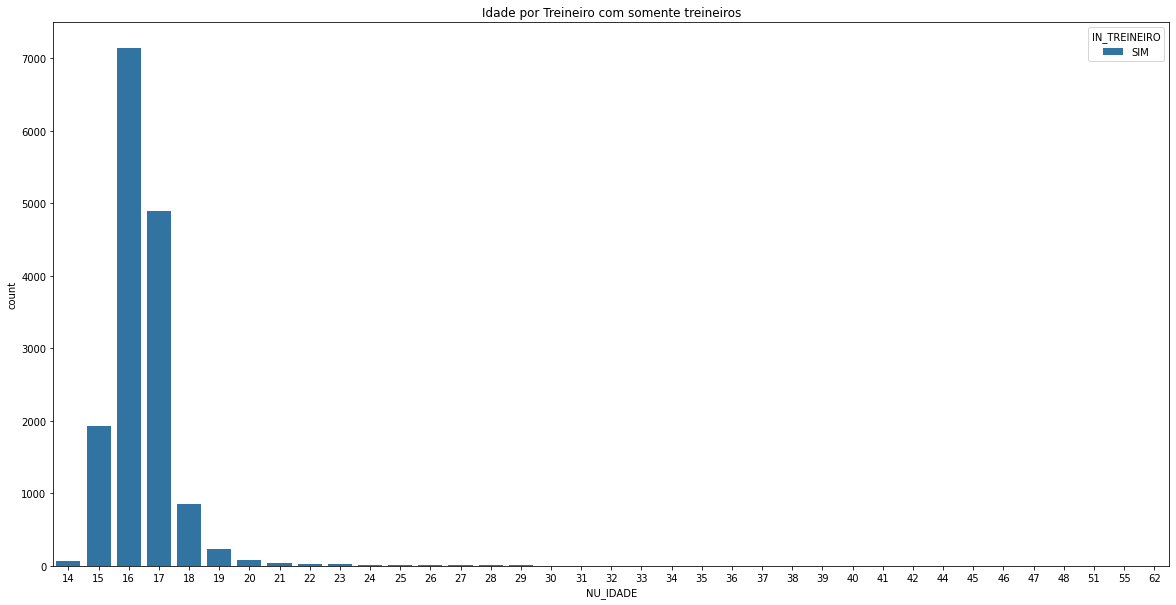

In [192]:
# Gráfico de Idade por Treineiro com somente treineiros
sns.countplot(data = dados.replace({TREINEIRO: mapeamentoTreineiro})[dados[TREINEIRO] == 1], x = IDADE, hue = TREINEIRO).set_title('Idade por Treineiro com somente treineiros');

### Conclusão
Pode-se verificar que são consderados treineiros os inscritos mais jovens, onde suas idades, em maioria, correspondem a faixa de idade de antes do 3º ano do ensino médio. \

Portanto, são corretamente considerados treineiros por não estarem concluindo o ensino médio no mesmo ano da prova. \

Os inscritos com idades maiores, considerados treineiros, possivelmente estão marcados como sem conclusão do ensino médio.

## Idade por Conclusão do Ensino Médio

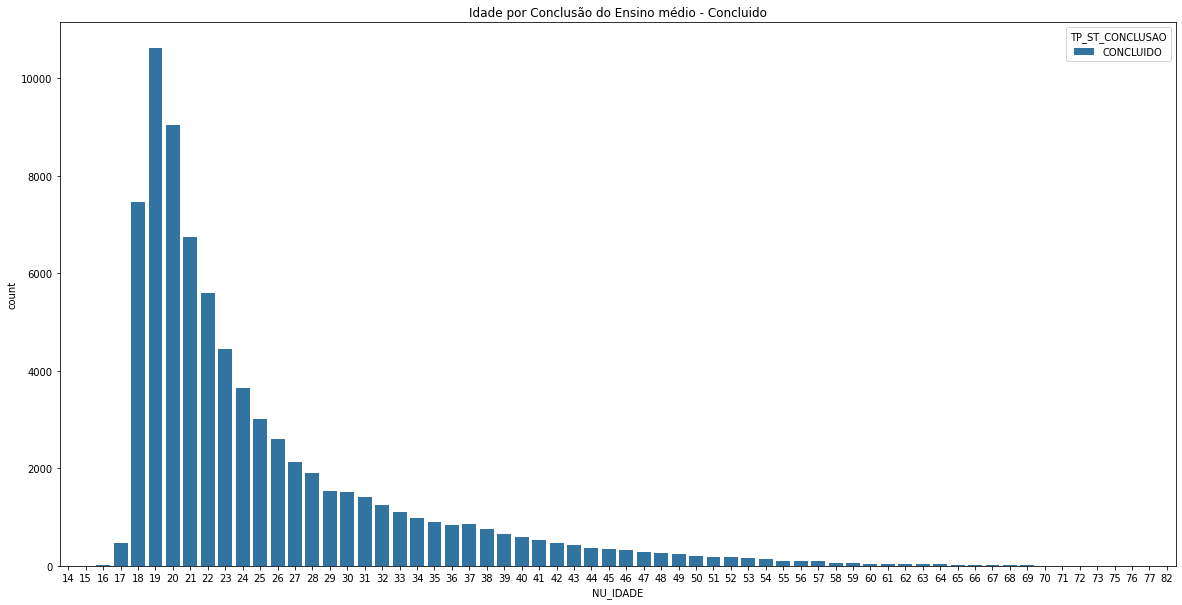

In [193]:
# Gráfico de Idade por Conclusão do Ensino médio - Concluido
sns.countplot(data = dados[dados[SITUACAO_ENSINO_MEDIO] == 1].replace({SITUACAO_ENSINO_MEDIO: mapeamentoSituacaoEnsinoMedio}), x = IDADE, hue = SITUACAO_ENSINO_MEDIO).set_title('Idade por Conclusão do Ensino médio - Concluido');

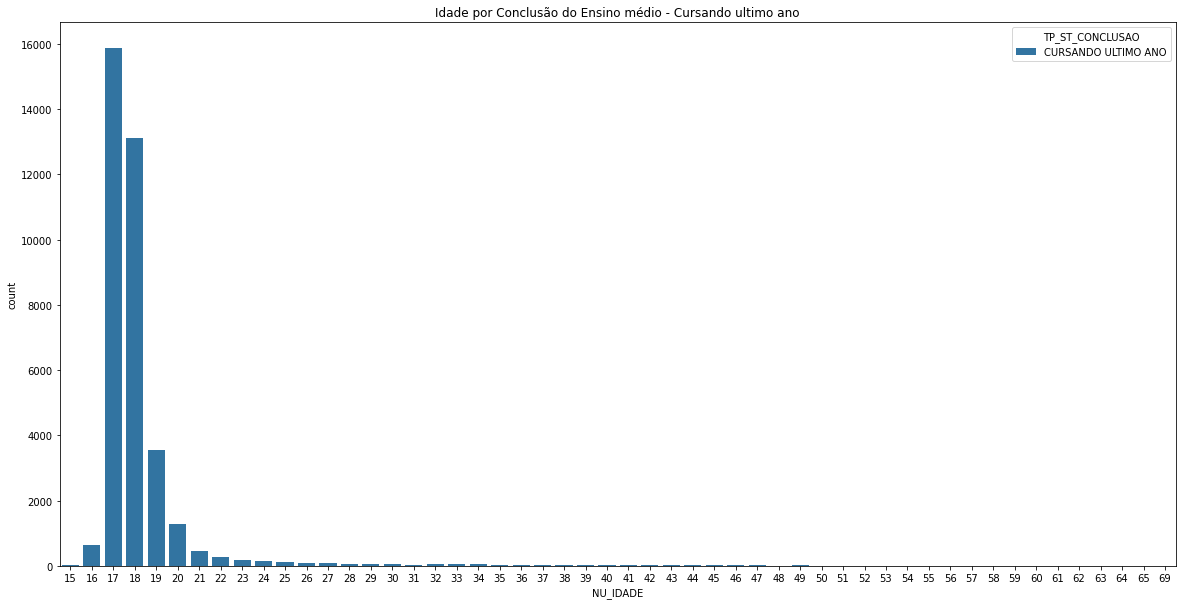

In [194]:
# Gráfico de Idade por Conclusão do Ensino médio - Cursando ultimo ano
sns.countplot(data = dados[dados[SITUACAO_ENSINO_MEDIO] == 2].replace({SITUACAO_ENSINO_MEDIO: mapeamentoSituacaoEnsinoMedio}), x = IDADE, hue = SITUACAO_ENSINO_MEDIO).set_title('Idade por Conclusão do Ensino médio - Cursando ultimo ano');

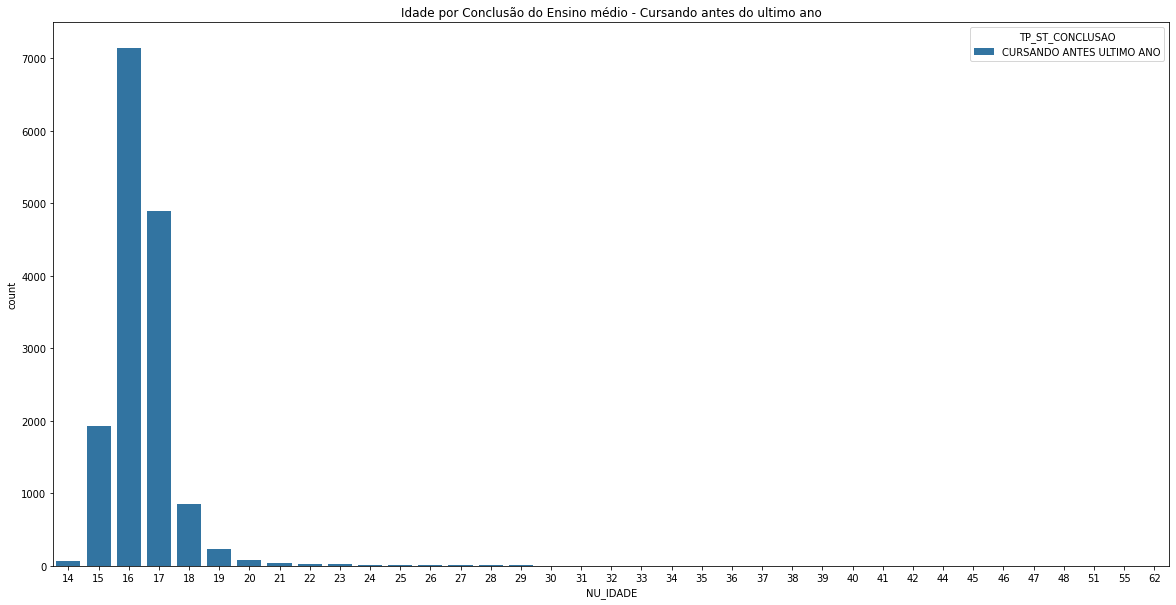

In [195]:
# Gráfico de Idade por Conclusão do Ensino médio - Cursando antes do ultimo ano
sns.countplot(data = dados[dados[SITUACAO_ENSINO_MEDIO] == 3].replace({SITUACAO_ENSINO_MEDIO: mapeamentoSituacaoEnsinoMedio}), x = IDADE, hue = SITUACAO_ENSINO_MEDIO).set_title('Idade por Conclusão do Ensino médio - Cursando antes do ultimo ano');

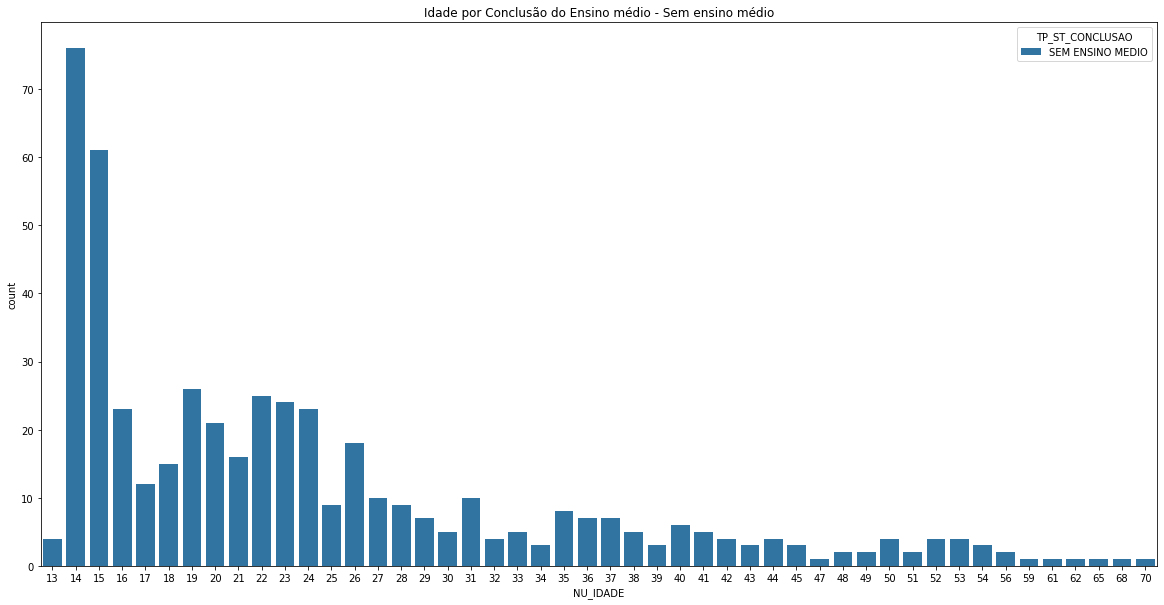

In [196]:
# Gráfico de Idade por Conclusão do Ensino médio - Sem ensino médio
sns.countplot(data = dados[dados[SITUACAO_ENSINO_MEDIO] == 4].replace({SITUACAO_ENSINO_MEDIO: mapeamentoSituacaoEnsinoMedio}), x = IDADE, hue = SITUACAO_ENSINO_MEDIO).set_title('Idade por Conclusão do Ensino médio - Sem ensino médio');

### Conclusão
Podemos observar que há uma grande dispersão de idade dos inscritos que já concluiram o ensino médio. \

---

Inscritos que estão cursando, o ultimo ano ou antes, são majoritariamente mais jovens.

---

Inscritos que não concluiram o ensino médio, estão relativamente bem distribuidos em todas as faixas de idade. \
Atenção à escala se comparado com os outros tipos de conclusão. Neste caso a quantidade é bem inferior, mas ainda sim relevante. \
Outro ponto interessante, é que há uma boa concentração nas idades de 14 e 15 anos, mas pode ser devido ao fato de que estes podem não ter entrado ainda no ensino médio.

## Pirâmide etária dos inscritos por região

In [197]:
# Mapeando estados por região
mapeamentoEstadosRegiao = { 
    'AM': 'Norte', 'RR': 'Norte', 'AP': 'Norte', 'PA': 'Norte', 'TO': 'Norte', 'RO': 'Norte', 'AC': 'Norte',
    'MA': 'Nordeste', 'PI': 'Nordeste', 'CE': 'Nordeste', 'RN': 'Nordeste', 'PE': 'Nordeste', 'PB': 'Nordeste', 'SE': 'Nordeste', 'AL': 'Nordeste', 'BA': 'Nordeste',
    'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'GO': 'Centro-Oeste',
    'SP': 'Sudeste', 'RJ': 'Sudeste', 'ES': 'Sudeste', 'MG': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul'
    }
ordemRegiao = ['Norte', 'Nordeste', 'Centro-Oeste', 'DF', 'Sudeste', 'Sul'];

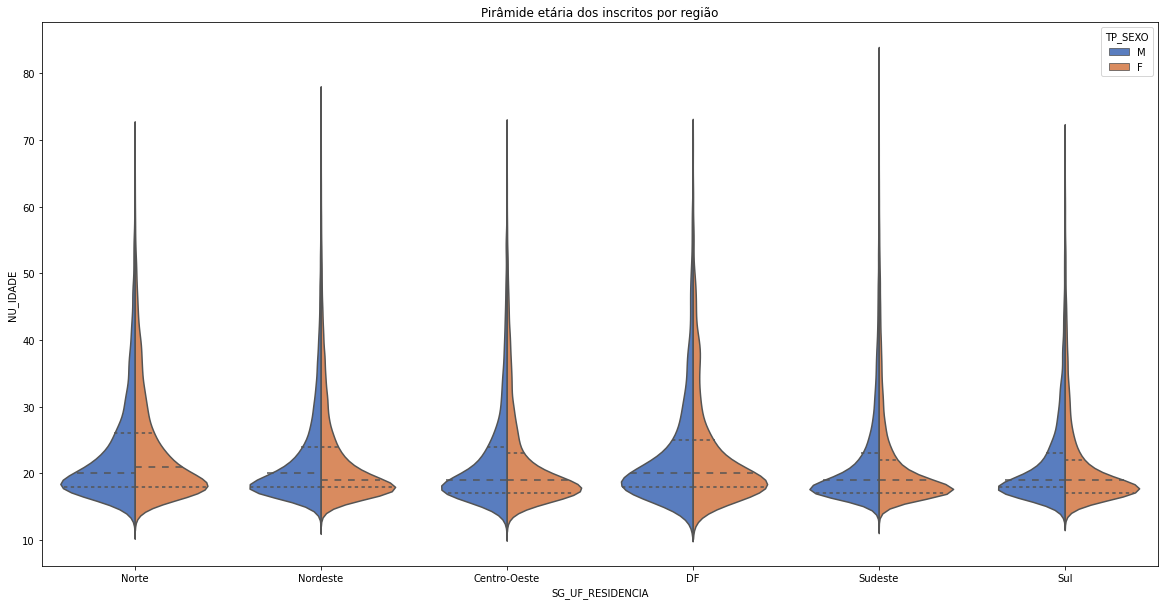

In [198]:
# Pirâmide etária dos inscritos
sns.violinplot(data = dados.replace({RESIDENCIA: mapeamentoEstadosRegiao}), x = RESIDENCIA, y = IDADE, hue = SEXO, palette='muted', split=True, inner = 'quartiles', order = ordemRegiao).set_title('Pirâmide etária dos inscritos por região');
# As linhas são as marcações dos quartis.

### Conclusão
As distribuições das idades são bem parecidadas, porém podemos observar os seguintes pontos:
* A distribuição das idades se assemelham à pirâmide etária do censo de 2010, ao menos para os mais jovens, que são a grande maioria dos inscritos.
Fonte: [IBGE](https://censo2010.ibge.gov.br/sinopse/index.php?dados=12).
* De acordo com o censo, a região do nordeste é a quem mais proporcionalmente, pessoas nas idades mais novas, principalmente de 10 a 14 anos, se comparado com as outras regiões. Porém, aqui, não podemos observar este efeito. Pode ser devido ao fato desta faixa de idade ser muito nova para estar participando das provas. Fonte: [IBGE](https://censo2010.ibge.gov.br/sinopse/webservice/frm_piramide.php?codigo=2&corhomem=3d4590&cormulher=9cdbfc).
* Podemos observar que a distribuição entre Masculino e Feminino se mantém bem parecida entre todas as regiões.
* Nas regiões Centro-Oeste, Sudeste e Sul, há uma concentração maior de inscritos do sexo feminino nas idades entre 18 e 20 se comparado ao sexo masculino.
* Os inscritos mais velhos são das regiões do Sudeste e Nordeste.

## Treineiro por Renda

In [199]:
# Constantes
ordemRenda = [ 'Nenhuma renda', 'Até R$ 998,00', 'Até R$ 1.497,00', 'Até R$ 1.996,00', 'Até R$ 2.495,00', 'Até R$ 2.994,00', 'Até R$ 3.992,00', 'Até R$ 4.990,00', 
              'Até R$ 5.988,00', 'Até R$ 6.986,00', 'Até R$ 7.984,00', 'Até R$ 8.982,00', 'Até R$ 9.980,00', 'Até R$ 11.976,00', 'Até R$ 14.970,00', 'Até R$ 19.960,00', 
              'Maior que R$ 19.960,00' ];

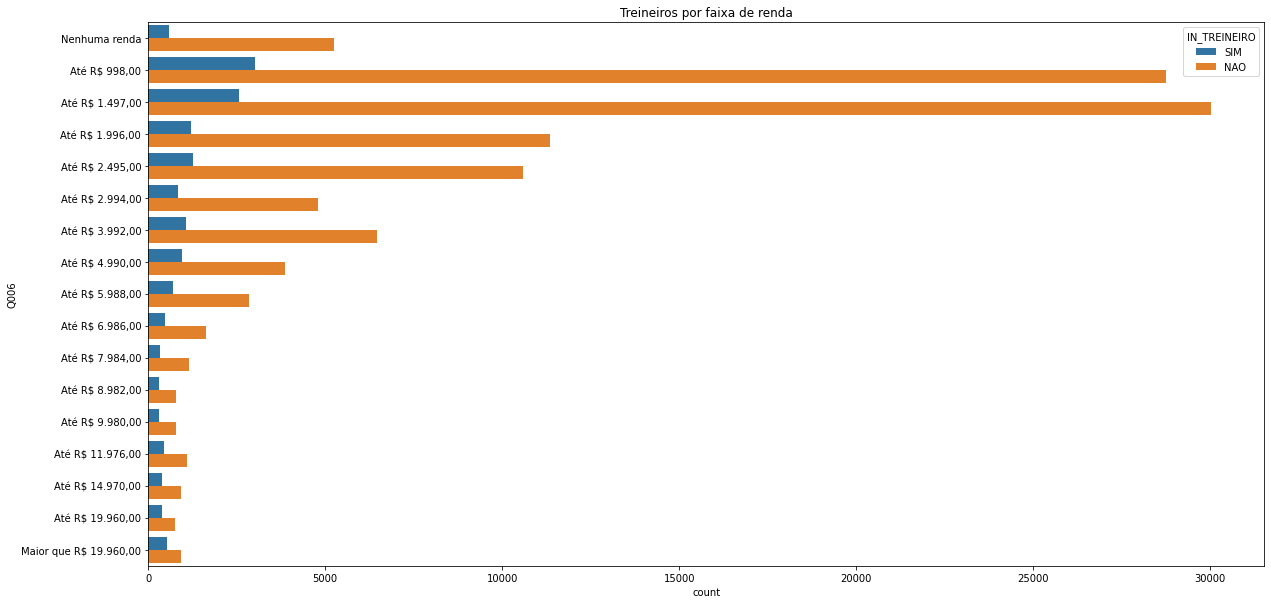

In [200]:
# Distribuição de treineiros por faixa de renda
sns.countplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}).replace({TREINEIRO: mapeamentoTreineiro}), y = RENDA, hue = TREINEIRO, order = ordemRenda).set_title('Treineiros por faixa de renda');

### Conclusão
Podemos observar que a distribuição de treineiros por faixa de renda, segue praticamente a mesma distribuição de não treineiros, mas em uma proporção bem menor.

## Treineiro por Sexo

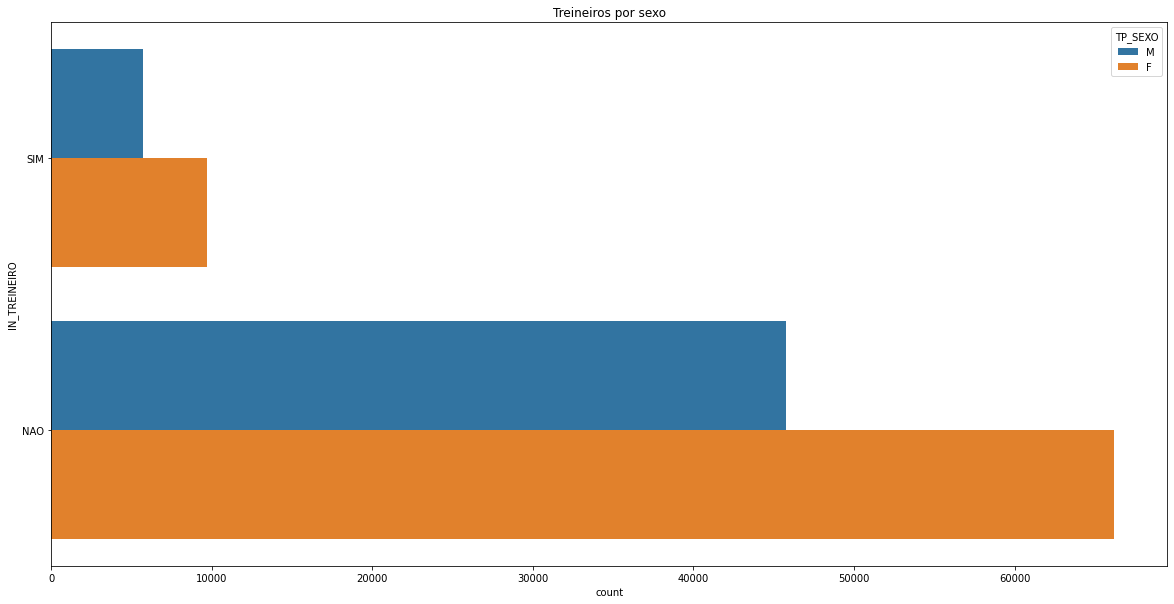

In [201]:
# Distribuição de treineiros por sexo
sns.countplot(data = dados.replace({TREINEIRO: mapeamentoTreineiro}), y = TREINEIRO, hue = SEXO).set_title('Treineiros por sexo');

### Conclusão
Podemos observar que a distribuição de treineiros por sexo, segue praticamente a mesma distribuição de não treineiros, mas em uma proporção bem menor.

## Internet por Renda

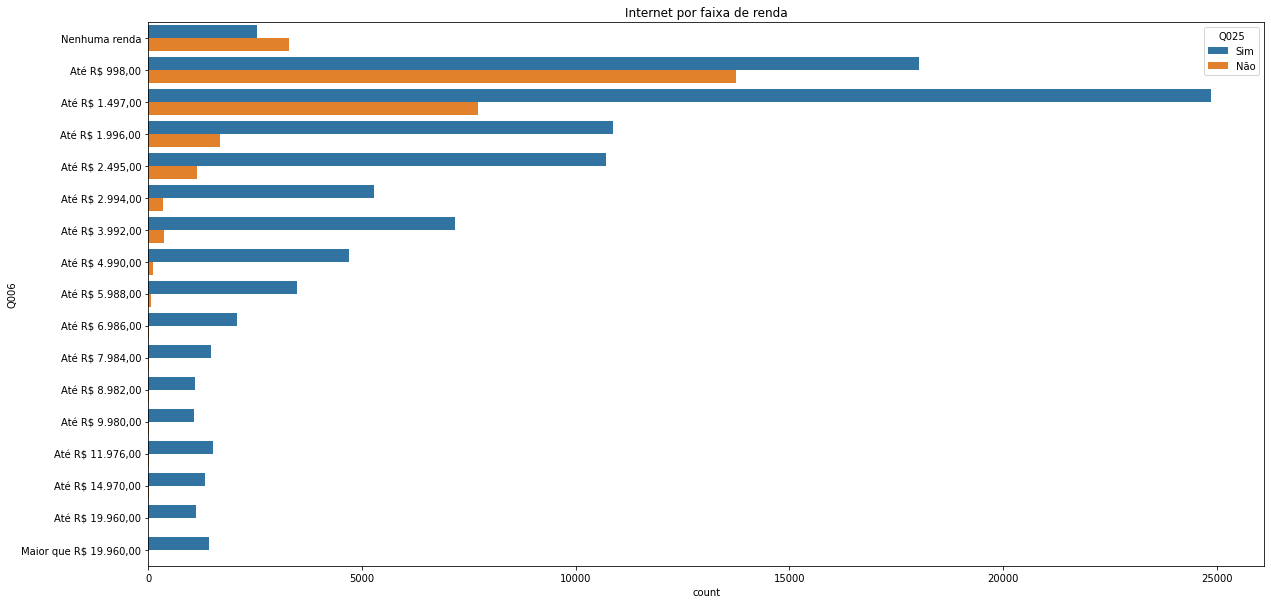

In [202]:
# Distribuição de internet por faixa de renda
sns.countplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}).replace({INTERNET: mapeamentoSocioEconomicas[24]}), y = RENDA, hue = INTERNET, order = ordemRenda).set_title('Internet por faixa de renda');

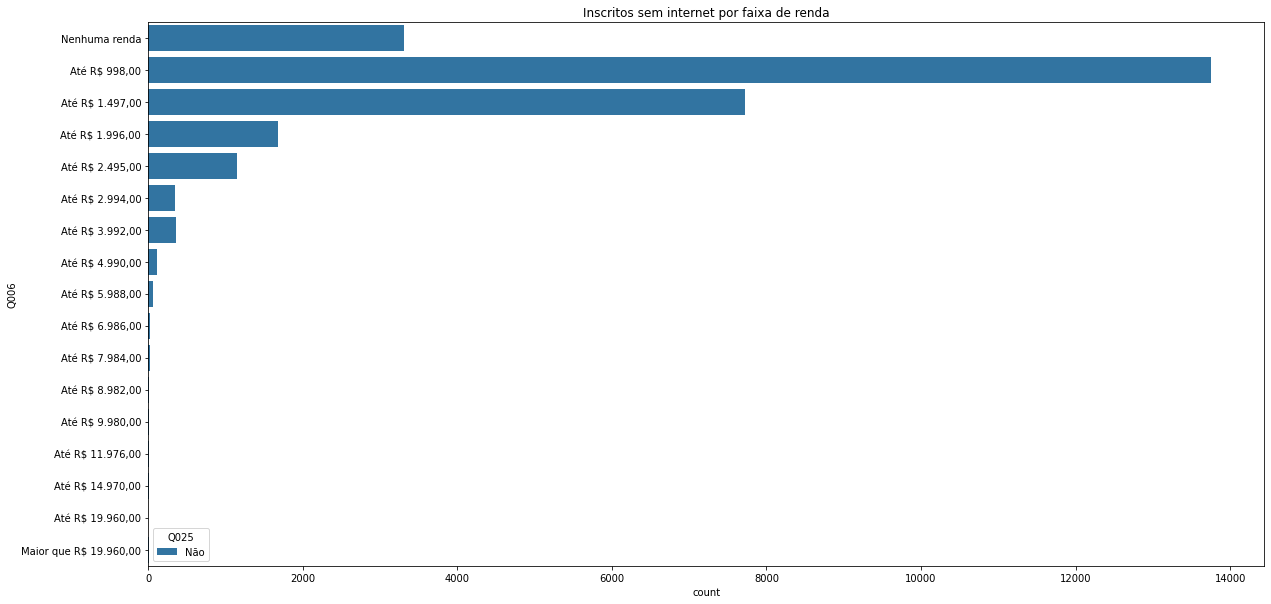

In [203]:
# Distribuição de internet por faixa de renda sem internet
sns.countplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}).replace({INTERNET: mapeamentoSocioEconomicas[24]})[dados[INTERNET] == 'A'], y = RENDA, hue = INTERNET, order = ordemRenda).set_title('Inscritos sem internet por faixa de renda');

#### Conclusão
Podemos observar a maior parte dos inscritos que se declararam sem internet, são das rendas mais baixas. \
* Poucos com renda 'média' se declararam sem internet.
* Pouquíssimos com renda 'alta' se declararam sem internet.



## Raça por Tipo Escola

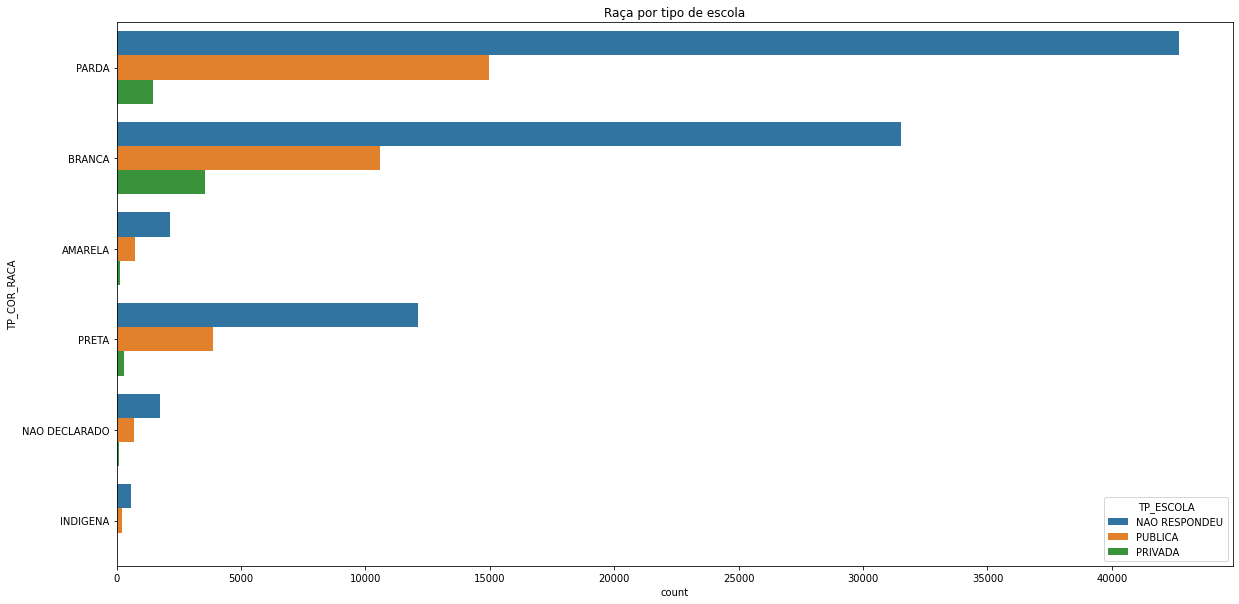

In [204]:
# Distribuição de raça por tipo de escola
sns.countplot(data = dados.replace({RACA: mapeamentoRaca}).replace({TIPO_ESCOLA: mapeamentoTipoEscola}), y = RACA, hue = TIPO_ESCOLA).set_title('Raça por tipo de escola');

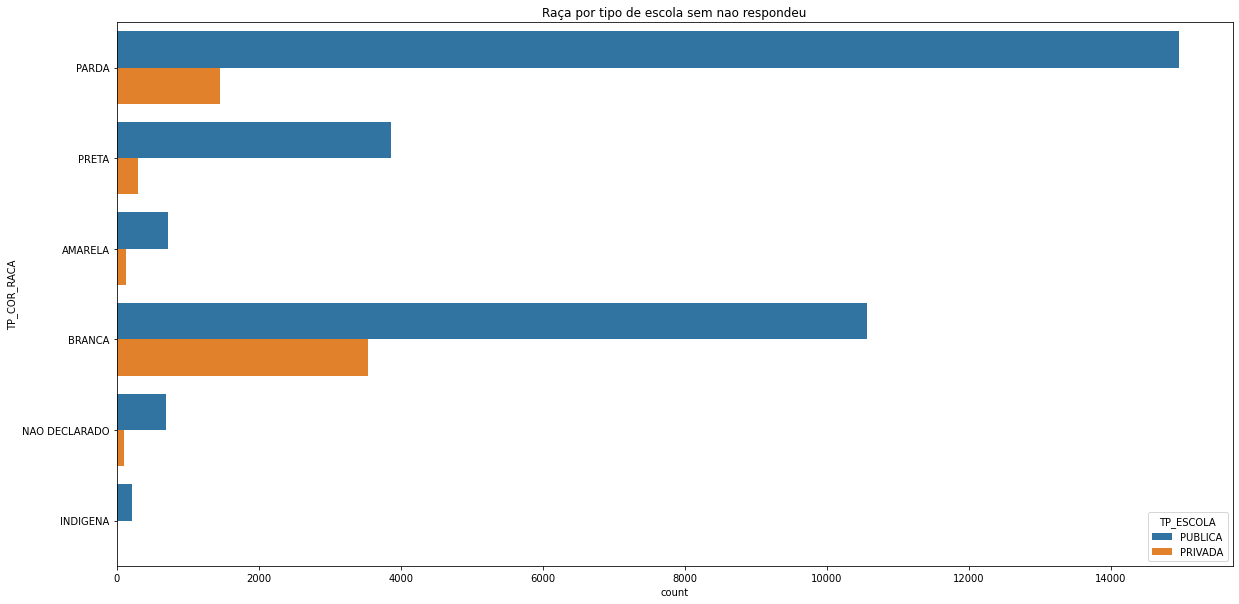

In [205]:
# Distribuição de raça por tipo de escola sem nao respondeu
sns.countplot(data = dados[dados[TIPO_ESCOLA] != 1].replace({RACA: mapeamentoRaca}).replace({TIPO_ESCOLA: mapeamentoTipoEscola}), y = RACA, hue = TIPO_ESCOLA).set_title('Raça por tipo de escola sem nao respondeu');

### Conclusão
Podemos observar que:
* Existe, consideravelmente, mais inscritos brancos nas escolas privadas do que de outras raças em escolas privadas.
* É praticamente inexistente a quantidade de inscritos indígenas em escolas privadas.

## Internet por Computador

In [206]:
# Constantes
ordemComputador = [ 'Não', 'Sim, um', 'Sim, dois', 'Sim, três', 'Sim, quatro ou mais' ]

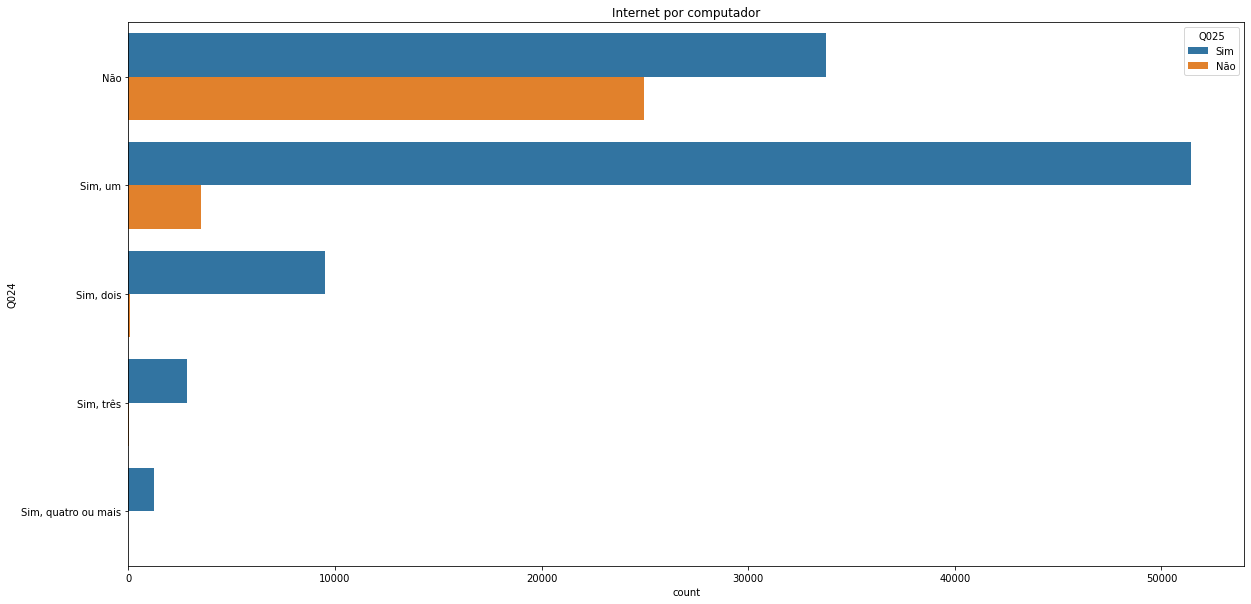

In [207]:
# Distribuição de internet por computador
sns.countplot(data = dados.replace({INTERNET: mapeamentoSocioEconomicas[24]}).replace({COMPUTADOR: mapeamentoSocioEconomicas[23]}), y = COMPUTADOR, hue = INTERNET, order = ordemComputador).set_title('Internet por computador');

### Conclusão
Podemos verificar que os inscritos que tem ao menos um computador, em geral, tem internet. \
Porém, há muitos que até tem computador, mas não tem internet. \
Muitos não tem ambos. \
E muitos tem ao menos internet.

## Internet por Celular

In [208]:
# Constantes
ordemCelular = [ 'Não', 'Sim, um', 'Sim, dois', 'Sim, três', 'Sim, quatro ou mais' ]

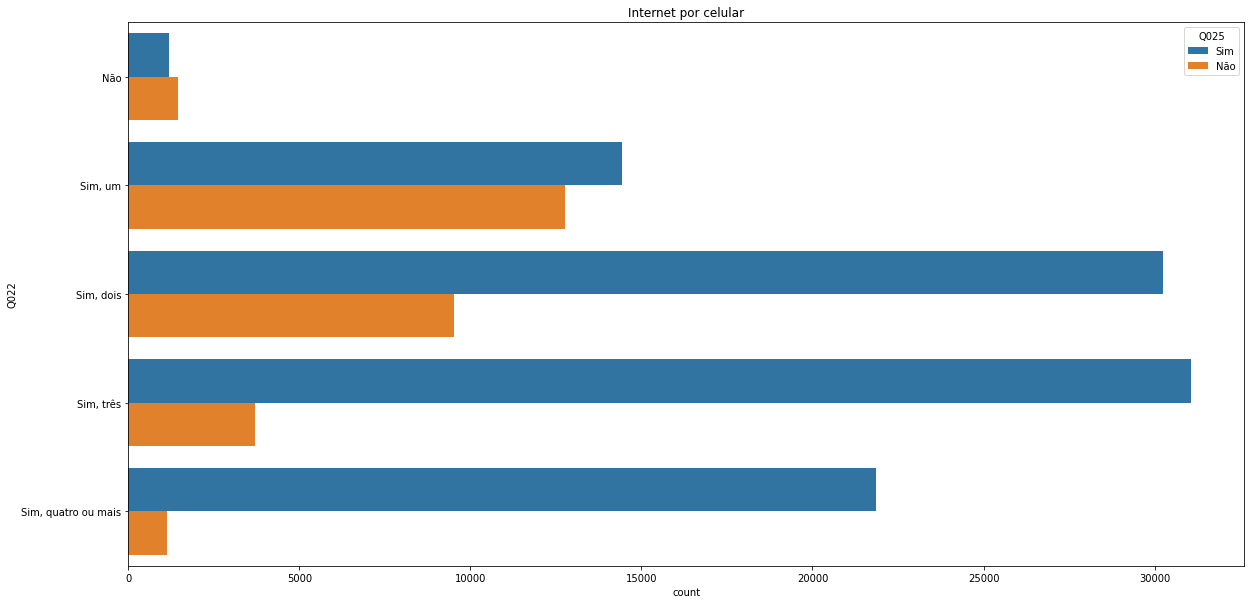

In [209]:
# Distribuição de internet por celular
sns.countplot(data = dados.replace({INTERNET: mapeamentoSocioEconomicas[24]}).replace({CELULAR: mapeamentoSocioEconomicas[21]}), y = CELULAR, hue = INTERNET, order = ordemCelular).set_title('Internet por celular');

### Conclusão
Podemos verificar que boa parte dos inscritos que tem ao menos um celular, em geral, tem internet. \
Porém, alguns tem mais de um celular, mas não tem internet.

## Computador por Renda

In [210]:
# Constantes
mapeamentoComputador = { 'A': 'Não', 'B': 'Sim', 'C': 'Sim', 'D': 'Sim', 'E': 'Sim' }
mapeamentoComputadorMuitos = { 'A': 'Não', 'B': 'Sim', 'C': 'Muitos', 'D': 'Muitos', 'E': 'Muitos' }

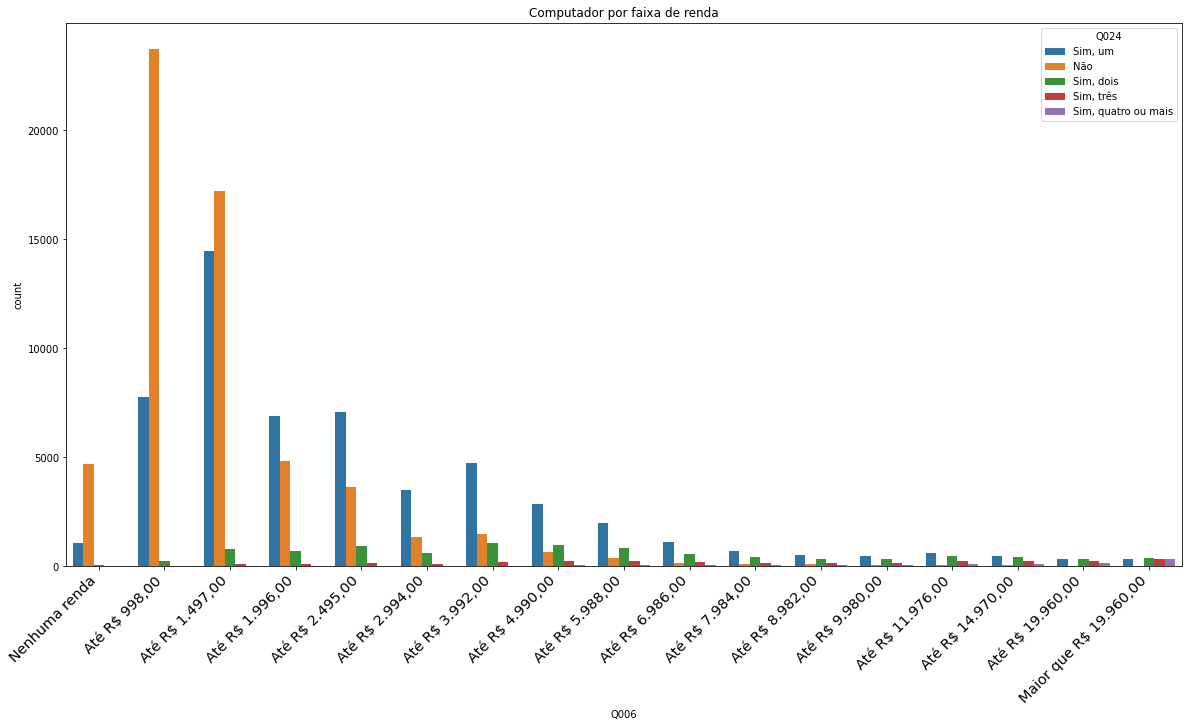

In [211]:
# Distribuição de computador por faixa de renda
sns.countplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}).replace({COMPUTADOR: mapeamentoSocioEconomicas[23]}), x = RENDA, hue = COMPUTADOR, order = ordemRenda).set_title('Computador por faixa de renda');
rotateLabels()

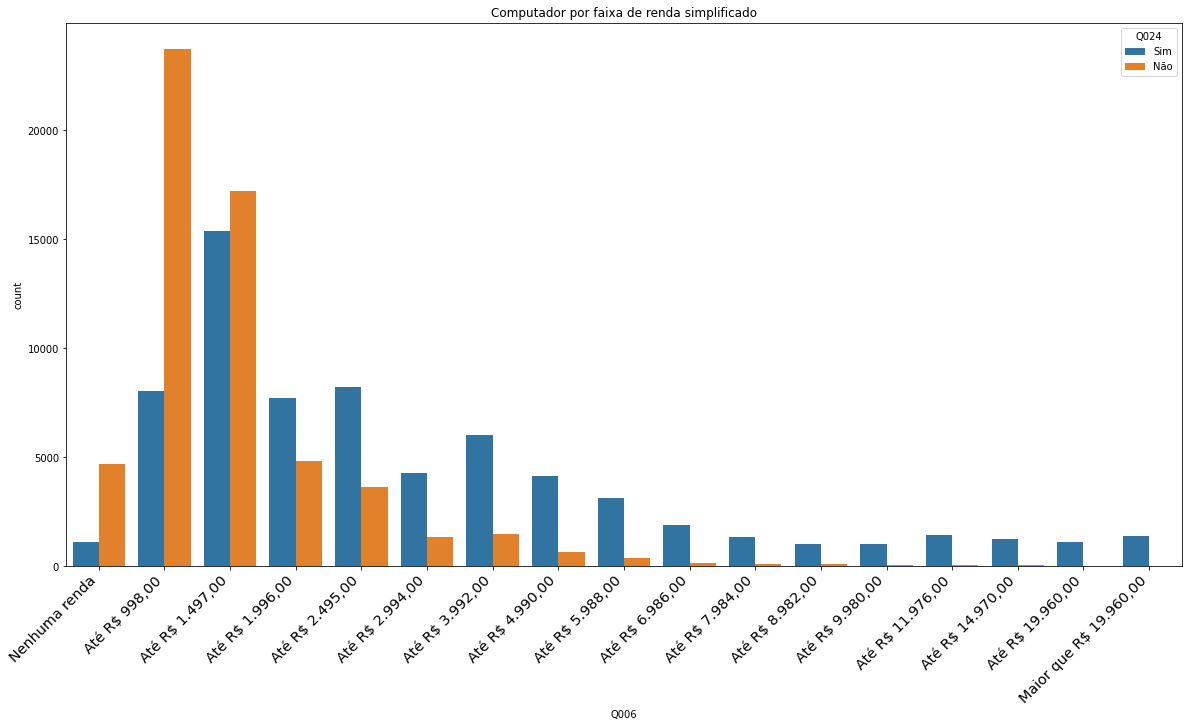

In [212]:
# Distribuição de computador por faixa de renda simplificado
sns.countplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}).replace({COMPUTADOR: mapeamentoComputador}), x = RENDA, hue = COMPUTADOR, order = ordemRenda).set_title('Computador por faixa de renda simplificado');
rotateLabels()

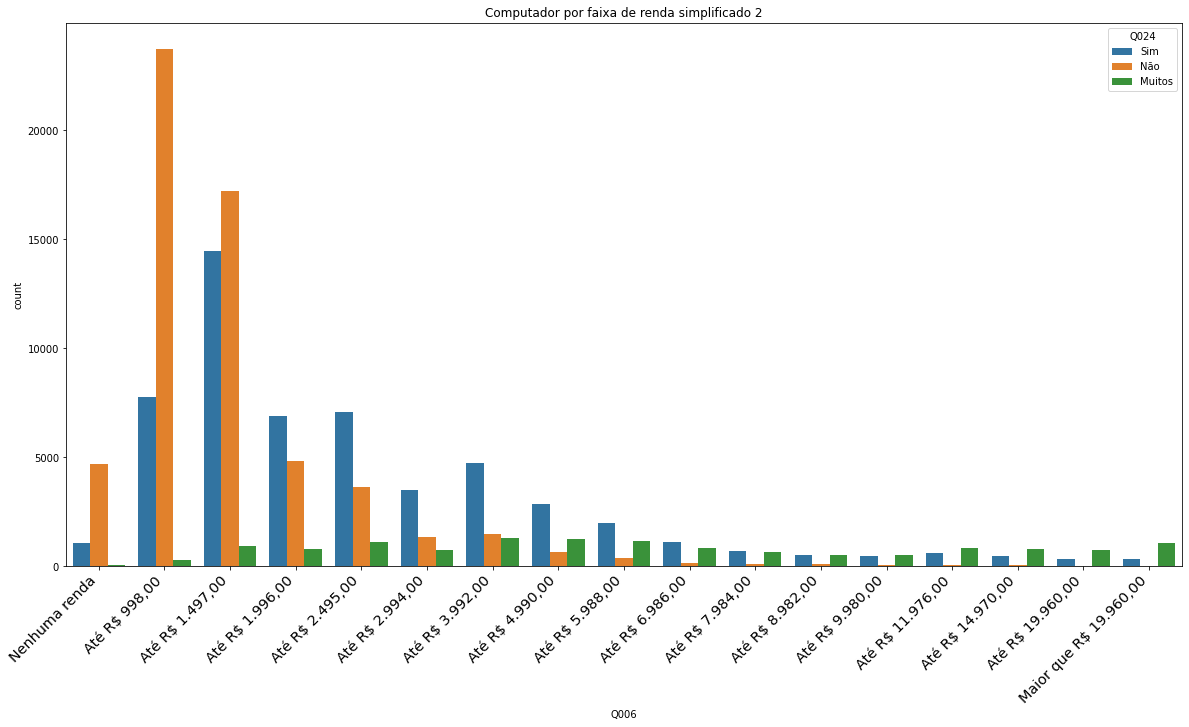

In [213]:
# Distribuição de computador por faixa de renda simplificado 2
sns.countplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}).replace({COMPUTADOR: mapeamentoComputadorMuitos}), x = RENDA, hue = COMPUTADOR, order = ordemRenda).set_title('Computador por faixa de renda simplificado 2');
rotateLabels()

#### Conclusão
Podemos observar a maior parte dos inscritos que não tem computador, são das rendas mais baixas. \
* Poucos com renda 'média'/'alta' se declararam sem computador.
* Há, de certa forma, uma constante entre as rendas, de inscritos com mais de um computador.
* Somente nas rendas mais altas que se tem 4 ou mais computadores.



## Transporte pessoal por Presença

In [214]:
def calculatePresenca(row):
  if (row['TP_PRESENCA_CH'] == 0) & (row['TP_PRESENCA_MT'] == 0):
    return 'AUSENTE'
  elif (row['TP_PRESENCA_CH'] == 1) & (row['TP_PRESENCA_MT'] == 1):
    return 'PRESENTE'
  else:
    return 'UM DIA'

def calculateTransporte(row):
  if (row[CARRO] == 'A') & (row[MOTO] == 'A'):
    return 'NAO'
  else:
    return 'SIM'

In [215]:
# Ajustes no dataset
dados[PRESENTE] = dados.apply(lambda row: calculatePresenca(row), axis=1)
dados[TRANSPORTE] = dados.apply(lambda row: calculateTransporte(row), axis=1)

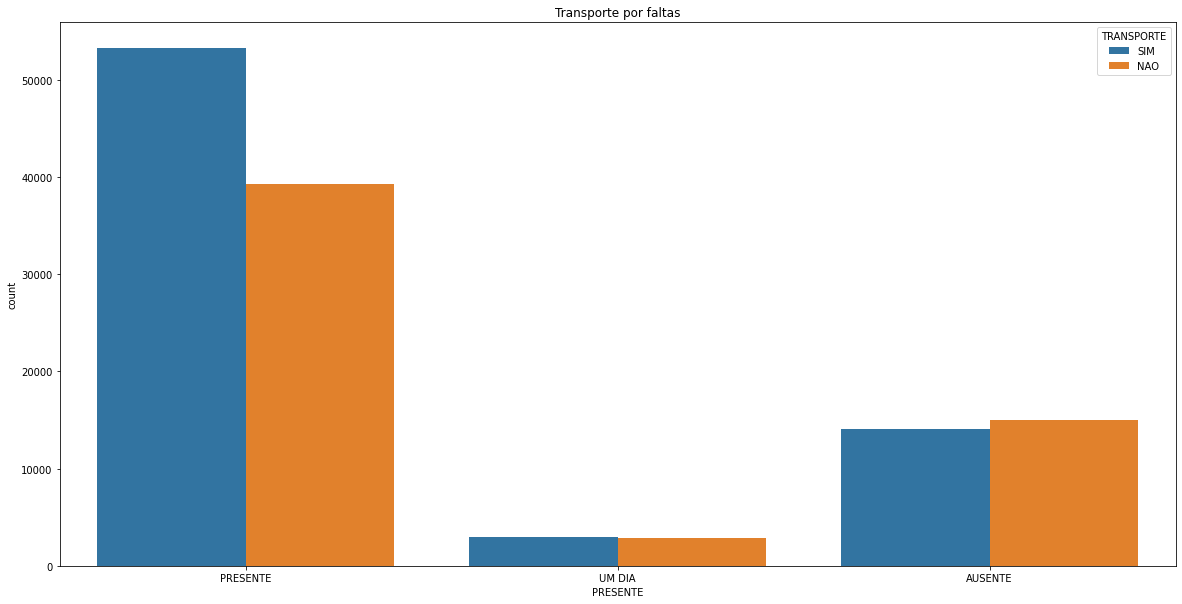

In [216]:
# Distribuição de transporte por faltas
sns.countplot(data = dados, x = PRESENTE, hue = TRANSPORTE).set_title('Transporte por faltas');

### Conclusão
* Maioria dos inscritos presentes em ambos os dias tem transporte.
* Uma parte dos inscritos foi em somente um dia, independente de transporte.
* Para os ausentes, há uma quantidade um pouco superior de inscritos sem transporte.

Este último ponto é bem surpreendente, pois é de se imaginar que quem não tem trasporte acabaria faltando mais. Mas ao que parece até quem tem transporte também falta quase na mesma proporção.

## Transporte pessoal por renda

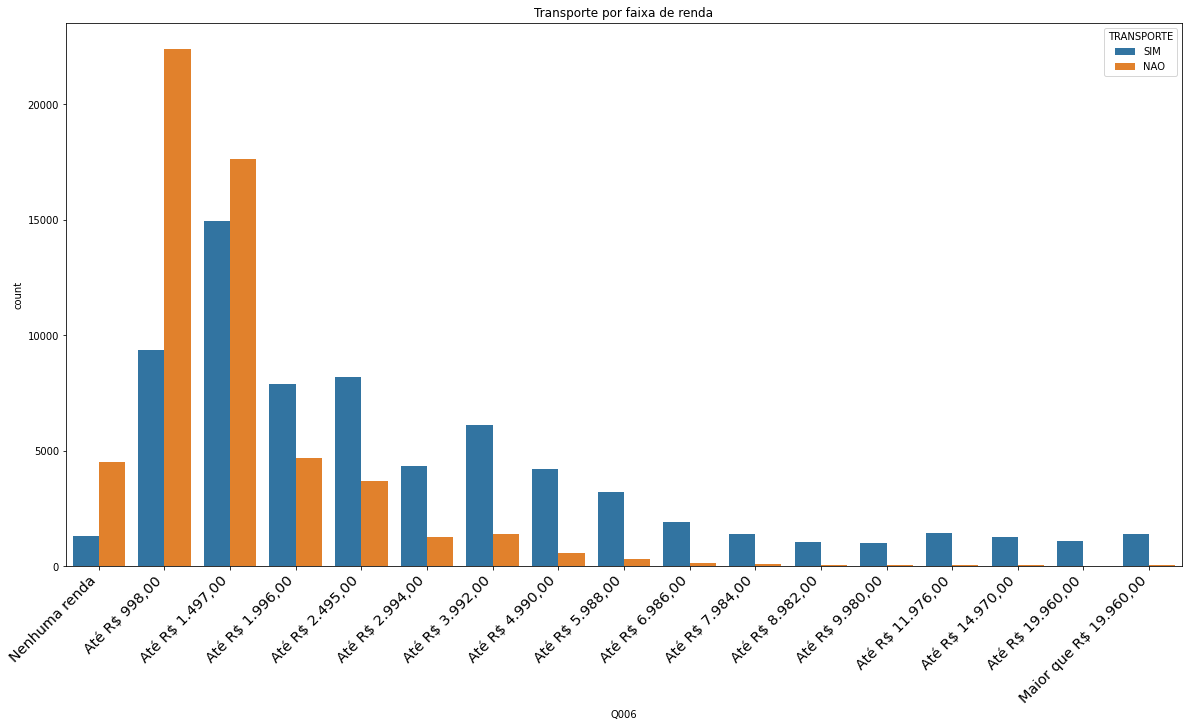

In [217]:
# Distribuição de transporte por faixa de renda
sns.countplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}), x = RENDA, hue = TRANSPORTE, order = ordemRenda).set_title('Transporte por faixa de renda');
rotateLabels()

In [218]:
# Proporção de inscritos com transporte por faixa de renda
(((dados[(dados[TRANSPORTE] == 'SIM')][RENDA].value_counts().rename(index = mapeamentoSocioEconomicas[5])) / (dados[RENDA].value_counts().rename(index = mapeamentoSocioEconomicas[5])) * 100).round(2).astype(str) + ' %').reindex(ordemRenda)

Nenhuma renda             22.48 %
Até R$ 998,00             29.52 %
Até R$ 1.497,00           45.86 %
Até R$ 1.996,00            62.8 %
Até R$ 2.495,00           68.92 %
Até R$ 2.994,00           77.07 %
Até R$ 3.992,00           81.27 %
Até R$ 4.990,00           87.77 %
Até R$ 5.988,00           91.19 %
Até R$ 6.986,00           92.42 %
Até R$ 7.984,00           93.18 %
Até R$ 8.982,00           94.11 %
Até R$ 9.980,00           94.68 %
Até R$ 11.976,00          94.78 %
Até R$ 14.970,00          95.93 %
Até R$ 19.960,00          97.08 %
Maior que R$ 19.960,00    96.94 %
Name: Q006, dtype: object

In [219]:
# Proporção de inscritos sem transporte por faixa de renda
(((dados[(dados[TRANSPORTE] == 'NAO')][RENDA].value_counts().rename(index = mapeamentoSocioEconomicas[5])) / (dados[RENDA].value_counts().rename(index = mapeamentoSocioEconomicas[5])) * 100).round(2).astype(str) + ' %').reindex(ordemRenda)

Nenhuma renda             77.52 %
Até R$ 998,00             70.48 %
Até R$ 1.497,00           54.14 %
Até R$ 1.996,00            37.2 %
Até R$ 2.495,00           31.08 %
Até R$ 2.994,00           22.93 %
Até R$ 3.992,00           18.73 %
Até R$ 4.990,00           12.23 %
Até R$ 5.988,00            8.81 %
Até R$ 6.986,00            7.58 %
Até R$ 7.984,00            6.82 %
Até R$ 8.982,00            5.89 %
Até R$ 9.980,00            5.32 %
Até R$ 11.976,00           5.22 %
Até R$ 14.970,00           4.07 %
Até R$ 19.960,00           2.92 %
Maior que R$ 19.960,00     3.06 %
Name: Q006, dtype: object

In [220]:
def calculateTemCarro(row):
  if (row[CARRO] == 'A'):
    return 'NAO'
  else:
    return 'SIM'

In [221]:
dados[TEM_CARRO] = dados.apply(lambda row: calculateTemCarro(row), axis=1)

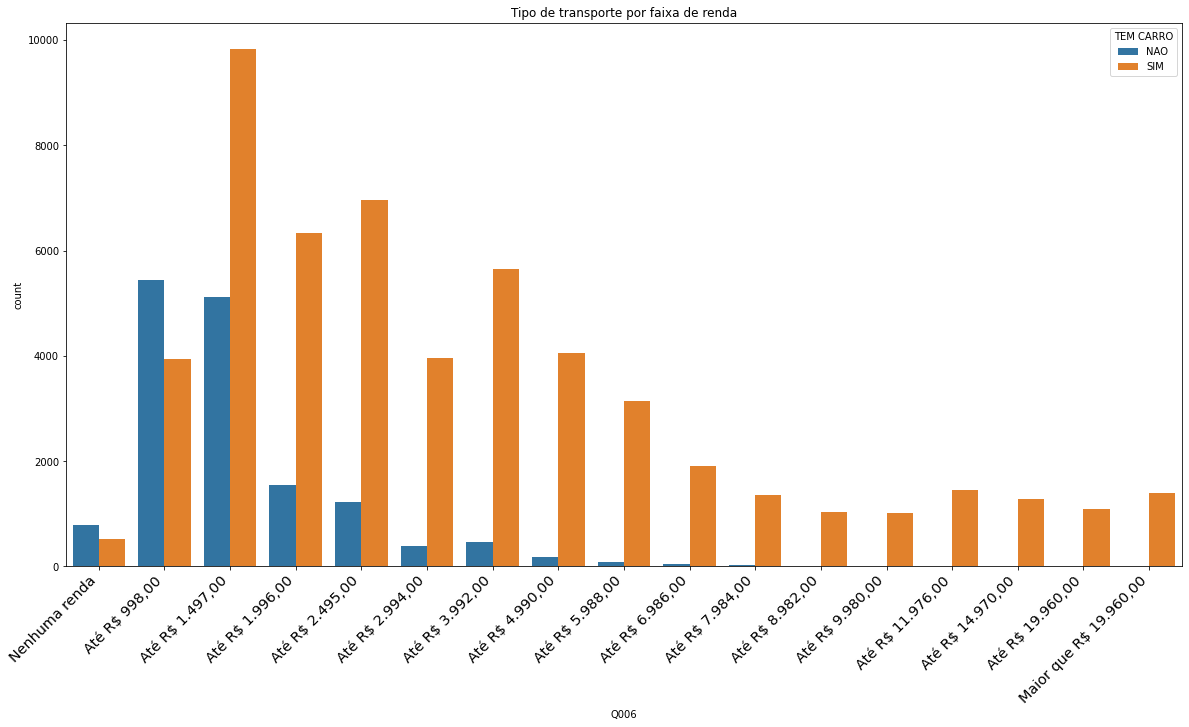

In [222]:
# Distribuição de tipo de transporte por faixa de renda
sns.countplot(data = dados[dados[TRANSPORTE] == 'SIM'].replace({RENDA: mapeamentoSocioEconomicas[5]}), x = RENDA, hue = TEM_CARRO, order = ordemRenda).set_title('Tipo de transporte por faixa de renda');
rotateLabels()

In [223]:
# Proporção de inscritos com carro por faixa de renda
(((dados[dados[TEM_CARRO] == 'SIM'][RENDA].value_counts().rename(index = mapeamentoSocioEconomicas[5])) / (dados[RENDA].value_counts().rename(index = mapeamentoSocioEconomicas[5])) * 100).round(2).astype(str) + ' %').reindex(ordemRenda)

Nenhuma renda              8.89 %
Até R$ 998,00              12.4 %
Até R$ 1.497,00           30.17 %
Até R$ 1.996,00           50.43 %
Até R$ 2.495,00           58.62 %
Até R$ 2.994,00           70.25 %
Até R$ 3.992,00           75.18 %
Até R$ 4.990,00           84.26 %
Até R$ 5.988,00           88.65 %
Até R$ 6.986,00           90.71 %
Até R$ 7.984,00           91.84 %
Até R$ 8.982,00           92.93 %
Até R$ 9.980,00           93.67 %
Até R$ 11.976,00          94.32 %
Até R$ 14.970,00          95.78 %
Até R$ 19.960,00          96.91 %
Maior que R$ 19.960,00    96.73 %
Name: Q006, dtype: object

In [224]:
# Proporção de inscritos com moto por faixa de renda
(((dados[(dados[TEM_CARRO] == 'NAO') & (dados[TRANSPORTE] == 'SIM')][RENDA].value_counts().rename(index = mapeamentoSocioEconomicas[5])) / (dados[RENDA].value_counts().rename(index = mapeamentoSocioEconomicas[5])) * 100).round(2).astype(str) + ' %').reindex(ordemRenda)

Nenhuma renda              13.6 %
Até R$ 998,00             17.12 %
Até R$ 1.497,00           15.69 %
Até R$ 1.996,00           12.37 %
Até R$ 2.495,00            10.3 %
Até R$ 2.994,00            6.83 %
Até R$ 3.992,00            6.08 %
Até R$ 4.990,00            3.51 %
Até R$ 5.988,00            2.53 %
Até R$ 6.986,00            1.72 %
Até R$ 7.984,00            1.35 %
Até R$ 8.982,00            1.18 %
Até R$ 9.980,00            1.01 %
Até R$ 11.976,00           0.46 %
Até R$ 14.970,00           0.15 %
Até R$ 19.960,00           0.18 %
Maior que R$ 19.960,00     0.21 %
Name: Q006, dtype: object

### Conclusão
A maior parte das pessoas que não tem transporte são, em geral, as de renda mais baixas.

---

**OBS**: Inscritos que tem transporte mas não é carro, significa que tem moto.

Podemos observar que os inscritos que tem moto, se concentram nas faixas de renda mais baixas.

Faixas de renda mais altas não costumam ter moto.

---

Também podemos verificar, que conforme a renda aumenta, mais proporcionalmente os inscritos tem carro.

Chegando a mais de 95% dos inscritos nas faixas mais altas terem pelo menos um carro.

## Mudou de estado por Presença

In [225]:
def calculateMudancaEstado(row):
  if (row[ESTADO_PROVA] == row[RESIDENCIA]):
    return 'MESMO ESTADO'
  else:
    return 'OUTRO ESTADO'

In [226]:
# Ajustes no dataset
dados[MUDOU_ESTADO] = dados.apply(lambda row: calculateMudancaEstado(row), axis=1)

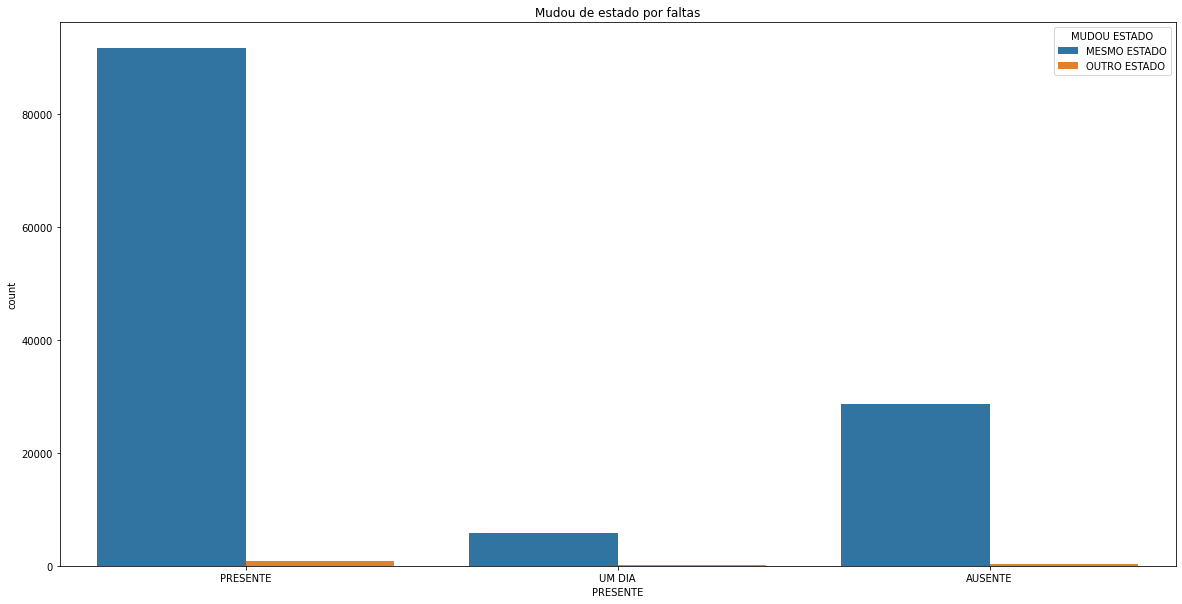

In [227]:
# Distribuição de mudou de estado por faltas
sns.countplot(data = dados, x = PRESENTE, hue = MUDOU_ESTADO).set_title('Mudou de estado por faltas');

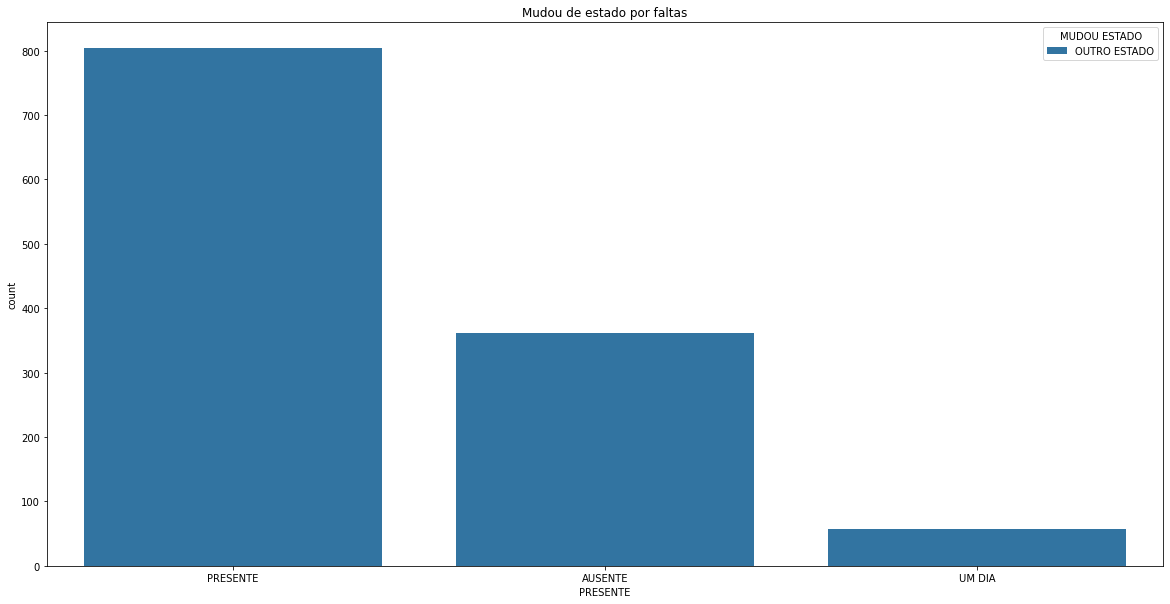

In [228]:
# Distribuição de mudou de estado por faltas
sns.countplot(data = dados[dados[MUDOU_ESTADO] == 'OUTRO ESTADO'], x = PRESENTE, hue = MUDOU_ESTADO).set_title('Mudou de estado por faltas');

### Conclusão
Inscritos que mudaram de estado para realizar a prova não tiveram uma grande ausência nas provas. Na realidade a grande maioria estava presente em ambos os dias.

## Mudou de cidade por Presença

In [229]:
def calculateMudancaCidade(row):
  if (row[CIDADE_PROVA] == row[CIDADE_RESIDENCIA]):
    return 'MESMA CIDADE'
  else:
    return 'OUTRA CIDADE'

In [230]:
# Ajustes no dataset
dados[MUDOU_CIDADE] = dados.apply(lambda row: calculateMudancaCidade(row), axis=1)

In [231]:
# Proporção de inscritos que mudaram de cidade
(((dados[dados[MUDOU_CIDADE] == 'MESMA CIDADE'][PRESENTE].value_counts()) / (dados[PRESENTE].value_counts()) * 100).round(2).astype(str) + ' %')

PRESENTE     83.3 %
AUSENTE     82.06 %
UM DIA      83.96 %
Name: PRESENTE, dtype: object

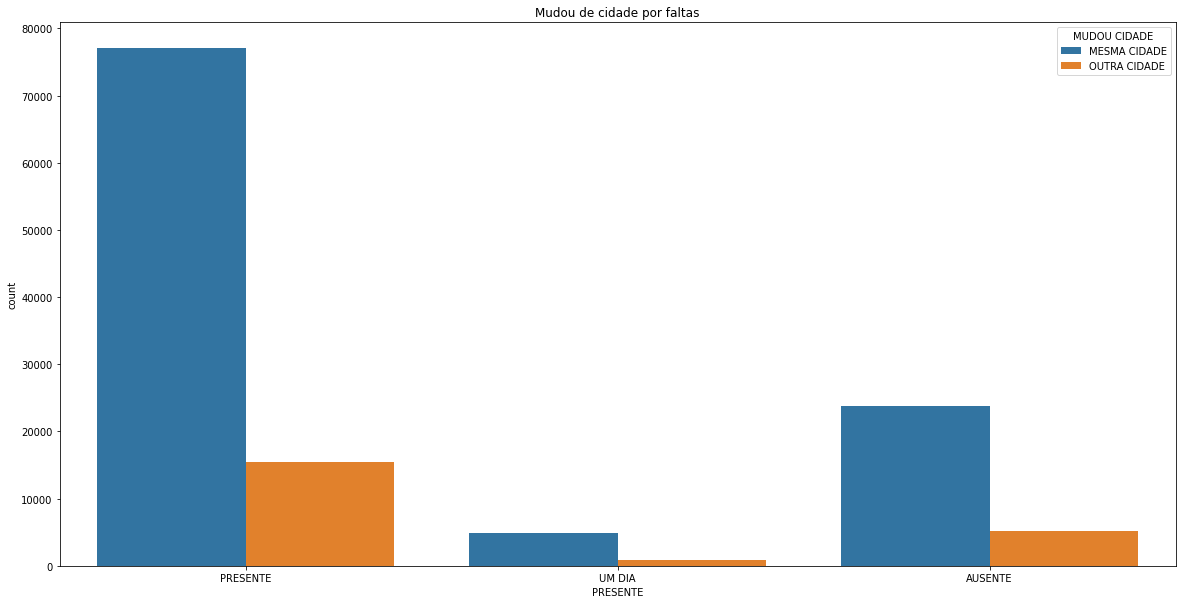

In [232]:
# Distribuição de mudou de estado por faltas
sns.countplot(data = dados, x = PRESENTE, hue = MUDOU_CIDADE).set_title('Mudou de cidade por faltas');

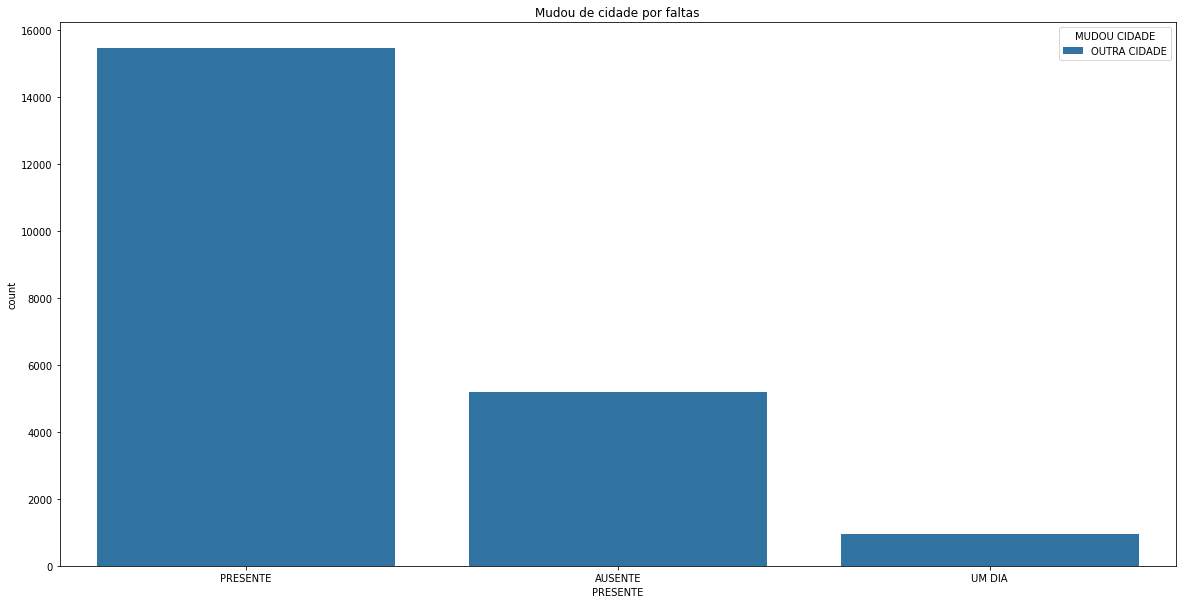

In [233]:
# Distribuição de mudou de estado por faltas
sns.countplot(data = dados[dados[MUDOU_CIDADE] == 'OUTRA CIDADE'], x = PRESENTE, hue = MUDOU_CIDADE).set_title('Mudou de cidade por faltas');

### Conclusão
Inscritos que mudaram de cidade para realizar a prova não tiveram uma grande ausência nas provas. Na realidade a grande maioria estava presente em ambos os dias.

Por incrível que pareça, mais de 80% dos ausentes em ambas as provas são os inscritos da mesma cidade.

## Celular por pessoas na mesma residência

In [234]:
def calculateTemCelular(row):
  if (row[CELULAR] == 'A'):
    return 'NAO TEM CELULAR'
  elif (row[CELULAR] == 'B'):
    return 'TEM UM CELULAR'
  else:
    return 'MUITOS CELULARES'

In [235]:
# Ajustes no dataset
dados[TEM_CELULAR] = dados.apply(lambda row: calculateTemCelular(row), axis=1)

In [236]:
# Proporção de inscritos que tem celular
(((dados[dados[TEM_CELULAR] == 'MUITOS CELULARES'][PESSOAS_RESIDENCIA].value_counts()) / (dados[PESSOAS_RESIDENCIA].value_counts()) * 100).round(2).astype(str) + ' %')

1      4.38 %
2      70.7 %
3     79.29 %
4     82.07 %
5     79.65 %
6     75.99 %
7     73.35 %
8     69.19 %
9     73.11 %
10    60.77 %
11    73.15 %
12    54.79 %
13    73.17 %
14    68.75 %
15     75.0 %
16    66.67 %
17     75.0 %
18    100.0 %
19     25.0 %
20     50.0 %
Name: Q005, dtype: object

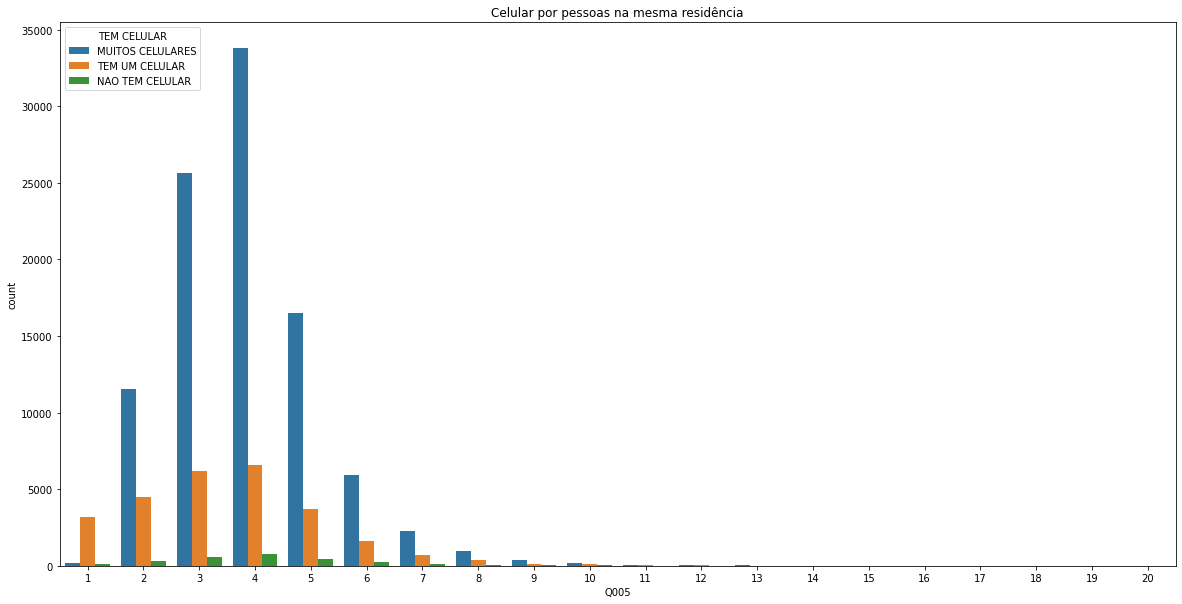

In [237]:
# Distribuição de celular por pessoas na mesma residência
sns.countplot(data = dados, x = PESSOAS_RESIDENCIA, hue = TEM_CELULAR).set_title('Celular por pessoas na mesma residência');

### Conclusão
Conforme a quantidade de pessoas na mesma residência que o inscrito cresce era esperado que a quantidade de celulares na residência também crescesse.

De certa forma esta hipótese acontece até 5 pessoas por residência.

## Conclusão do Ensino Médio por Tipo Escola

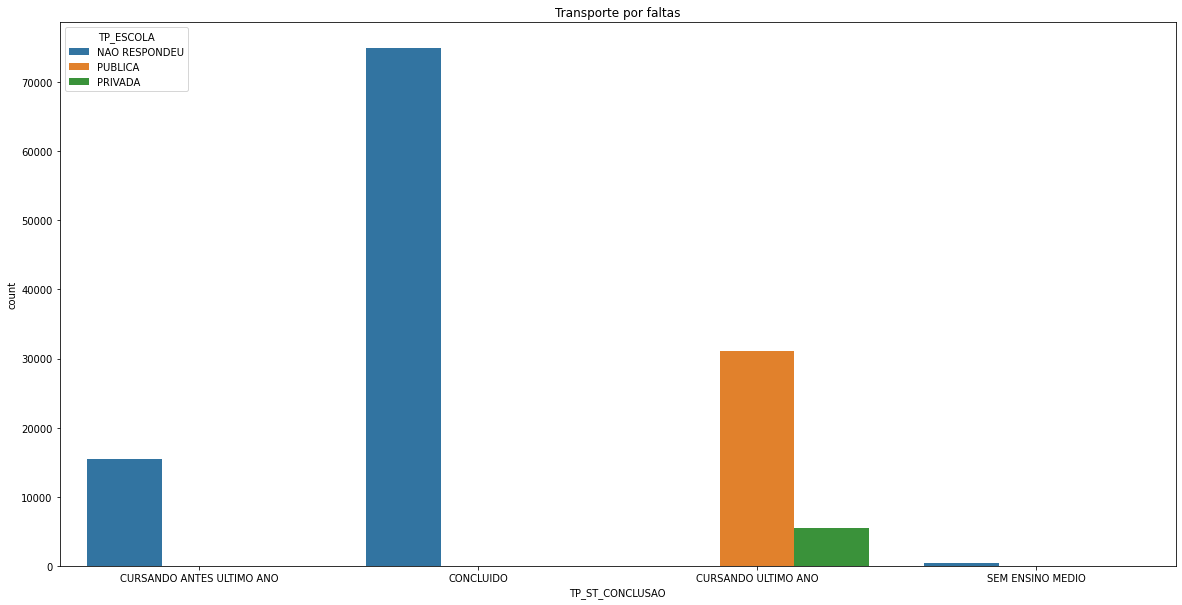

In [238]:
sns.countplot(data = dados.replace({SITUACAO_ENSINO_MEDIO: mapeamentoSituacaoEnsinoMedio}).replace({TIPO_ESCOLA: mapeamentoTipoEscola}), x = SITUACAO_ENSINO_MEDIO, hue = TIPO_ESCOLA).set_title('Transporte por faltas');

### Conclusão
Aparentemente, na amostra, os inscritos só informam que escola ou que tipo de escola estão, quando estão cursando o último ano.

# Comparações e Correlações com Notas

## Notas das provas

In [239]:
# Constantes
PROVAS = [NOTA_CN, NOTA_CH, NOTA_LC, NOTA_MT, NOTA_REDACAO]

In [240]:
# Estatísticas para comparação das notas
dados[PROVAS].describe()

NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  92758.000000  98043.000000  98043.000000  92758.000000     98043.000000
mean     477.964015    507.365912    520.463928    523.555206       571.570025
std       76.296099     82.972839     64.556578    109.416939       188.076455
min        0.000000      0.000000      0.000000      0.000000         0.000000
25%      418.000000    447.900000    483.700000    435.300000       480.000000
50%      470.200000    510.900000    526.100000    501.600000       580.000000
75%      533.300000    567.100000    565.100000    598.200000       680.000000
max      797.300000    809.400000    801.700000    985.000000      1000.000000

In [241]:
# Removendo os zeros
dados.replace({ NOTA_CH: { 0: np.nan }, NOTA_CN: { 0: np.nan }, NOTA_LC: { 0: np.nan }, NOTA_MT: { 0: np.nan }, NOTA_REDACAO: { 0: np.nan } }, inplace = True)

In [242]:
# Criando nota final sem zeros
dados[NOTA_FINAL] = dados[PROVAS].sum(axis=1)
dados.replace({ NOTA_FINAL: { 0: np.nan } }, inplace=True);

In [243]:
# Estatísticas para comparação das notas sem zeros
dados[PROVAS].describe()

NU_NOTA_CN    NU_NOTA_CH    NU_NOTA_LC    NU_NOTA_MT  NU_NOTA_REDACAO
count  92740.000000  97867.000000  97947.000000  92733.000000     94538.000000
mean     478.056783    508.278338    520.974046    523.696352       592.761006
std       76.012338     80.206620     62.497004    109.093427       155.315462
min      327.900000    315.900000    322.000000    359.000000        40.000000
25%      418.000000    448.200000    483.900000    435.400000       500.000000
50%      470.200000    511.100000    526.200000    501.700000       580.000000
75%      533.300000    567.200000    565.200000    598.300000       680.000000
max      797.300000    809.400000    801.700000    985.000000      1000.000000

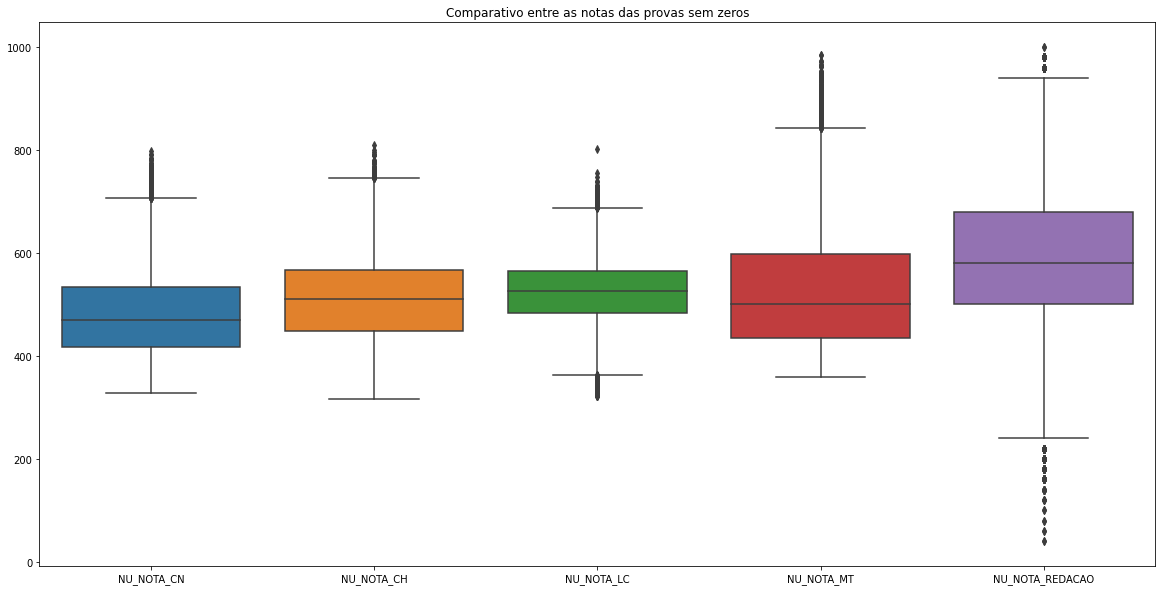

In [244]:
# Boxplot de comparação das notas sem zeros
sns.boxplot(data = dados[PROVAS]).set_title('Comparativo entre as notas das provas sem zeros');

### Conclusão
Pelo comparativo de notas, podemos perceber alguns pontos:

---

Para a prova de CN (Ciências da Natureza - Biologia, Física e Química):
* É a prova que tem a menor média de notas entre todas as provas.

---

Para a prova de CH (Ciências Humanas - História, Geografia, Filosofia e Sociologia):
* Tem uma média maior que a prova de CN.
* Em geral suas notas são maiores que as de CN.

---

Para a prova de LC (Linguagens e Códigos - Língua Portuguesa, Literatura, Língua Estrangeira, Educação Física e Tecnologias da Informação e Comunicação):
* Tem uma média maior que a prova de CH.
* É a prova com segunda maior méida (Desconsiderando a redação).
* Tem a menor variação de notas entre todas as provas.

Talvez isso ocorra pela diversidade de matérias.

---

Para a prova de MT (Matemática):
* É a prova com a maior méida (Desconsiderando a redação).
* É a prova que tem maior variação de notas (Desconsiderando a redação).
* Tem o maior 4º quartil e maior quantidade de possiveis 'outliers', o que indica uma grande dispersão nas notas mais altas.

---

Para a Redação:
* É a prova com maior média entre todas as provas.
* Mas também é a prova com maior variação de notas.

## Notas por Notas

In [245]:
PROVAS_TODAS = PROVAS + [NOTA_FINAL]

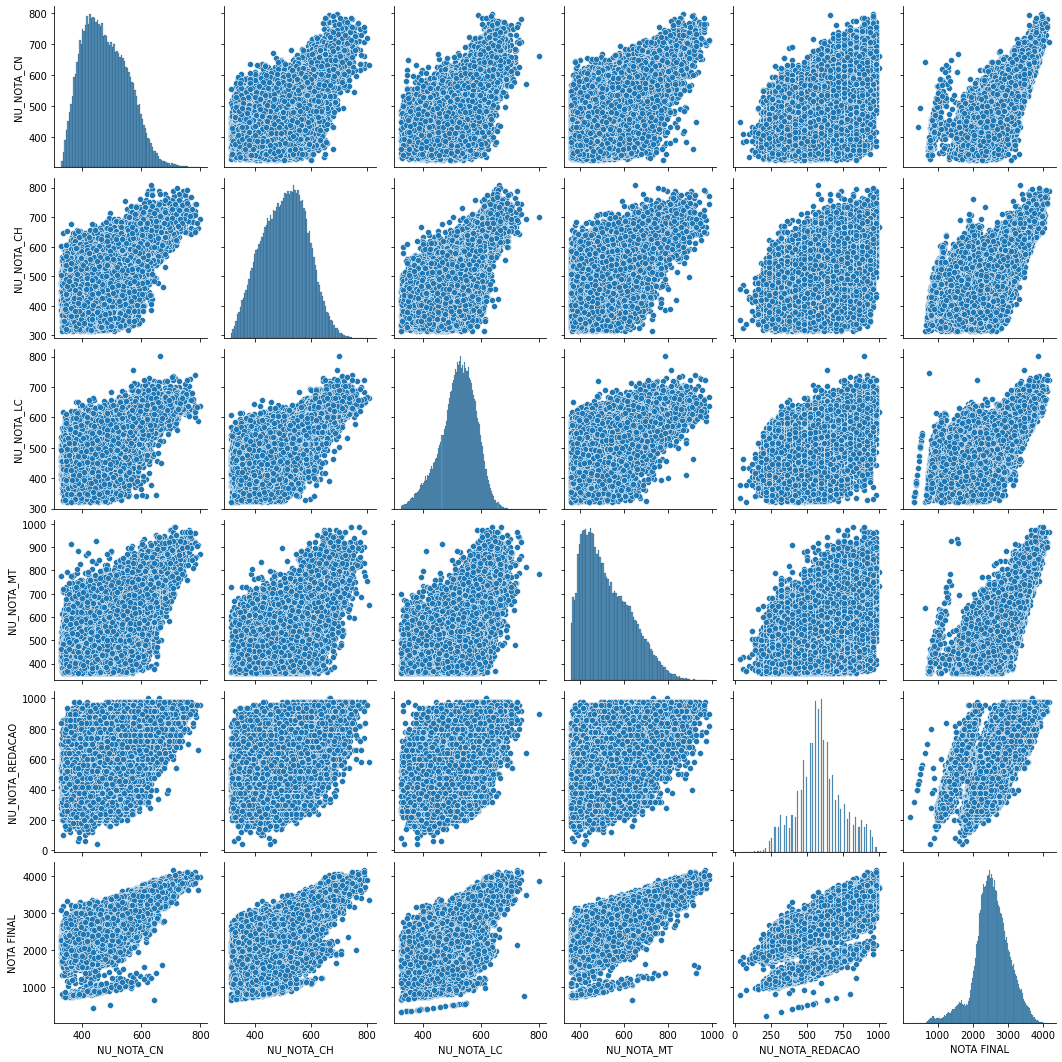

In [246]:
sns.pairplot(dados[PROVAS_TODAS]);

In [247]:
correlacaoProvas = dados[PROVAS_TODAS].corr()
correlacaoProvas

NU_NOTA_CN  NU_NOTA_CH  ...  NU_NOTA_REDACAO  NOTA FINAL
NU_NOTA_CN         1.000000    0.679032  ...         0.534371    0.785771
NU_NOTA_CH         0.679032    1.000000  ...         0.552840    0.735125
NU_NOTA_LC         0.650603    0.744835  ...         0.553370    0.713559
NU_NOTA_MT         0.649628    0.619280  ...         0.523074    0.789764
NU_NOTA_REDACAO    0.534371    0.552840  ...         1.000000    0.758198
NOTA FINAL         0.785771    0.735125  ...         0.758198    1.000000

[6 rows x 6 columns]

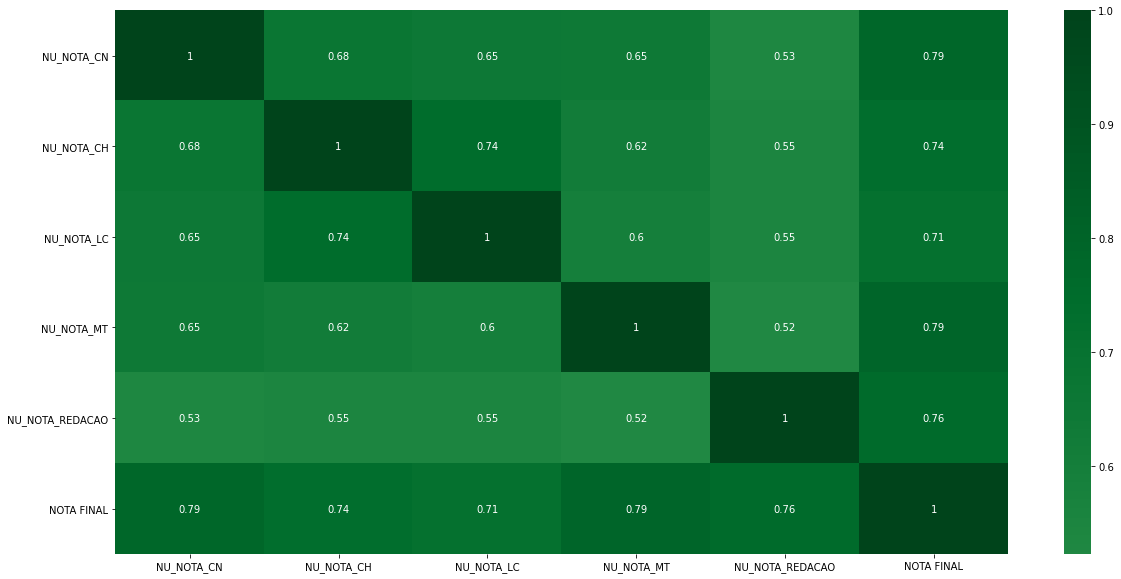

In [248]:
sns.heatmap(correlacaoProvas, cmap = "Greens", center = 0, annot = True);

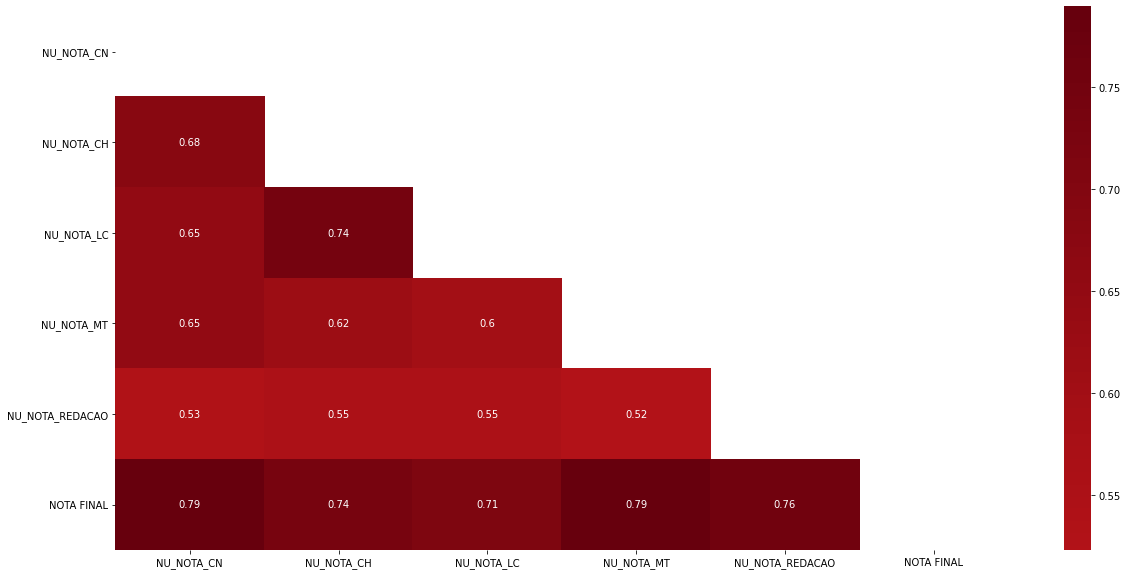

In [249]:
mask = np.zeros_like(correlacaoProvas)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlacaoProvas, cmap = "Reds", center = 0, annot = True, mask = mask);

### Conclusão
Com a relação entre as notas, podemos observar:
* Nenhuma nota tem uma grande correlação linear com outra.
* A maior parte das relações entre as notas indicam que quem tira nota alta em uma tira nota alta em outra.
---
* Outra correlação interessante é entre as notas de LC e CH. Que podemos considerar que são as matérias de humanas da prova.
---
* Se verificarmos a relação das notas com a nota final, podemos perceber uma certa linearidade.
* Parece que quem tira notas maiores na redação ou na prova de matemátca, acaba ficando com uma nota maior na nota final. É possível isto ocorra pois estas notas apresentam uma alcance maior de 0 e 1.000, para a redação por exemplo. Enquanto que as outras notas são normalizadas e aparentam ficar em torno de 0 e 800.

## Notas por Estado

### Nota Final

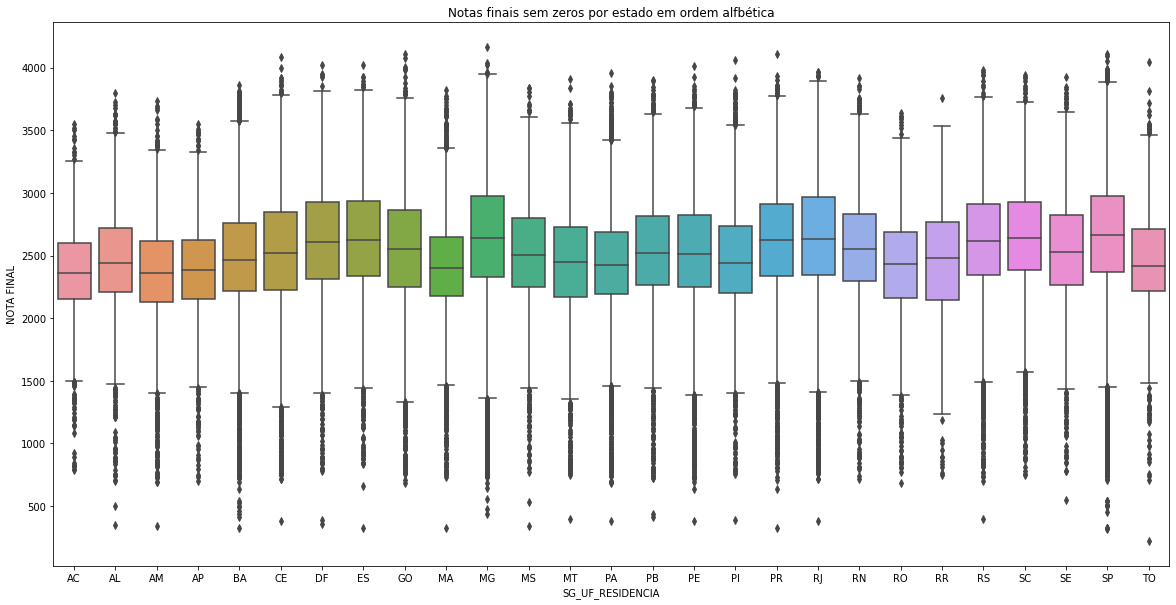

In [250]:
# Distribuição de notas finais sem zeros por estado em ordem alfbética
sns.boxplot(data = dados, x = RESIDENCIA, y = NOTA_FINAL, order = estadosOrdemAlfabetica).set_title('Notas finais sem zeros por estado em ordem alfbética');

In [251]:
estadosOrdemMedian = dados.groupby(RESIDENCIA).median()[NOTA_FINAL].sort_values().index

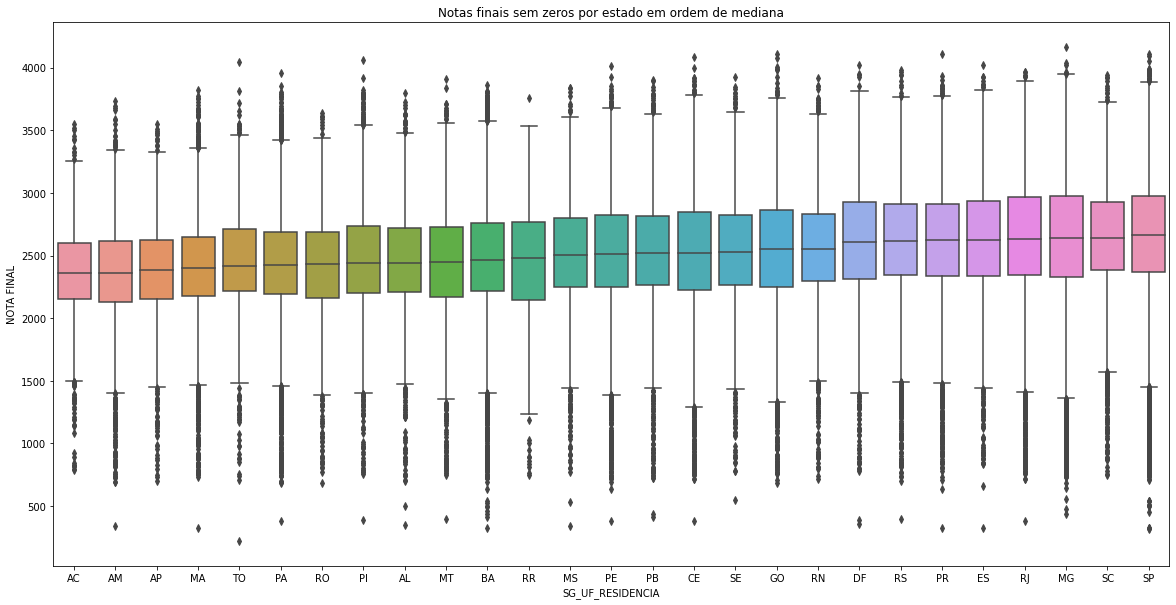

In [252]:
# Distribuição de notas finais sem zeros por estado em ordem de mediana
sns.boxplot(data = dados, x = RESIDENCIA, y = NOTA_FINAL, order = estadosOrdemMedian).set_title('Notas finais sem zeros por estado em ordem de mediana');

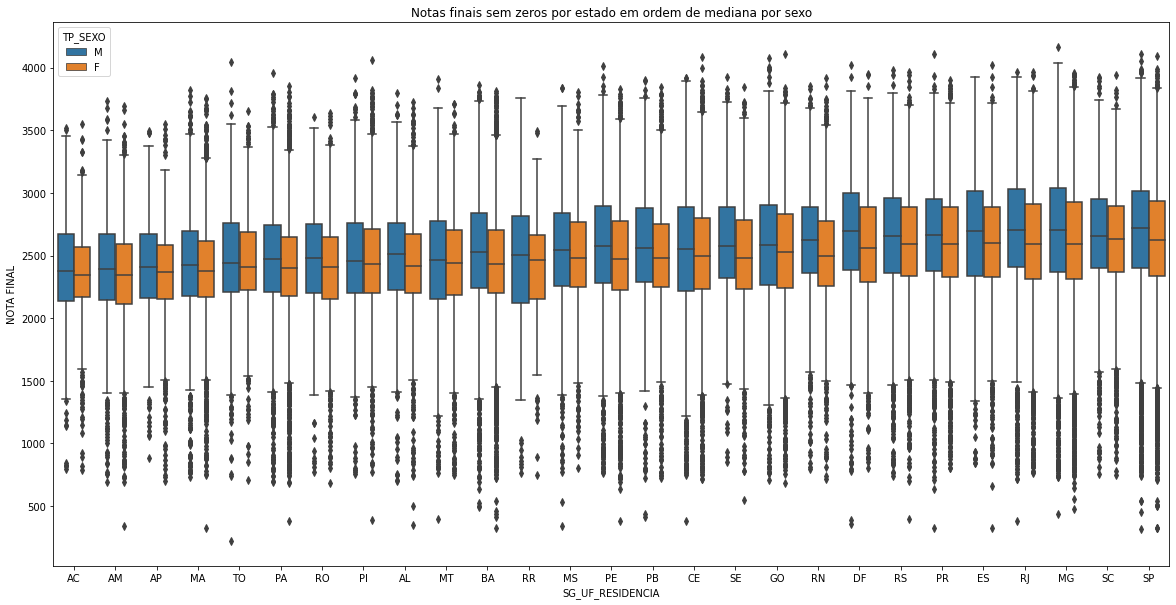

In [253]:
# Distribuição de notas finais sem zeros por estado em ordem de mediana por sexo
sns.boxplot(data = dados, x = RESIDENCIA, y = NOTA_FINAL, hue = SEXO, order = estadosOrdemMedian).set_title('Notas finais sem zeros por estado em ordem de mediana por sexo');

#### Conclusão
Por estes comparativos, podemos perceber alguns pontos:
* As melhores notas se concentram nos estados do Sudeste e Sul.
* Notas mais baixas se concentram nos estados do Norte.
* Notas do sexo feminino em todos os estados são em geral mais baixos.

### Nota Matemática

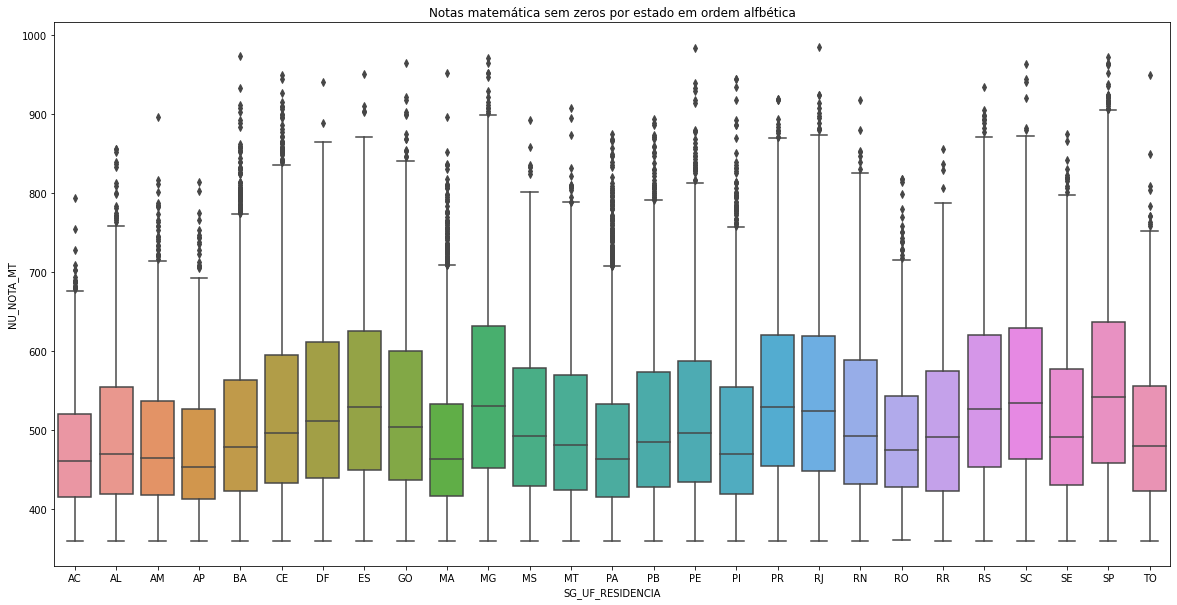

In [254]:
# Distribuição de notas matemática sem zeros por estado em ordem alfbética
sns.boxplot(data = dados, x = RESIDENCIA, y = NOTA_MT, order = estadosOrdemAlfabetica).set_title('Notas matemática sem zeros por estado em ordem alfbética');

In [255]:
estadosOrdemMedian = dados.groupby(RESIDENCIA).median()[NOTA_MT].sort_values().index

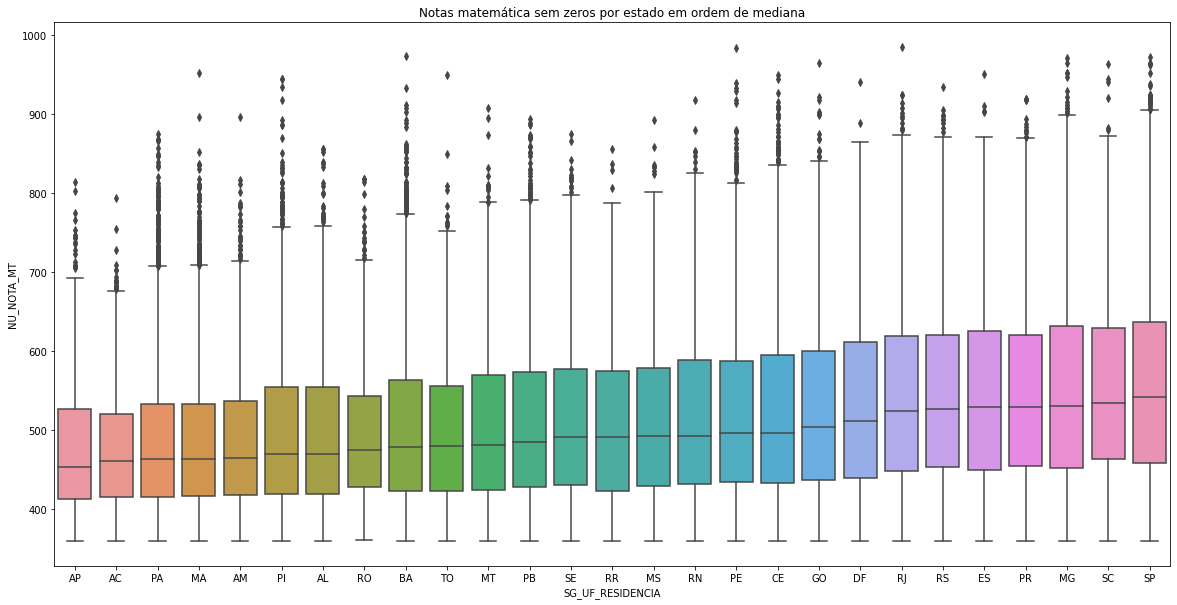

In [256]:
# Distribuição de notas matemática sem zeros por estado em ordem de mediana
sns.boxplot(data = dados, x = RESIDENCIA, y = NOTA_MT, order = estadosOrdemMedian).set_title('Notas matemática sem zeros por estado em ordem de mediana');

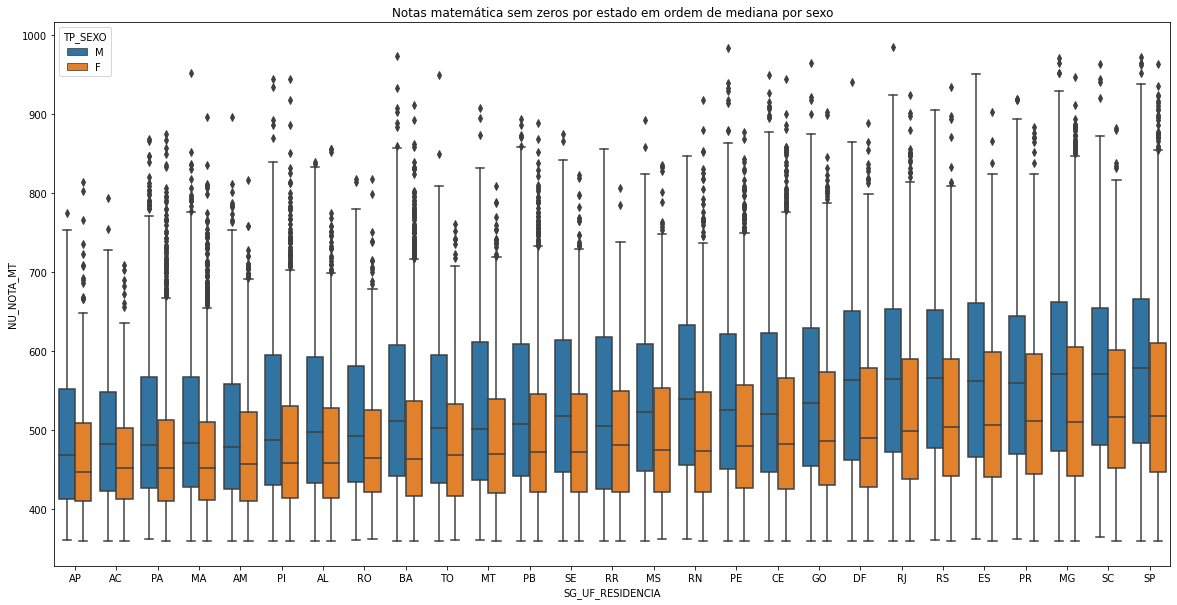

In [257]:
# Distribuição de notas matemática sem zeros por estado em ordem de mediana por sexo
sns.boxplot(data = dados, x = RESIDENCIA, y = NOTA_MT, hue = SEXO, order = estadosOrdemMedian).set_title('Notas matemática sem zeros por estado em ordem de mediana por sexo');

#### Conclusão
Por estes comparativos, podemos perceber alguns pontos:
* As melhores notas se concentram nos estados do Sudeste e Sul.
* Notas mais baixas se concentram nos estados do Norte.
* Notas do sexo feminino em todos os estados são em geral mais baixos.

## Notas por Região

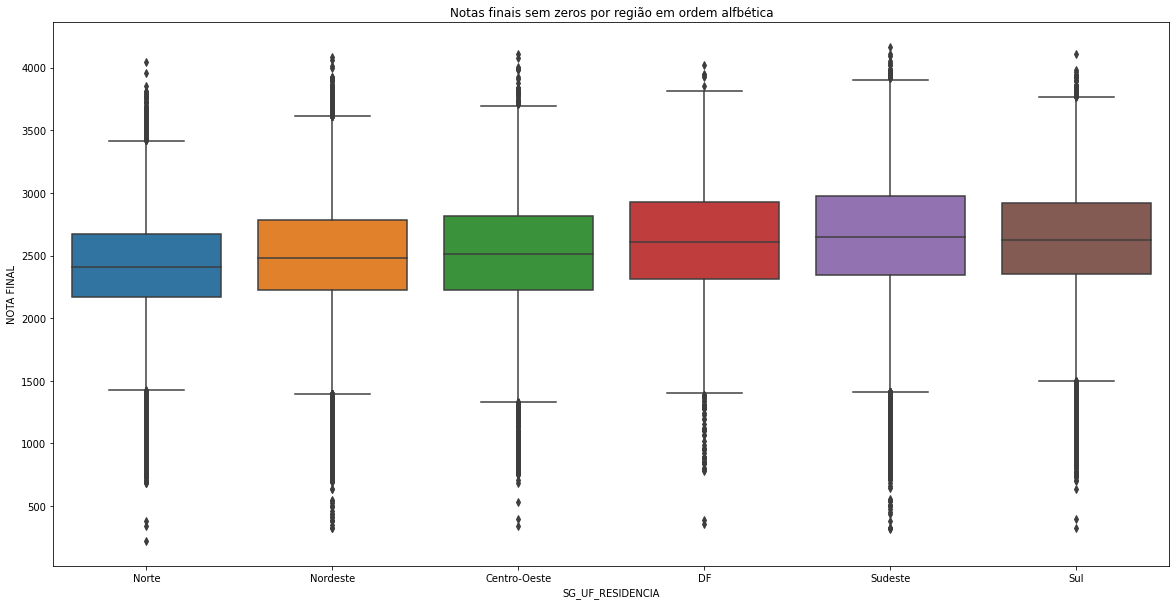

In [258]:
# Distribuição de notas finais sem zeros por região em ordem alfbética
sns.boxplot(data = dados.replace({RESIDENCIA: mapeamentoEstadosRegiao}), x = RESIDENCIA, y = NOTA_FINAL, order = ordemRegiao).set_title('Notas finais sem zeros por região em ordem alfbética');

In [259]:
regiaoOrdemMedian = dados.replace({RESIDENCIA: mapeamentoEstadosRegiao}).groupby(RESIDENCIA).median()[NOTA_FINAL].sort_values().index

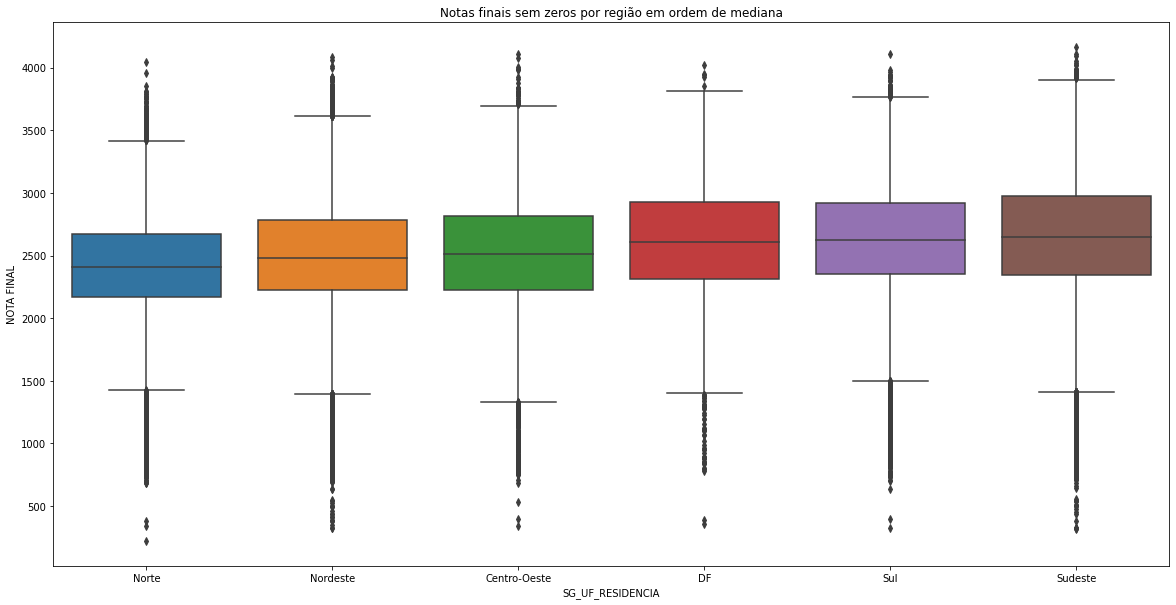

In [260]:
# Distribuição de notas finais sem zeros por estado em ordem de mediana
sns.boxplot(data = dados.replace({RESIDENCIA: mapeamentoEstadosRegiao}), x = RESIDENCIA, y = NOTA_FINAL, order = regiaoOrdemMedian).set_title('Notas finais sem zeros por região em ordem de mediana');

### Conclusão
Por estes comparativos, chegamos às mesmas conclusões da comparação por estado:

* As melhores notas se concentram nos estados do Sudeste e Sul.
* Notas mais baixas se concentram nos estados do Norte.

## Notas por Região - Sexo

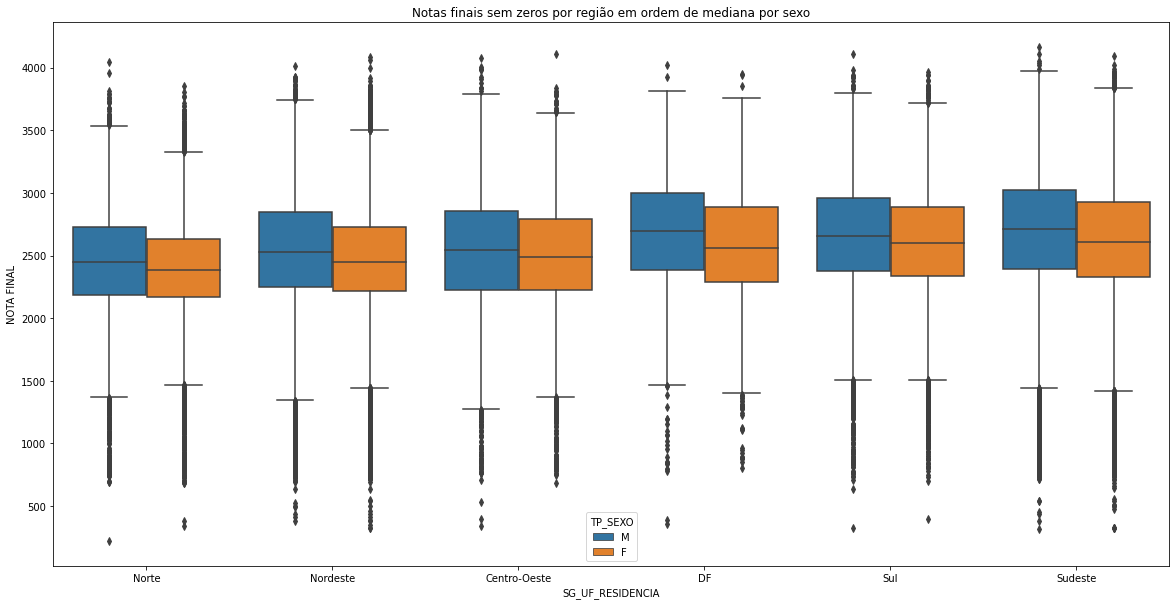

In [261]:
# Distribuição de notas finais sem zeros por estado em ordem de mediana por sexo
sns.boxplot(data = dados.replace({RESIDENCIA: mapeamentoEstadosRegiao}), x = RESIDENCIA, y = NOTA_FINAL, hue = SEXO, order = regiaoOrdemMedian).set_title('Notas finais sem zeros por região em ordem de mediana por sexo');

#### Conclusão
Notas do sexo feminino em todos os estados são em geral mais baixos.

## Notas por Raça

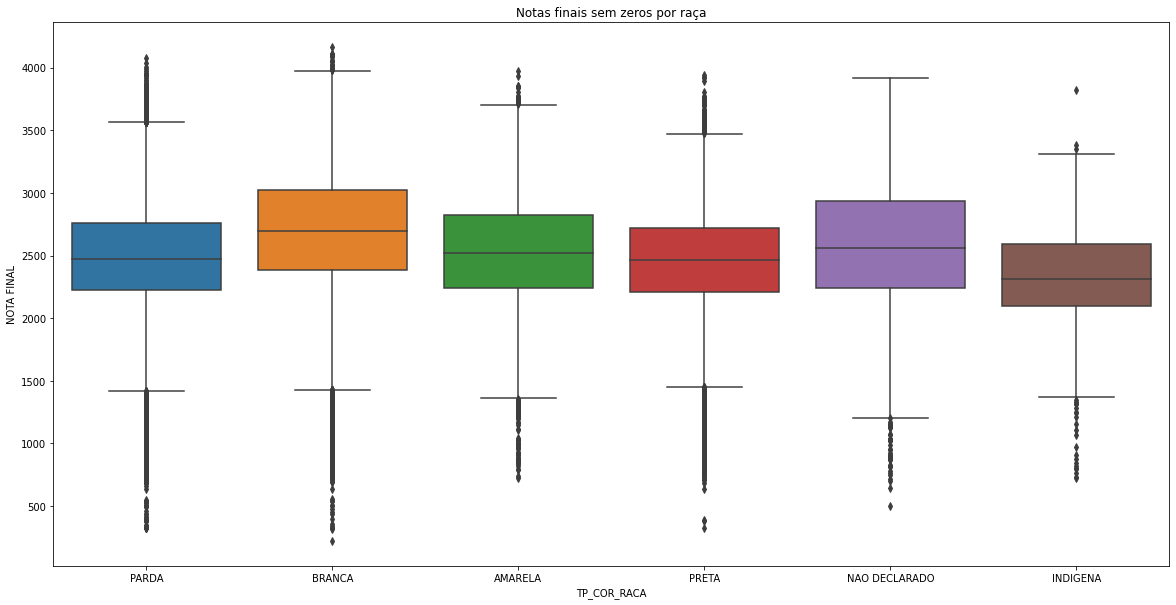

In [262]:
# Distribuição de notas finais sem zeros por raça
sns.boxplot(data = dados.replace({RACA: mapeamentoRaca}), x = RACA, y = NOTA_FINAL).set_title('Notas finais sem zeros por raça');

#### Conclusão
Podemos observar os seguintes pontos: \
* Em geral, as notas de 'Brancos' são maiores, apesar da grande dispersão nas notas.
* Em geral, as notas de 'Indígenas' são menores, mas também são poucos inscritos nessa categoria.

## Notas por Raça - Sexo

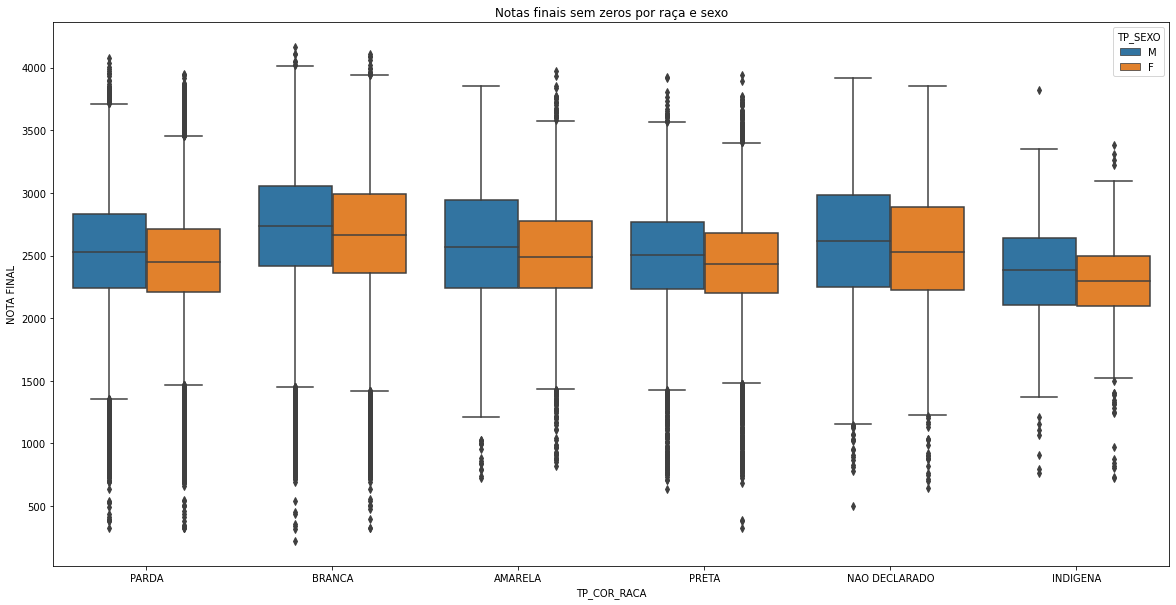

In [263]:
# Distribuição de notas finais sem zeros por raça e sexo
sns.boxplot(data = dados.replace({RACA: mapeamentoRaca}), x = RACA, y = NOTA_FINAL, hue = SEXO).set_title('Notas finais sem zeros por raça e sexo');

#### Conclusão
Podemos observar que as notas do sexo feminino são, em geral, menores independentemente de sua raça se comparado as notas do sexo masculino.


## Notas por Estado Civil

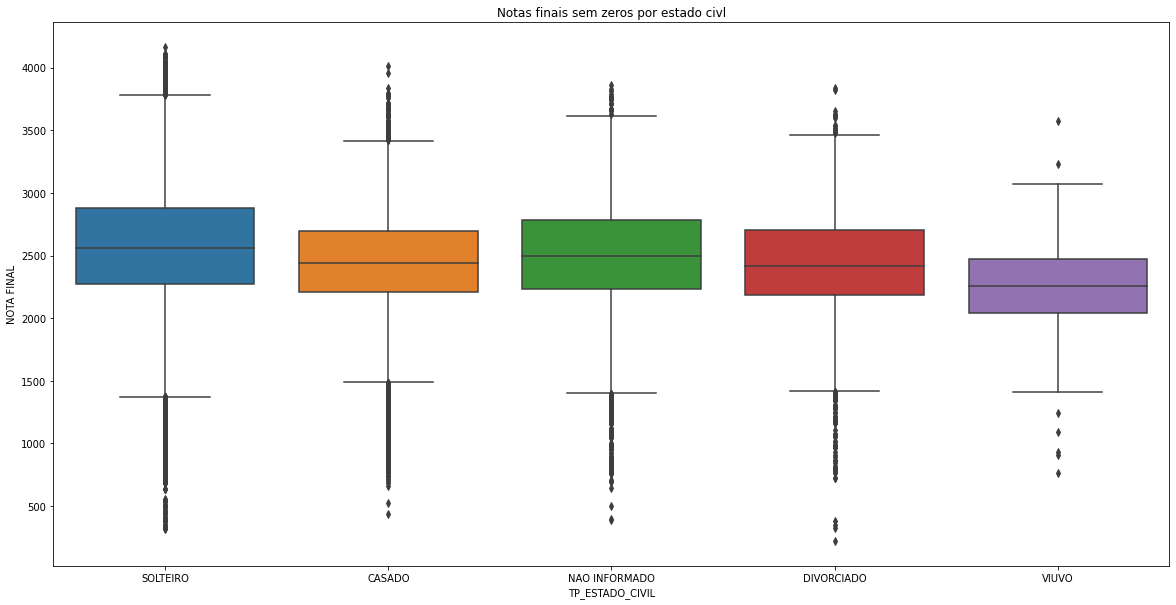

In [264]:
# Distribuição de notas finais sem zeros por estado civl
sns.boxplot(data = dados.replace({ESTADO_CIVIL: mapeamentoEstadoCivil}), x = ESTADO_CIVIL, y = NOTA_FINAL).set_title('Notas finais sem zeros por estado civl');

#### Conclusão
Podemos observar os seguintes pontos: \
* Em geral, as notas de 'Solteiros' são maiores, apesar da grande dispersão nas notas.
* Em geral, as notas de 'Viúvos' são menores, mas também são poucos inscritos nessa categoria.

## Notas por Renda

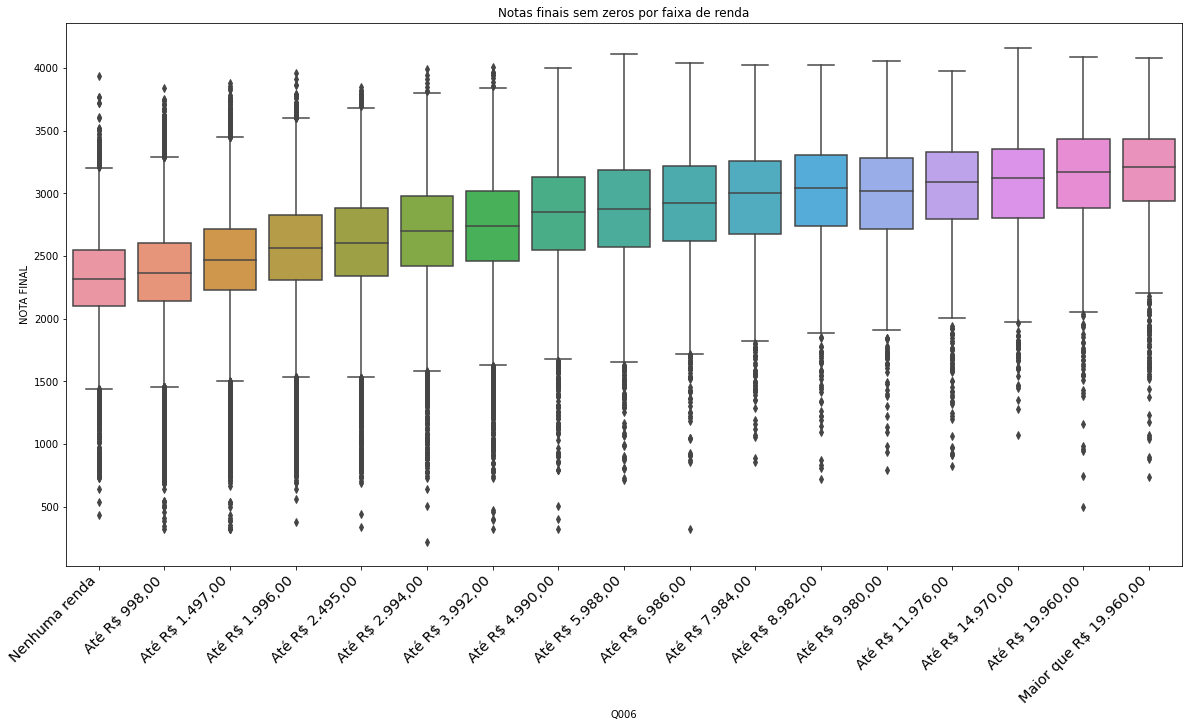

In [265]:
# Distribuição de notas finais sem zeros por faixa de renda
sns.boxplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}), x = RENDA, y = NOTA_FINAL, order = ordemRenda).set_title('Notas finais sem zeros por faixa de renda');
rotateLabels()

#### Conclusão
Por estes comparativos podemos obervar que há claramente uma crescente nas notas de acordo com o aumento da renda familiar.

## Notas por Renda - Sexo

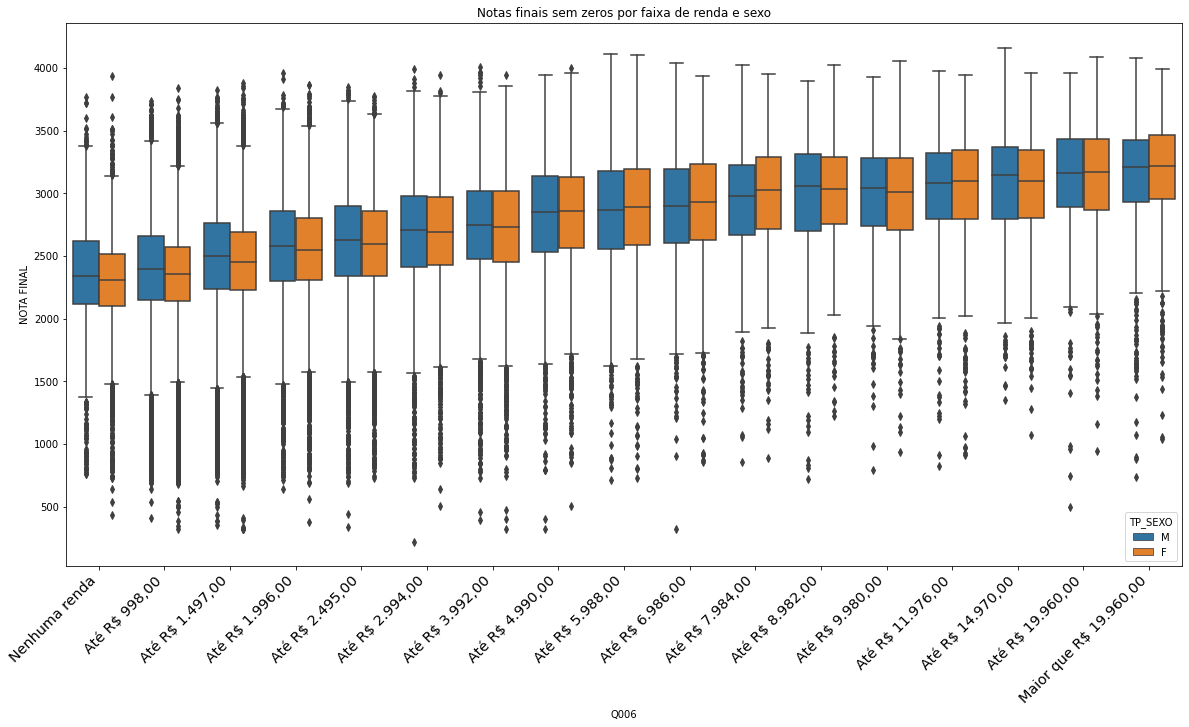

In [266]:
# Distribuição de notas finais sem zeros por faixa de renda e sexo
sns.boxplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}), x = RENDA, y = NOTA_FINAL, hue = SEXO, order = ordemRenda).set_title('Notas finais sem zeros por faixa de renda e sexo');
rotateLabels()

#### Conclusão
Podemos observar que há uma diferença nas notas masculinas e femininas em baixas rendas. \
Por outro lado, em altas rendas, este valor fica bem equiparado.

## Notas por Renda - Treineiros

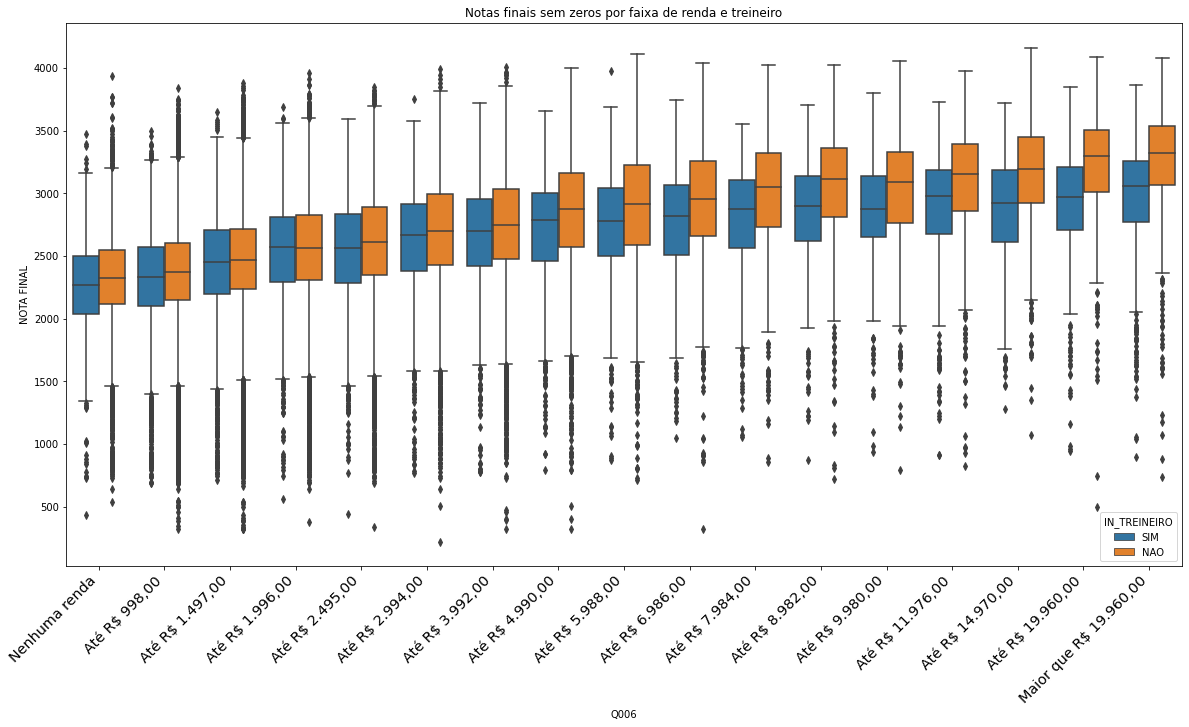

In [267]:
# Distribuição de notas finais sem zeros por faixa de renda e treineiro
sns.boxplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}).replace({TREINEIRO: mapeamentoTreineiro}), x = RENDA, y = NOTA_FINAL, hue = TREINEIRO, order = ordemRenda).set_title('Notas finais sem zeros por faixa de renda e treineiro');
rotateLabels()

#### Conclusão
Podemos observar que há uma diferença nas notas entre treineiros e não treineiros em rendas mais altas. \
Outro ponto interessante é que as notas de treineiros das rendas mais altas são, em geral, maiores que as notas de não treineiros de rendas mais baixas.

## Notas por Renda - Lingua

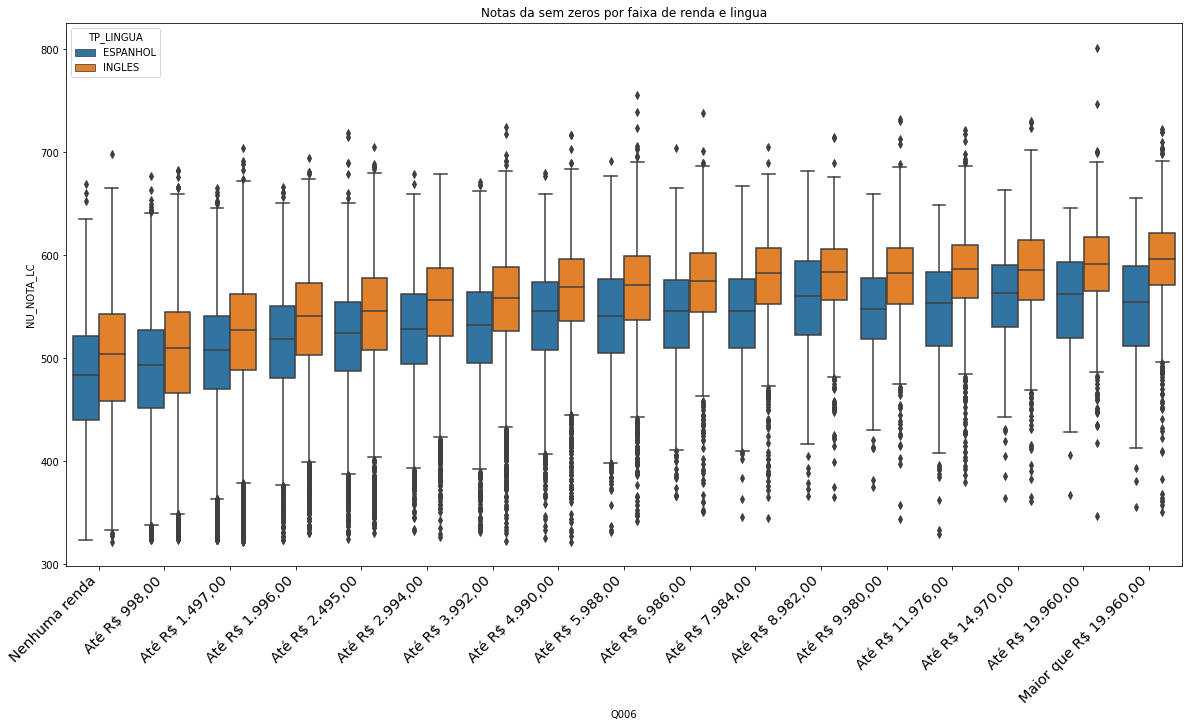

In [268]:
# Distribuição de notas da sem zeros por faixa de renda e lingua
sns.boxplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}).replace({LINGUA: mapeamentoLingua}), x = RENDA, y = NOTA_LC, hue = LINGUA, order = ordemRenda).set_title('Notas da sem zeros por faixa de renda e lingua');
rotateLabels()

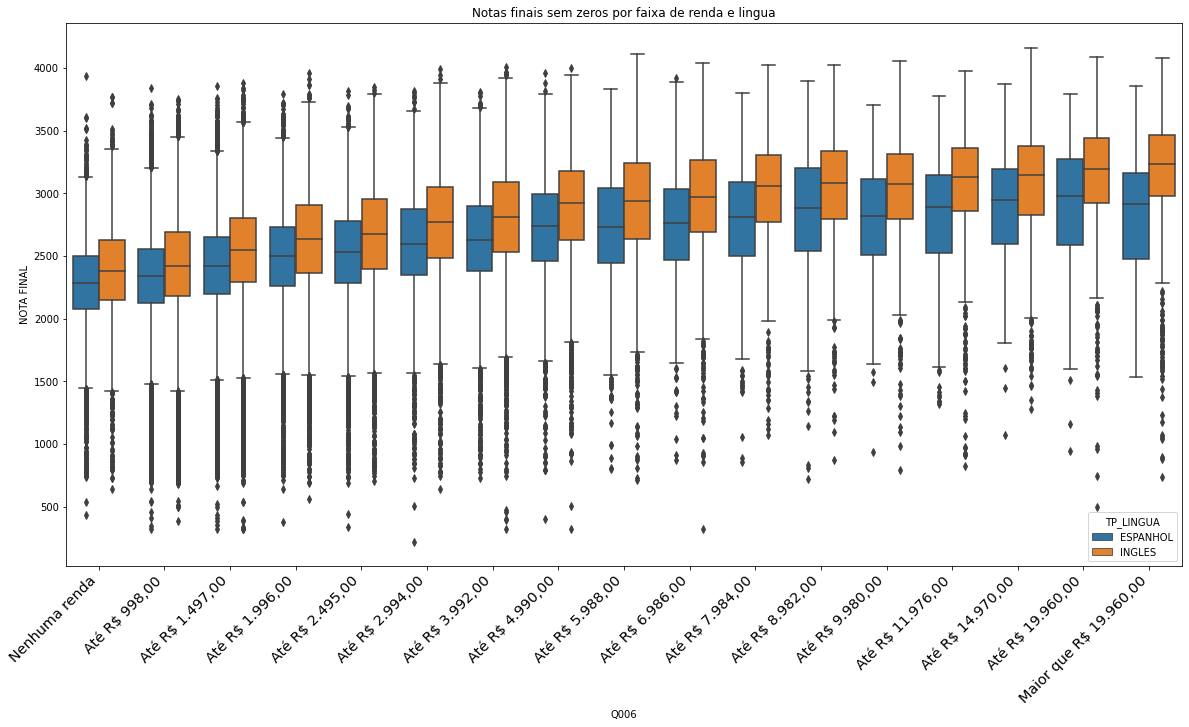

In [269]:
# Distribuição de notas finais sem zeros por faixa de renda e lingua
sns.boxplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}).replace({LINGUA: mapeamentoLingua}), x = RENDA, y = NOTA_FINAL, hue = LINGUA, order = ordemRenda).set_title('Notas finais sem zeros por faixa de renda e lingua');
rotateLabels()

#### Conclusão
Podemos observar que há uma diferença nas notas entre os que escolheram inglês e os que escolheram espanhol, tanto nas notas de linguagens como na nota final e independente da renda. \
É possivel perceber que com o aumento da renda a diferença entre as notas, em geral, aumentam.

## Notas por Renda - Internet

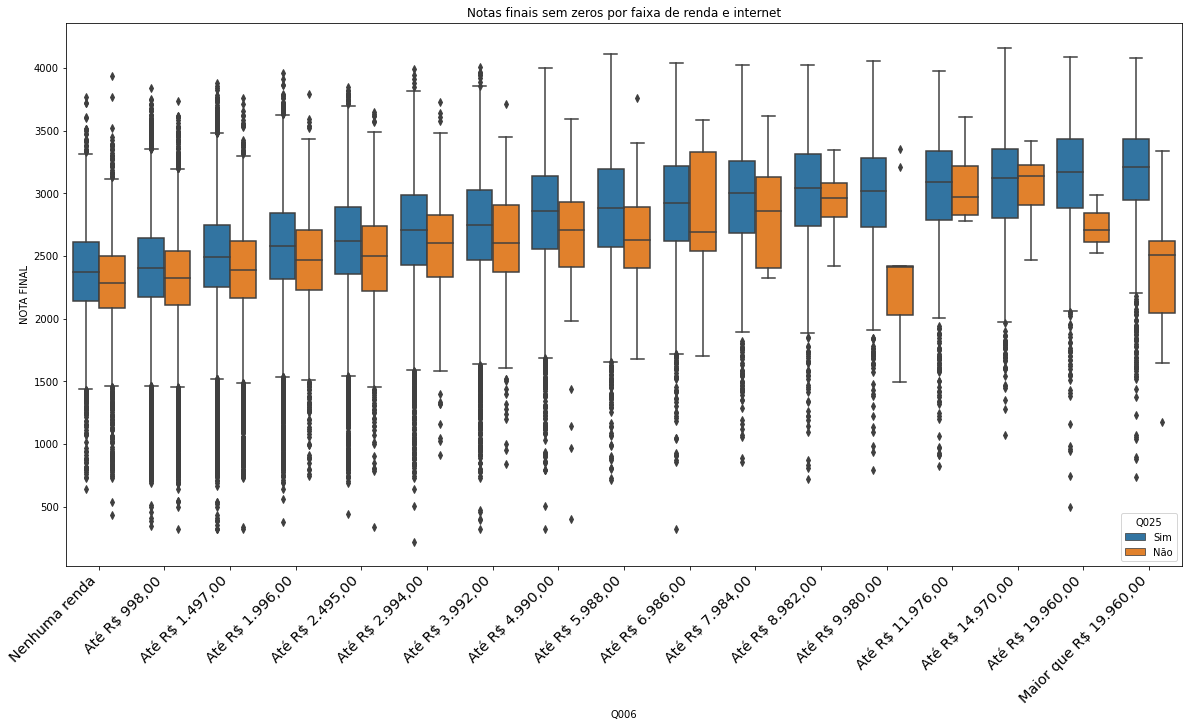

In [270]:
# Distribuição de notas finais sem zeros por faixa de renda e internet
sns.boxplot(data = dados.replace({RENDA: mapeamentoSocioEconomicas[5]}).replace({TREINEIRO: mapeamentoTreineiro}).replace({INTERNET: mapeamentoSocioEconomicas[24]}), x = RENDA, y = NOTA_FINAL, hue = INTERNET, order = ordemRenda).set_title('Notas finais sem zeros por faixa de renda e internet');
rotateLabels()

In [271]:
dados.replace({RENDA: mapeamentoSocioEconomicas[5]}).replace({INTERNET: mapeamentoSocioEconomicas[24]})[(dados[INTERNET] == 'A') & (dados[RENDA].isin(['M', 'N', 'O', 'P', 'Q']))][RENDA].value_counts()

Até R$ 9.980,00           10
Até R$ 11.976,00          10
Até R$ 14.970,00           8
Maior que R$ 19.960,00     7
Até R$ 19.960,00           3
Name: Q006, dtype: int64

#### Conclusão
Podemos observar que há uma diferença nas notas entre quem tem internet e quem não tem internet em todas as rendas. \

Um ponto estranho aqui, é que há 3 faixas de renda alta, que não tem internet, que tem notas bem baixas, fugindo bastante do padrão para as outras faixas. Podemos talvez, desconsiderar dado a pouca quantidade de inscritos nessas condições na amostra para nessas faixas.

## Notas por Graduação dos Pais

In [272]:
mapeamentoEscolaridade = { 'A': 'SEM FUNDAMENTAL', 'B': 'SEM FUNDAMENTAL', 'C': 'SEM FUNDAMENTAL', 'D': 'FUNDAMENTAL', 'E': 'ENSINO MEDIO', 'F': 'GRADUADO', 'G': 'GRADUADO', 'H': 'NAO SEI' }
ordemEscolaridade = ['NAO SEI', 'SEM FUNDAMENTAL', 'FUNDAMENTAL', 'ENSINO MEDIO', 'GRADUADO']

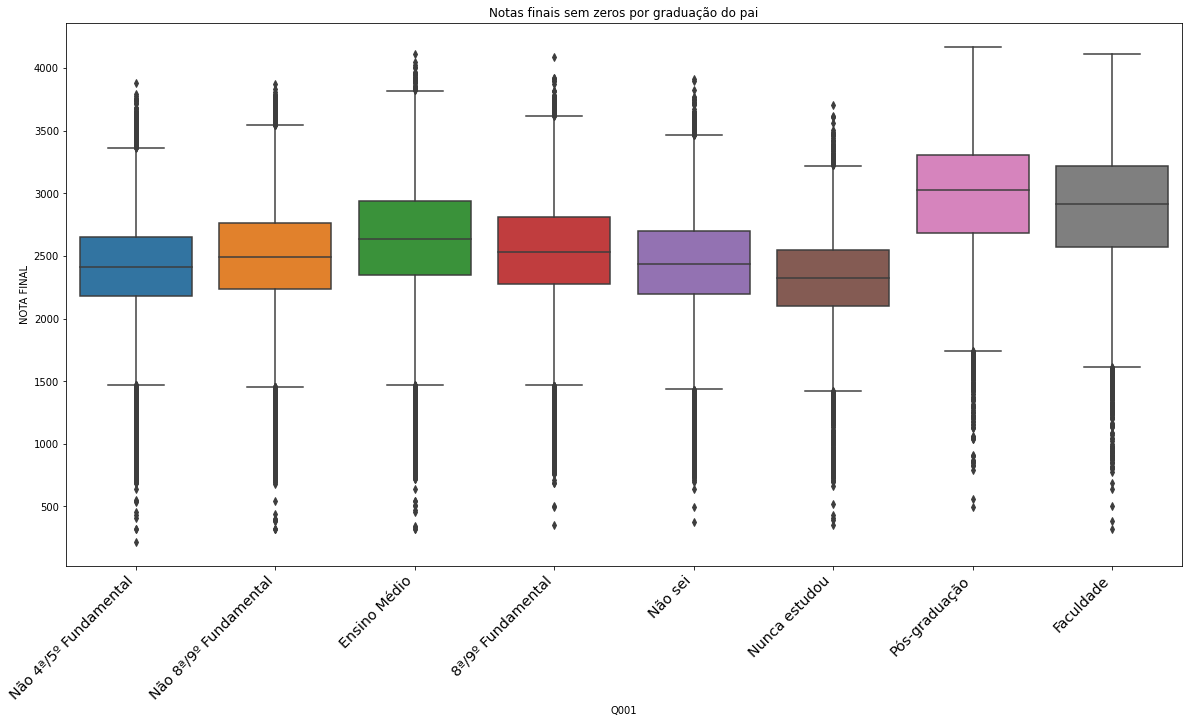

In [273]:
# Distribuição de notas finais sem zeros por graduação do pai
sns.boxplot(data = dados.replace({GRAD_PAI: mapeamentoSocioEconomicas[0]}), x = GRAD_PAI, y = NOTA_FINAL).set_title('Notas finais sem zeros por graduação do pai');
rotateLabels()

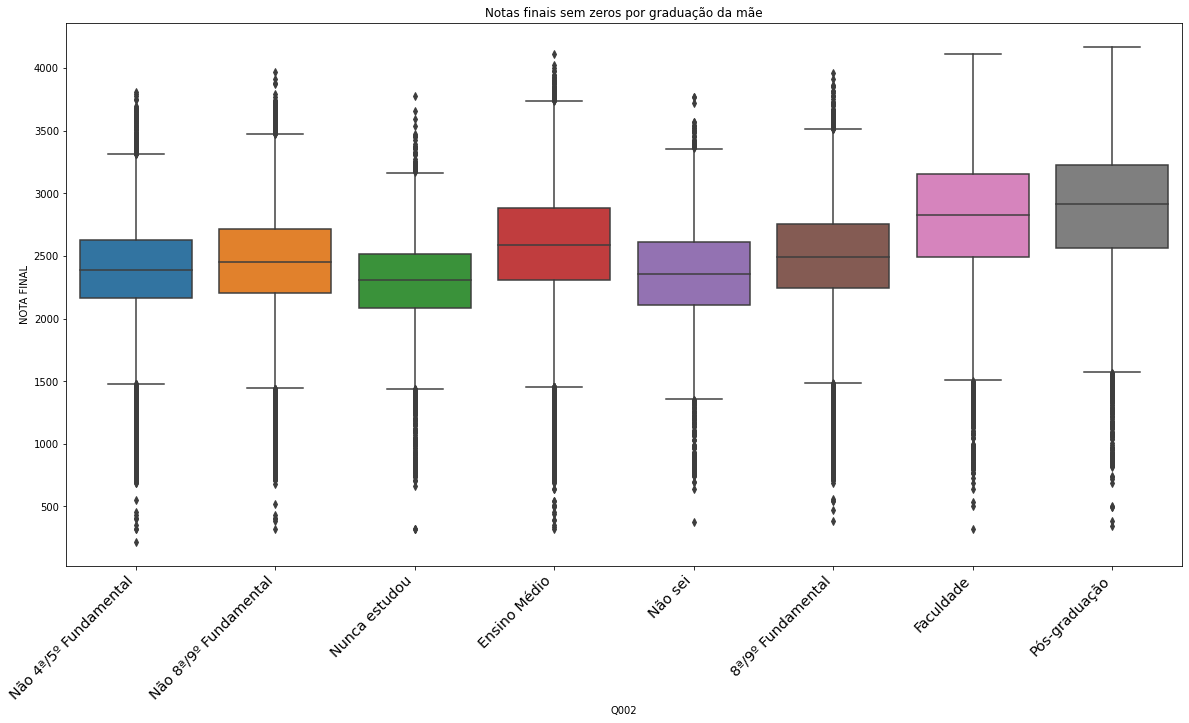

In [274]:
# Distribuição de notas finais sem zeros por graduação da mãe
sns.boxplot(data = dados.replace({GRAD_MAE: mapeamentoSocioEconomicas[1]}), x = GRAD_MAE, y = NOTA_FINAL).set_title('Notas finais sem zeros por graduação da mãe');
rotateLabels()

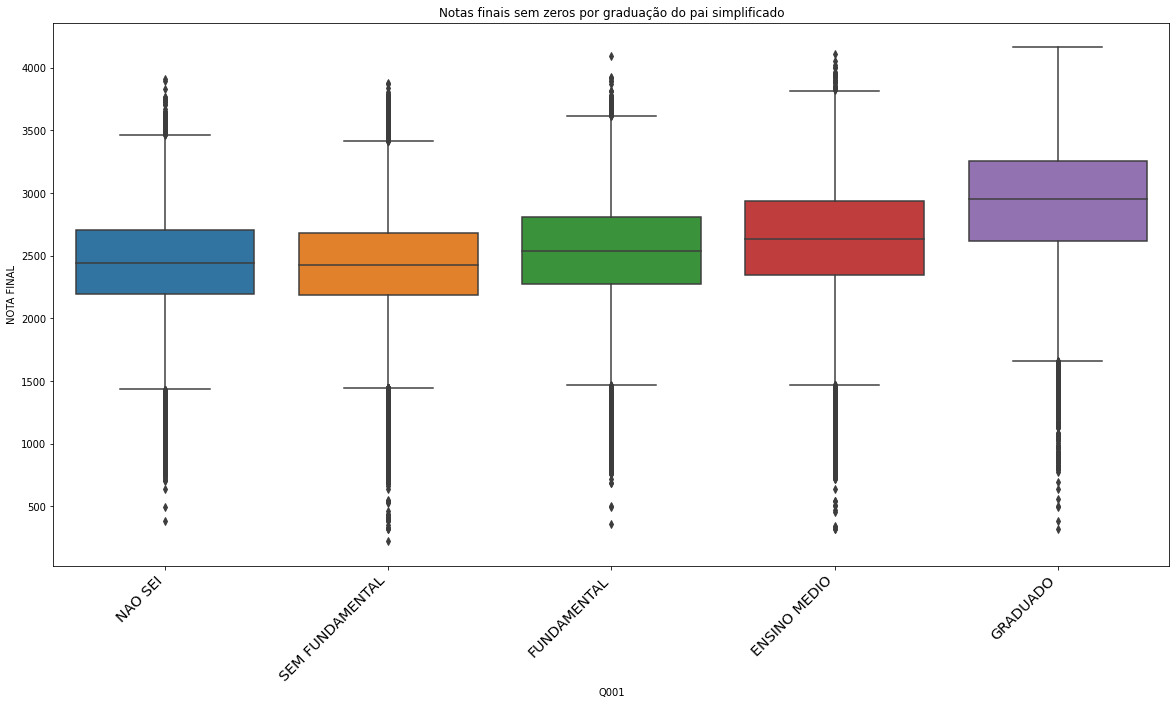

In [275]:
# Distribuição de notas finais sem zeros por graduação do pai simplificado
sns.boxplot(data = dados.replace({GRAD_PAI: mapeamentoEscolaridade}), x = GRAD_PAI, y = NOTA_FINAL, order = ordemEscolaridade).set_title('Notas finais sem zeros por graduação do pai simplificado');
rotateLabels()

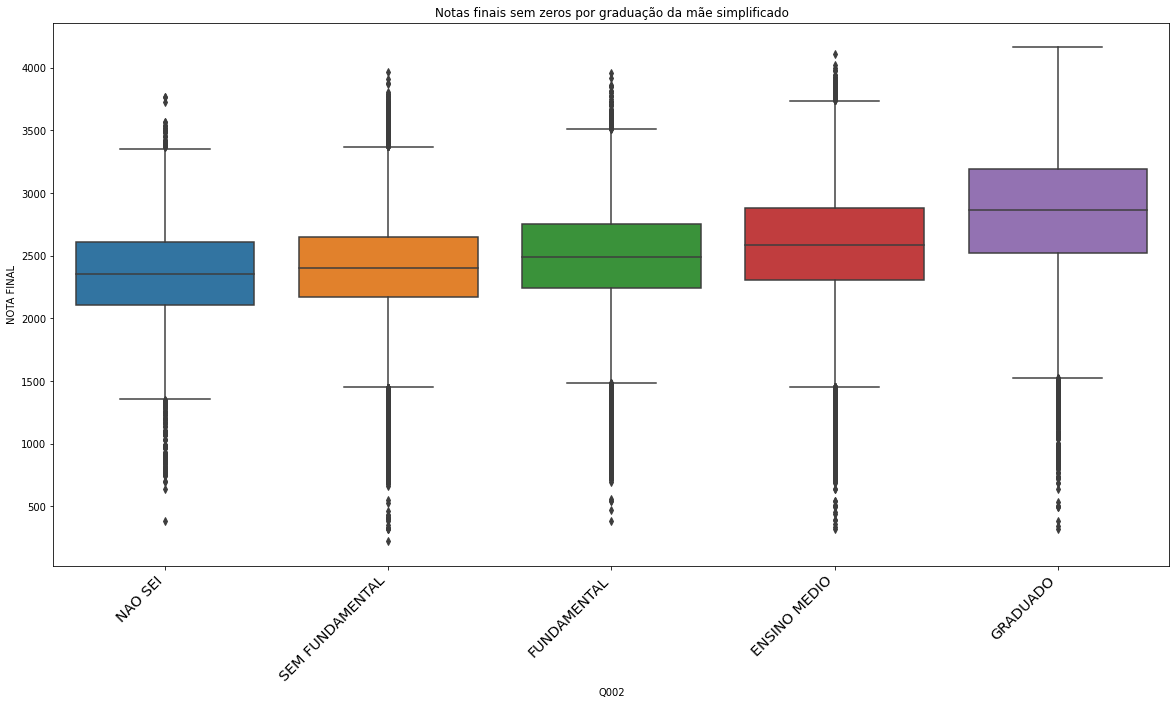

In [276]:
# Distribuição de notas finais sem zeros por graduação da mãe simplificado
sns.boxplot(data = dados.replace({GRAD_MAE: mapeamentoEscolaridade}), x = GRAD_MAE, y = NOTA_FINAL, order = ordemEscolaridade).set_title('Notas finais sem zeros por graduação da mãe simplificado');
rotateLabels()

In [277]:
def calculateEscolaridadePais(row):
  if (row[GRAD_PAI] in ['A', 'B', 'C']) & (row[GRAD_MAE] in ['A', 'B', 'C']):
    return 'SEM FUNDAMENTAL'
  elif (row[GRAD_PAI] in ['A', 'B', 'C']) & (row[GRAD_MAE] == 'D'):
    return 'FUNDAMENTAL'
  elif (row[GRAD_PAI] in ['A', 'B', 'C']) & (row[GRAD_MAE] == 'E'):
    return 'ENSINO MEDIO'
  elif (row[GRAD_PAI] in ['A', 'B', 'C']) & (row[GRAD_MAE] in ['F', 'G']):
    return 'GRADUADO'

  elif (row[GRAD_MAE] in ['A', 'B', 'C']) & (row[GRAD_PAI] == 'D'):
    return 'FUNDAMENTAL'
  elif (row[GRAD_MAE] in ['A', 'B', 'C']) & (row[GRAD_PAI] == 'E'):
    return 'ENSINO MEDIO'
  elif (row[GRAD_MAE] in ['A', 'B', 'C']) & (row[GRAD_PAI] in ['F', 'G']):
    return 'GRADUADO'

  else:
    return 'NAO SEI'

In [278]:
dados[ESCOLARIDADE_PAIS] = dados.apply(lambda row: calculateEscolaridadePais(row), axis=1)

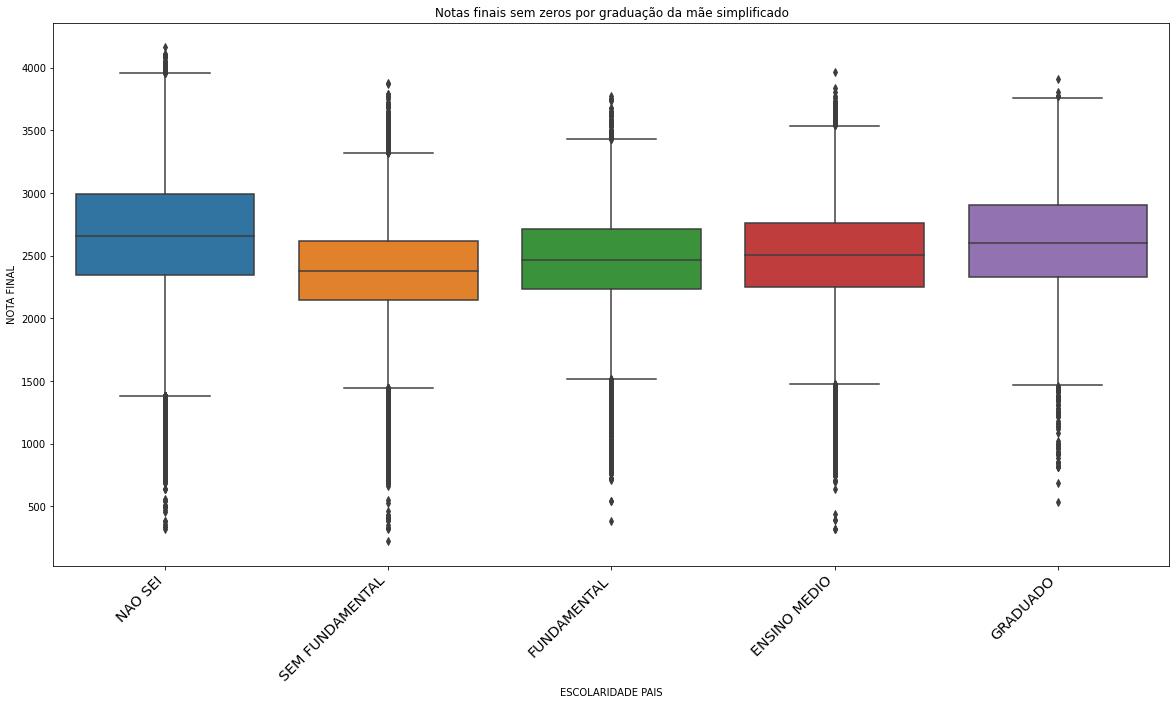

In [279]:
# Distribuição de notas finais sem zeros por graduação da mãe simplificado
sns.boxplot(data = dados, x = ESCOLARIDADE_PAIS, y = NOTA_FINAL, order = ordemEscolaridade).set_title('Notas finais sem zeros por graduação da mãe simplificado');
rotateLabels()

#### Conclusão
Podemos observar que com o aumento no nível de escolaridade, tanto da mãe como do pai, as notas dos inscritos tendem, em geral, a aumentar.

## Notas por Tipo Escola

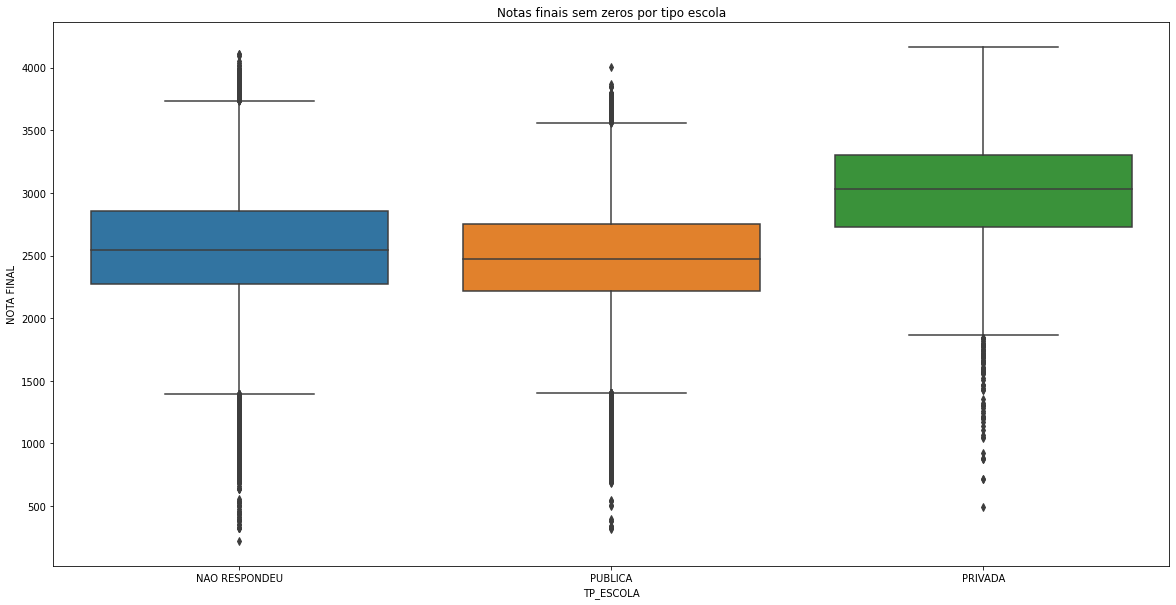

In [280]:
# Distribuição de notas finais sem zeros por tipo escola
sns.boxplot(data = dados.replace({TIPO_ESCOLA: mapeamentoTipoEscola}), x = TIPO_ESCOLA, y = NOTA_FINAL).set_title('Notas finais sem zeros por tipo escola');

#### Conclusão
Podemos observar que o as notas de inscritos que são de escolas privadas são, em geral, bem superiores que as notas de inscritos de escolas públicas.

## Notas por Mudou Estado

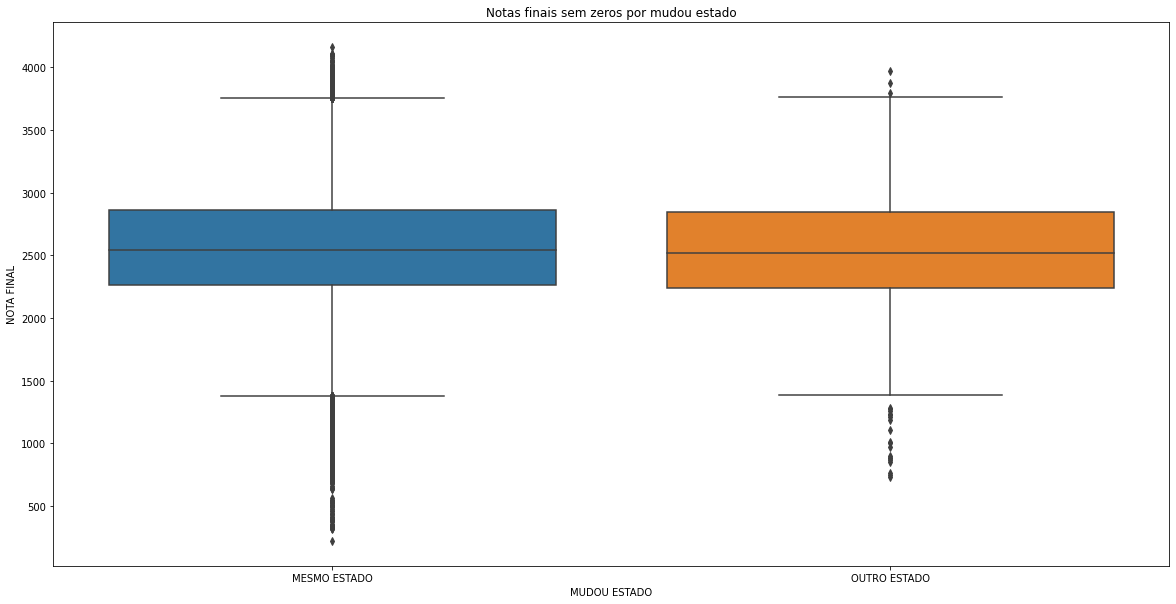

In [281]:
# Distribuição de notas finais sem zeros por mudou estado
sns.boxplot(data = dados, x = MUDOU_ESTADO, y = NOTA_FINAL).set_title('Notas finais sem zeros por mudou estado');

#### Conclusão
Podemos observar que o as notas de inscritos que tiveram que mudar de estado para realizar a prova, não tiveram notas muito diferentes de quem fez a prova no mesmo estado.

## Notas por Mudou Cidade

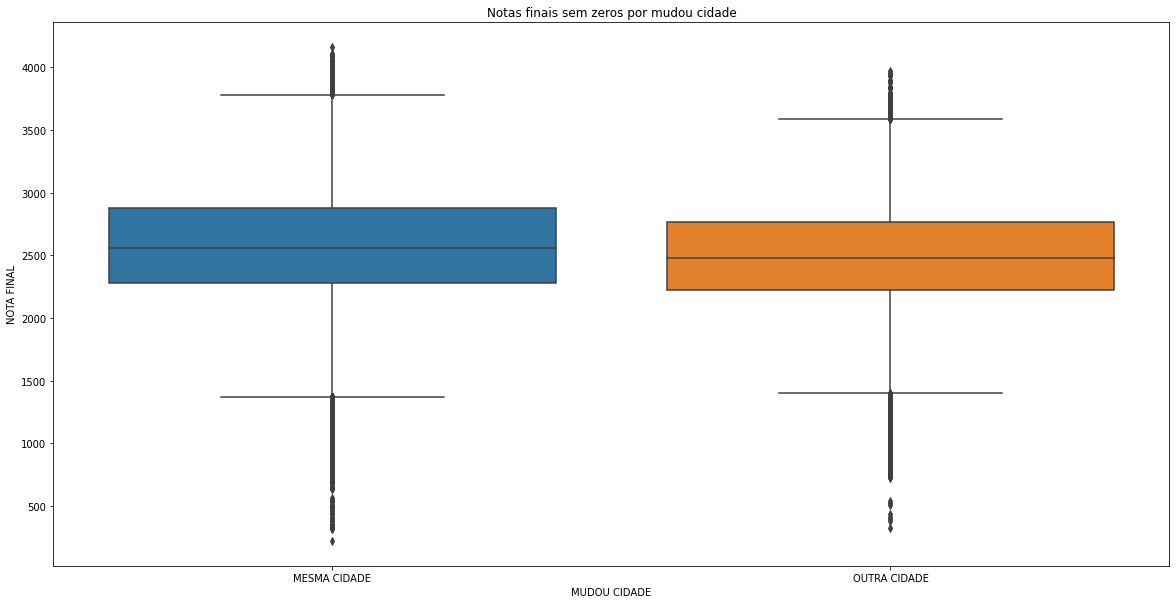

In [282]:
# Distribuição de notas finais sem zeros por mudou cidade
sns.boxplot(data = dados, x = MUDOU_CIDADE, y = NOTA_FINAL).set_title('Notas finais sem zeros por mudou cidade');

#### Conclusão
Podemos observar que o as notas de inscritos que tiveram que mudar de cidade para realizar a prova, foram, em geral, ligeriamente mais baixas que de quem fez a prova na mesma cidade.

## Notas por Nacionalidade

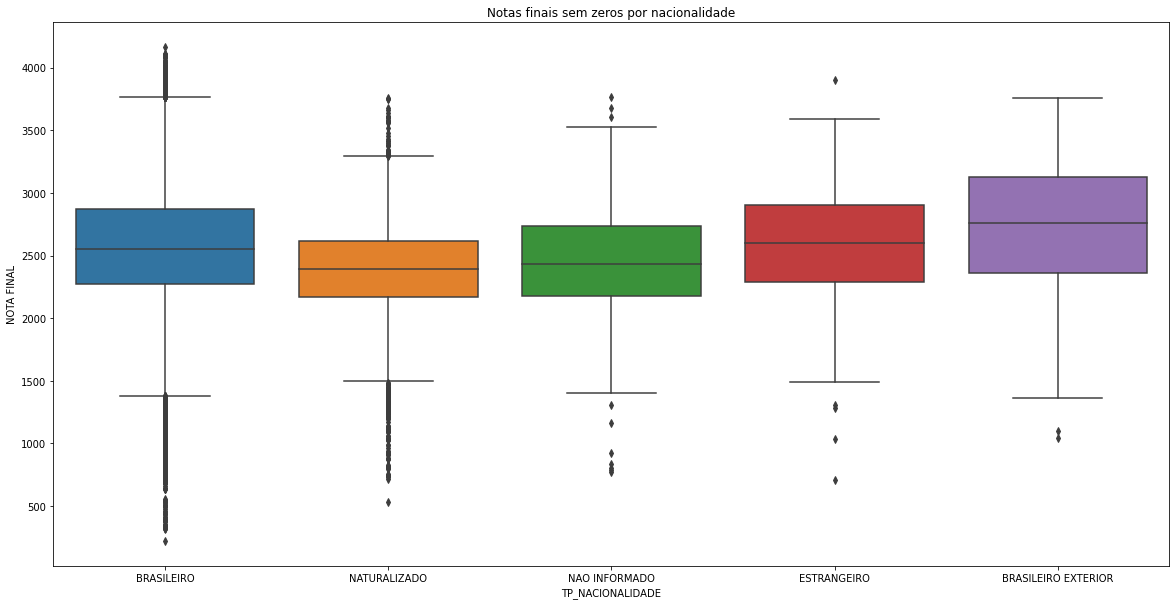

In [283]:
# Distribuição de notas finais sem zeros por nacionalidade
sns.boxplot(data = dados.replace({NACIONALIDADE: mapeamentoNacionalidade}), x = NACIONALIDADE, y = NOTA_FINAL).set_title('Notas finais sem zeros por nacionalidade');

#### Conclusão
Podemos observar que:
* Notas de Naturalizados, em geral, tendem a ser menor se comparado aos outros.
* Notas de Extrangeiros são, em geral, tão boas quanto de brasileiros.
* Notas de Brasileiros no exterior são, em geral, melhores que de brasileiros, apesar da maior dispersão das notas.

## Notas por Conclusão do Ensino Médio

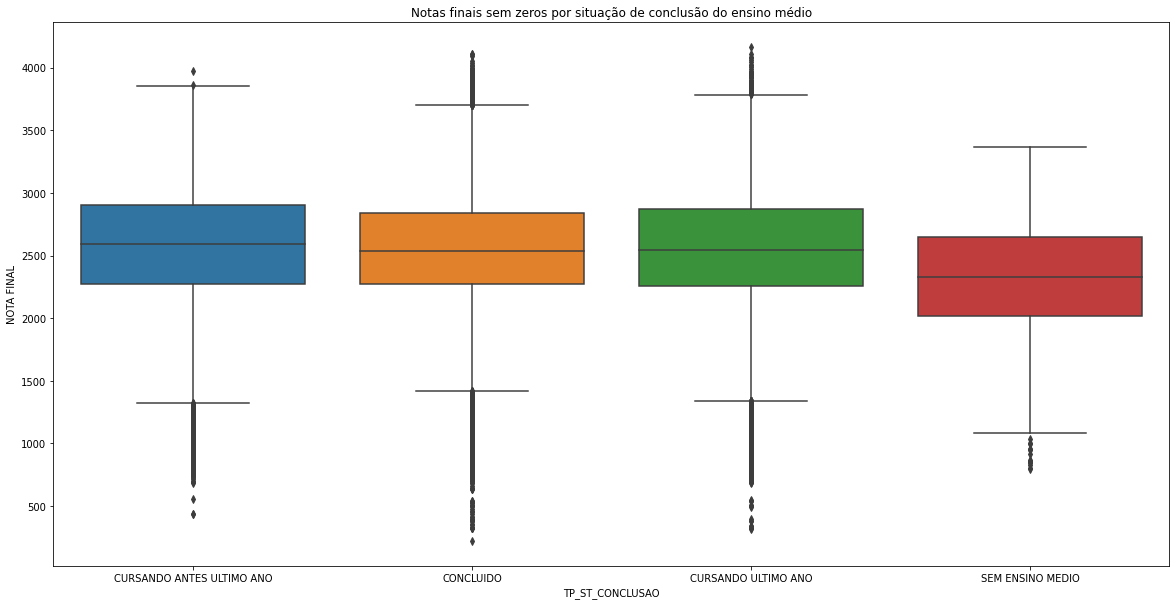

In [284]:
# Distribuição de notas finais sem zeros por situação de conclusão do ensino médio
sns.boxplot(data = dados.replace({SITUACAO_ENSINO_MEDIO: mapeamentoSituacaoEnsinoMedio}), x = SITUACAO_ENSINO_MEDIO, y = NOTA_FINAL).set_title('Notas finais sem zeros por situação de conclusão do ensino médio');

#### Conclusão
Podemos observar que:
* Notas dos inscritos que não concluiram o ensino médio, em geral, são mais baixas.
* Notas entre inscritos que já concluiram e os que estão no último ano, são, em geral, bem semelhantes.
* As notas dos inscritos que estão cursando o ensino médio antes do último ano, em geral, foram parecidas com as de quem já concluiu ou quem está cursando, apesar da maior dispersão das notas.

# Conclusões
A cada dia da imersão fui analizando diferentes aspectos do dataset. \
Muitas de minhas premissas foram bem validadas e portanto, não me surpreenderam nem um pouco. \
Algumas fiz ainda um breve pesquisa na internet para ter informações mais precisas para comparar. \
Porém alguns aspectos analisados até me surpreenderam bastante. Inclusive, alguns até me deixaram bem tristes. \

Ao final da análise, consegui perceber que não tinha noção de muita coisa e que agora já tenho em mente o estado/situação dos inscritos, além de entender melhor como as diferenças entre eles afetam nas notas.

## Resumo (ou coisas que achei interessante)
* Existe inscritos de várias idades, inclusive alguns com mais de até 80 anos.
---
* A maioria dos inscritos já concluiram o ensino médio.
* Há uma quantidade interessante de concluintes do ensino médio de antes de 2007 fazendo a prova.
---
* Há pouca representação de qualquer tipo de atendimento especial / específico.
---
* Mais de 20% dos inscritos faltaram as provas.
* A maioria dos inscritos preferiu a prova de 'Espanhol' do que 'Inglês'.
---
* Muitos dos inscritos tem pais que não concluiram o Ensino Fundamental ou pais que nunca estudaram.
* Há inscritos cujas suas residências moram até mais de 10 pessoas.
---
* Existe uma grande concentração de inscritos com renda menor ou igual a um salário mínimo. (Em 2019 era de R\$ 998,00).
* Pouco mais de 50% das famílias dos inscritos recebem menos que R\$ 1.500,00.
* Quase 0.9% das famílias dos inscritos recebem mais que R$ 19.000,00.
---
* Aproximadamente 1% das residências dos inscritos não tem banheiro!
* Aproximadamente 0.84% das residências dos inscritos não tem quarto!
---
* Aproximadamente 44% das residências dos inscritos tem pelo menos um carro.
* Aproximadamente 23% das residências dos inscritos tem pelo menos uma moto.
---
* Aproximadamente 1,7% das residências dos inscritos não tem geladeira.
* Aproximadamente 3,9% das residências dos inscritos tem, não só uma, mas duas geladeiras.
* Há praticamente o dobro de inscritos com duas geladeiras em sua residência que inscritos sem geladeira em sua residência.
---
* Aproximadamente 4,9% das residências dos inscritos não tem televisão em cores.
* Há praticamente ~3,5 vezes mais inscritos com duas televisões em cores do que inscritos sem televisão em cores.
---
* Aproximadamente 2% das residências dos inscritos não tem telefone celular.
* A grande maioria das residências dos inscritos não tem telefone fixo.
---

* Aproximadamente 46% das residências dos inscritos não tem computador.
* Aproximadamente 22% das residências dos inscritos não tem internet (Imagina para essas pessoas estudarem em tempos de pandemia)!
---
* A maior parte dos inscritos que se declararam sem internet, são das rendas mais baixas.
* Poucos com renda 'média' se declararam sem internet e pouquíssimos com renda 'alta' se declararam sem internet.
---
* Existe, consideravelmente, mais inscritos brancos nas escolas privadas do que de outras raças em escolas privadas.
* É praticamente inexistente a quantidade de inscritos indígenas em escolas privadas.
---
* Os inscritos que tem ao menos um computador, em geral, tem internet. O mesmo não se aplica a ter celular.
* A maior parte dos inscritos que não tem computador, são das rendas mais baixas.
---
* Maioria dos inscritos presentes em ambos os dias tem transporte.
* Para os ausentes, há uma quantidade um pouco superior de inscritos sem transporte. Porém, quem tem transporte também falta quase na mesma proporção.
---
* A maior parte das pessoas que não tem transporte são, em geral, as de renda mais baixas.
* Inscritos que tem moto, se concentram nas faixas de renda mais baixas. Faixas de renda mais altas não costumam ter moto.
* Conforme a renda aumenta, mais proporcionalmente os inscritos tem carro. Chegando a mais de 95% dos inscritos nas faixas mais altas terem pelo menos um carro.
---

* Inscritos que mudaram de estado para realizar a prova não tiveram uma grande ausência nas provas. Na realidade a grande maioria estava presente em ambos os dias.
* Por incrível que pareça, mais de 80% dos ausentes em ambas as provas são os inscritos da mesma cidade.
---
* A prova de CN é a que tem a menor média de notas entre todas as provas.
* A prova de CH em geral, tem notas maiores que as de CN.
* A prova de LC tem uma média maior que a prova de CH. É a prova com segunda maior méida (Desconsiderando a redação). Tem a menor variação de notas entre todas as provas.
* A prova de MT é a prova com a maior méida (Desconsiderando a redação). É a prova que tem maior variação de notas (Desconsiderando a redação).
* A Redação é a prova com maior média entre todas as provas. Mas também é a prova com maior variação de notas.
---
* A relação entre as notas indica que quem tira nota alta em uma tende a tirar nota alta em outra.
* Há uma relação entre as notas de LC e CH, que são as matérias de humanas da prova.
* Quem tira notas maiores na redação ou na prova de matemátca, acaba ficando com uma nota maior na nota final. 
---
* As melhores notas se concentram nos estados do Sudeste e Sul.
* Notas mais baixas se concentram nos estados do Norte.
---
* Notas do sexo feminino são em geral mais baixos.
* Porém, em altas rendas, este valor fica bem equiparado.
---
* Notas de 'Brancos' são maiores, apesar da grande dispersão nas notas.
* Notas de 'Indígenas' são menores, mas também são poucos inscritos nessa categoria.
---
* Notas de 'Solteiros' são maiores, apesar da grande dispersão nas notas.
* Notas de 'Viúvos' são menores, mas também são poucos inscritos nessa categoria.
---
* Há claramente uma crescente nas notas de acordo com o aumento da renda familiar!
---

* Há uma diferença nas notas entre treineiros e não treineiros em rendas mais altas.
* As notas de treineiros das rendas mais altas são, em geral, maiores até que as notas de não treineiros de rendas mais baixas.
---
* Há uma diferença nas notas entre os que escolheram inglês e os que escolheram espanhol, tanto nas notas de linguagens como na nota final e independente da renda. E com o aumento da renda a diferença entre as notas, em geral, aumentam.
* Há uma diferença nas notas entre quem tem internet e quem não tem internet em todas as rendas.
---
* Com o aumento no nível de escolaridade, tanto da mãe como do pai, as notas dos inscritos tendem, em geral, a aumentar.
* As notas de inscritos que são de escolas privadas são, em geral, bem superiores que as notas de inscritos de escolas públicas.
* As notas de inscritos que tiveram que mudar de estado para realizar a prova, não tiveram notas muito diferentes de quem fez a prova no mesmo estado.
* As notas de inscritos que tiveram que mudar de cidade para realizar a prova, foram, em geral, ligeriamente mais baixas que de quem fez a prova na mesma cidade.
---
* Notas de Naturalizados, em geral, tendem a ser menor se comparado aos outros.
* Notas de Extrangeiros são, em geral, tão boas quanto de brasileiros.
* Notas de Brasileiros no exterior são, em geral, melhores que de brasileiros, apesar da maior dispersão das notas.
---
* Notas dos inscritos que não concluiram o ensino médio, em geral, são mais baixas.
* Notas entre inscritos que já concluiram e os que estão no último ano, são, em geral, bem semelhantes.
* As notas dos inscritos que estão cursando o ensino médio antes do último ano, em geral, foram parecidas com as de quem já concluiu ou quem está cursando, apesar da maior dispersão das notas. 

# // TODO

## Outras possibiliaddes para investigar

* Verificar só com os dados do estado;
* Comparar cidades do estado;
* Na análise de estado: Adicionar proporção com população do estado.
